## MCA for selected features

In [2]:
## libraries ##

library(FactoMineR)
library("factoextra")
library(janitor)
library(tidyr)
library(dplyr)
library(tidyr)
library(tidyverse)
library(UpSetR)
library(reshape2)
library(cowplot)
library(wesanderson)
# install.packages('gginference')
library(gginference)

In [364]:
getwd()

[1] "/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/Figures_codes/Figure8"

### Load metadata 

In [3]:
## load metadata
mdata <- read.csv("CompleteDatabase.csv")[,-1]

mdata <- mdata  %>% mutate(AETdiff=str_replace(AETdiff,'0','E')) %>% 
mutate(AETdiff=str_replace(AETdiff,'1','F')) %>% 
mutate(AETdiff=str_replace(AETdiff,'2','PF'))  

mdata$AETdiff <- as.factor(mdata$AETdiff)
dim(mdata)
baps <- read.csv("hierBAPS.txt")[,-1]
head(baps)
baps1 <- baps  %>% select(Isolate,level.1) %>% 
 column_to_rownames('Isolate')

[1] 504   6

Isolate level.1 level.2
1 PA10    1       1      
2 PA1012  2       3      
3 PA1013  2       3      
4 PA1014  2       3      
5 PA1015  2       3      
6 PA1019  3       6

In [4]:
(mdata %>% filter(Sequencing=='FollowUp') %>% select(Isolate))$Isolate

[1] "PA1376" "PA1377" "PA1378" "PA1379" "PA1380" "PA1381" "PA1382" "PA1383"
 [9] "PA1384" "PA1385" "PA1386" "PA1387" "PA1388" "PA1389" "PA1390" "PA1391"
[17] "PA1392" "PA1393" "PA1394" "PA1395" "PA1396" "PA1397" "PA1398" "PA1399"
[25] "PA1400" "PA1401" "PA1402" "PA1403" "PA1404" "PA1405" "PA1406" "PA1407"
[33] "PA1408" "PA1409" "PA1410" "PA1411" "PA1412" "PA1413" "PA1414" "PA1415"
[41] "PA1416" "PA1417" "PA1418" "PA1419" "PA1420" "PA1421" "PA1422" "PA1423"
[49] "PA1430" "PA1431" "PA1432" "PA1433" "PA1434" "PA1435" "PA822"

### Population Structure Control 

In [5]:
### Load kmer pres/abs
gkmerpa <- read.csv('PSCfeats_kmerpa.csv', 
                   row.names = 1)
ngkmerpa <- read.csv('nPSCfeats_kmerpa.csv', 
                   row.names = 1)

### Best perf selected features
fi10 <- read.csv('FeatureImportance_10_2.csv')
fi10$X0 <- gsub('^X','',fi10$X0)
head(fi10)
dim(fi10)
fi30 <- read.csv('FeatureImportance_30_2.csv')
fi30$X0 <- gsub('^X','',fi30$X0)
head(fi30)
dim(fi30)

merge(fi30,fi10,by = 'X0')

X  X0     Importance
1 11 51678  0.11392210
2 12 152657 0.09801118
3 10 103583 0.09104595
4  2 251983 0.08260844
5 13 208099 0.07625540
6  3 278843 0.07408872

[1] 14  3

X  X0     Importance
1  7 208742 0.06605152
2 23 209512 0.05973770
3 19 208741 0.04409006
4  5 351970 0.04207958
5 12 240188 0.03882531
6 21 374872 0.03732713

[1] 30  3

X0     X.x Importance.x X.y Importance.y
1 208099 29  0.03098763   13  0.0762554

In [6]:
# gkmerpa
f30kpa <- gkmerpa[row.names(gkmerpa) %in% fi30$X0,]
colSums(t(f30kpa))
tf30kpa <- data.frame(t(f30kpa))
head(tf30kpa)
# Ngkmerpa
f10kpa <- ngkmerpa[row.names(ngkmerpa) %in% fi10$X0,]
colSums(t(f10kpa))
tf10kpa <- data.frame(t(f10kpa))


117545 130453 169110 208099 208489 208741 208742 208820 209512 230134 235350 
   110    103    105    105    190    221    186    223    276    105    152 
238539 240188 250881 264037 264661 283169 296750 297371 298289 302880 317121 
   229    176    289    212    163    266    100    125    248    320    225 
317810 323635 351906 351970 352087 374872 386981  54535 
   334    191    253    197    191    287    420    128

X117545 X130453 X169110 X208099 X208489 X208741 X208742 X208820 X209512
PA1013 0       0       0       1       0       0       0       1       0      
PA1014 0       0       0       1       0       0       0       0       0      
PA1015 0       0       0       0       0       1       0       0       0      
PA1019 0       1       0       0       0       1       0       0       0      
PA1020 0       0       0       1       0       0       0       0       0      
PA1021 1       0       0       0       1       0       0       1       1      
       X230134 ⋯ X302880 X317121 X317810 X323635 X351906 X351970 X352087
PA1013 0       ⋯ 1       0       1       0       1       1       1      
PA1014 0       ⋯ 1       0       0       0       1       0       1      
PA1015 0       ⋯ 1       0       1       0       1       1       0      
PA1019 0       ⋯ 0       1       1       0       1       1       0      
PA1020 0       ⋯ 0       1       1       0       1       1       1      
PA1021 0       ⋯ 1       0       1       1       1       1       0      
       X374872 X386981 X54535
PA1013 0       1       0     
PA1014 0       1       0     
PA1015 0       1       0     
PA1019 0       1       0     
PA1020 0       1       0     
PA1021 1       1       0

103583 152657 152665 196449 208099 224504 232366 251983 278843 299545 304999 
    63    133    149    289    105    231    272    363    153    255    350 
340129 453270  51678 
   328    362    135

In [7]:
aet_df <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(Row.names,AET) %>% column_to_rownames('Row.names')
aetdiff_df <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(Row.names,AETdiff) %>% column_to_rownames('Row.names')

In [8]:
baps_df <- merge(tf30kpa, baps1 , by.x = 'row.names',by.y='row.names') %>% 
select(Row.names,level.1) %>% column_to_rownames('Row.names')

In [9]:
merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(Row.names,Sequencing,AET)  %>% 
column_to_rownames('Row.names') %>% group_by(Sequencing) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)

Sequencing AET
1 FollowUp    55
2 Original   124

In [10]:
## Evaluate Relationships between kmers PA and AET outcome ##
#############################################################

In [11]:

## Features selected with PSC: kmer patterns 


fup_orig_kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(Sequencing,AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

fup_orig_kpa$samples <- paste(fup_orig_kpa$Sequencing,fup_orig_kpa$AET)

t_fup_orig_kpa <- t(fup_orig_kpa[,-c(1,2)] %>% select(!samples))
colnames(t_fup_orig_kpa) <- c('FollowUp1','Original0','Original1')
t_fup_orig_kpa<-data.frame(t_fup_orig_kpa)

tfrq_fup_orig_kpa <- t_fup_orig_kpa  %>% mutate(Fup1 = FollowUp1/55) %>%
mutate(Org0 = Original0/316) %>% 
mutate(Org1 = Original1/124)


options(repr.plot.width=9, repr.plot.height=9)


a <- melt(tfrq_fup_orig_kpa %>% rownames_to_column() %>% 
select(rowname,Fup1,Org0,Org1)) %>% 
ggplot()+
aes(x=reorder(rowname,value),y=value,fill=variable)+
geom_bar(stat='identity',position = 'dodge')+
facet_wrap(~rowname,scales = 'free_x')+
ggtitle('Sequencing/Sampling and kmer PA')

#############################################################################

orig_kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

# t(orig_kpa)

t_orig_kpa <- t(orig_kpa[,-1])
colnames(t_orig_kpa) <- c('Erad','Fail')
t_orig_kpa<-data.frame(t_orig_kpa)

tfrq_orig_kpa <- t_orig_kpa  %>% mutate(pErad = Erad/316) %>%
mutate(pFail = Fail/(124+55)) 

options(repr.plot.width=9, repr.plot.height=9)


b <- melt(tfrq_orig_kpa %>% rownames_to_column() %>% 
select(rowname,pErad,pFail)) %>% 
ggplot()+
aes(x=reorder(rowname,value),y=value,fill=variable)+
geom_bar(stat='identity',position = 'dodge')+
facet_wrap(~rowname,scales = 'free_x')+
ggtitle('AET and kmer PA')

Using rowname as id variables

Using rowname as id variables



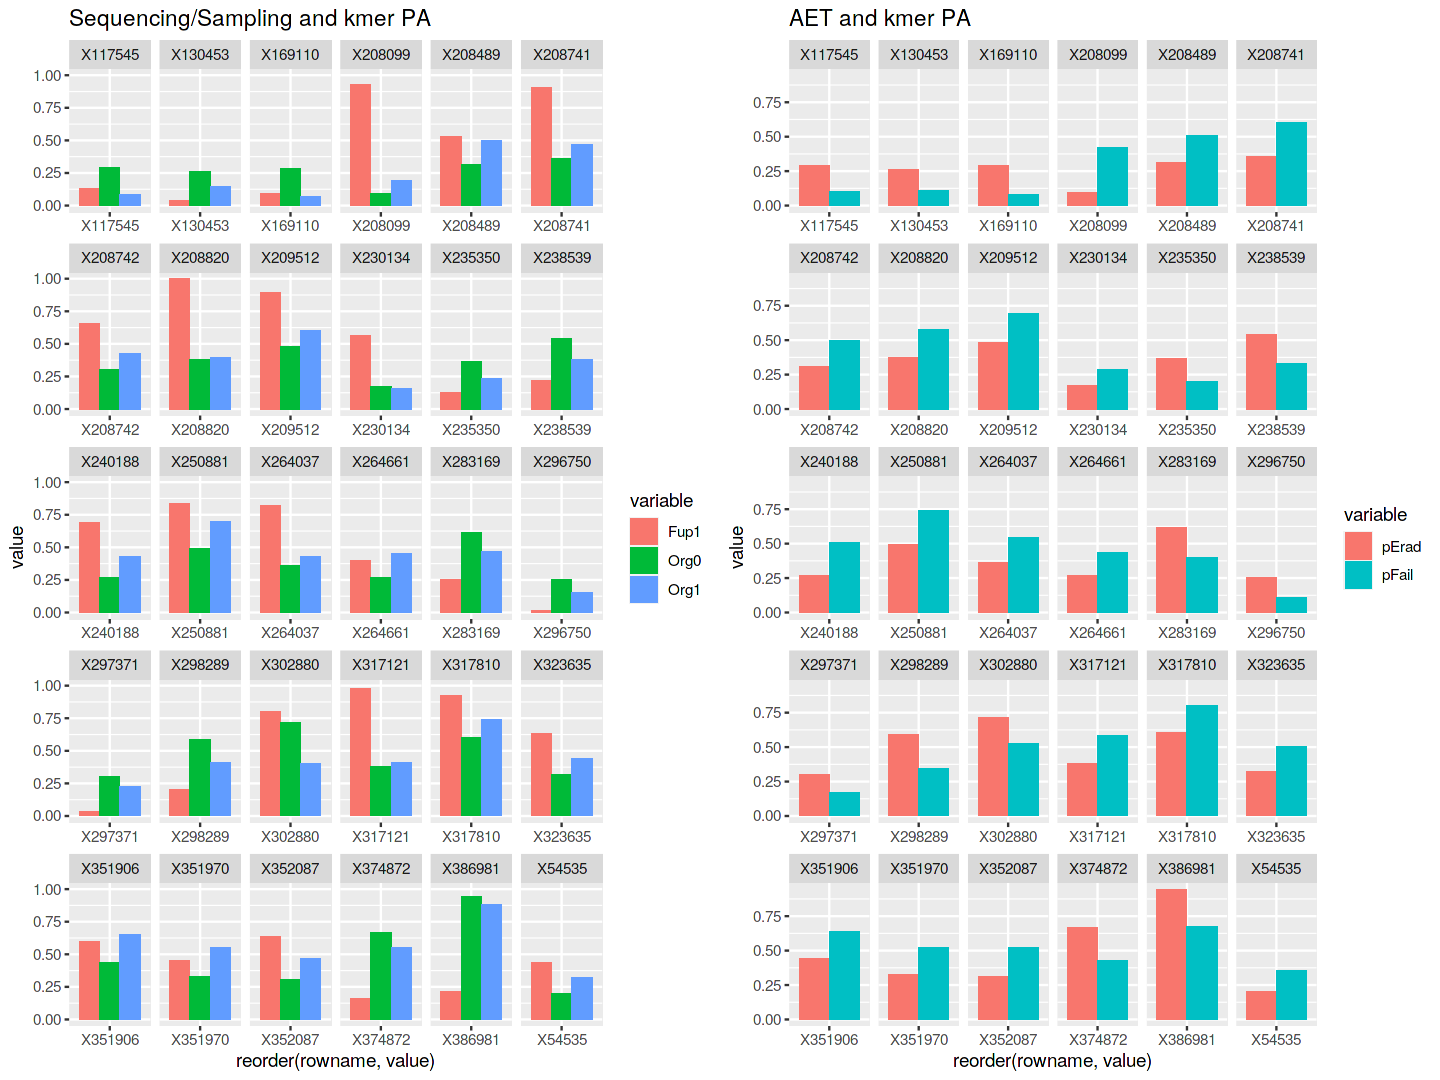

In [12]:
options(repr.plot.width=12, repr.plot.height=9)

plot_grid(a,b,ncol=2)

In [12]:
library(ggmosaic)

In [112]:
aet_tf30kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


daet_tf30kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AET) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')

data.frame(cor(aet_tf30kpa)) %>% select(AET)

AET       
X117545 -0.2212583
X130453 -0.1795696
X169110 -0.2475305
X208099  0.3803913
X208489  0.1917700
X208741  0.2364828
X208742  0.1877726
X208820  0.1963034
X209512  0.2034825
X230134  0.1333401
X235350 -0.1740679
X238539 -0.2024942
X240188  0.2394256
X250881  0.2417240
X264037  0.1802285
X264661  0.1696111
X283169 -0.2059932
X296750 -0.1701549
X297371 -0.1481441
X298289 -0.2346764
X302880 -0.1935344
X317121  0.1984822
X317810  0.1977675
X323635  0.1798013
X351906  0.1880986
X351970  0.1859249
X352087  0.2057448
X374872 -0.2304014
X386981 -0.3680168
X54535   0.1693525
AET      1.0000000

In [113]:

daet_features_count <- data.frame(apply(daet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AETdiff) %>% 
tally()
daet_features <- data.frame(apply(daet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") 
# daet_features

aet_features_count <- data.frame(apply(aet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AET) %>% 
tally()
aet_features <- data.frame(apply(aet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") 
aet_features <- aet_features %>% mutate(AET=case_when(
                        AET == '0'~'E',
                        AET == '1'~'F' ))

AET Features count
1     1   X117545  0    
2     1   X130453  0    
3     1   X169110  0    
4     1   X208099  0    
5     1   X208489  0    
6     1   X208741  1    
7     1   X208742  0    
8     1   X208820  1    
9     1   X209512  0    
10    1   X230134  1    
11    1   X235350  0    
12    1   X238539  0    
13    1   X240188  0    
14    1   X250881  1    
15    1   X264037  1    
16    1   X264661  1    
17    1   X283169  1    
18    1   X296750  1    
19    1   X297371  1    
20    1   X298289  0    
21    1   X302880  0    
22    1   X317121  0    
23    1   X317810  1    
24    1   X323635  1    
25    1   X351906  1    
26    1   X351970  0    
27    1   X352087  1    
28    1   X374872  1    
29    1   X386981  1    
30    1   X54535   0    
⋮     ⋮   ⋮        ⋮    
14791 0   X117545  0    
14792 0   X130453  0    
14793 0   X169110  0    
14794 0   X208099  0    
14795 0   X208489  0    
14796 0   X208741  0    
14797 0   X208742  0    
14798 0   X208820  0    
14799 0   X209512  0    
14800 0   X230134  0    
14801 0   X235350  0    
14802 0   X238539  0    
14803 0   X240188  0    
14804 0   X250881  0    
14805 0   X264037  0    
14806 0   X264661  1    
14807 0   X283169  1    
14808 0   X296750  1    
14809 0   X297371  1    
14810 0   X298289  1    
14811 0   X302880  1    
14812 0   X317121  1    
14813 0   X317810  1    
14814 0   X323635  1    
14815 0   X351906  1    
14816 0   X351970  1    
14817 0   X352087  1    
14818 0   X374872  1    
14819 0   X386981  1    
14820 0   X54535   0

In [51]:
fi30x <- fi30
fi30x$X0 <- gsub('^','X',fi30x$X0)

aet_features_imp <- merge(aet_features, fi30x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)
daet_features_imp <- merge(daet_features, fi30x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)

In [53]:
options(repr.plot.width=18, repr.plot.height=5)

aet_pa_f30 <- ggplot(data = aet_features_imp) +
  geom_mosaic(aes(x=product(count,AET), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=10)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(strip.background = element_rect(colour="black",
                                        fill='white'))
# ggsave('AETmosaic.png', device = 'png',dpi = 400, width = 10,height = 4)

In [54]:
options(repr.plot.width=18, repr.plot.height=5)

daet_pa_f30 <- ggplot(data = daet_features_imp) +
  geom_mosaic(aes(x=product(count,AETdiff), fill = count))+
ylab('Unitig Pattern')+xlab('Isolate Sampling and Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=10)+
scale_fill_manual(values = c('#D8C399','#344362'),labels=c('Absent','Present'),name='Unitig Pattern')+
theme(strip.background = element_rect(colour="black",
                                        fill='white'))
# ggsave('AETdiff_mosaic.png', device = 'png',dpi = 400, width = 10,height = 4)

In [306]:
colnames(aet_tf30kpa)

[1] "X117545" "X130453" "X169110" "X208099" "X208489" "X208741" "X208742"
 [8] "X208820" "X209512" "X230134" "X235350" "X238539" "X240188" "X250881"
[15] "X264037" "X264661" "X283169" "X296750" "X297371" "X298289" "X302880"
[22] "X317121" "X317810" "X323635" "X351906" "X351970" "X352087" "X374872"
[29] "X386981" "X54535"  "AET"

In [313]:
mdata %>% filter(Sequencing=='FollowUp') %>% 
select(Patient) %>% 
distinct()

Patient
1 SK033  
2 SK041  
3 SK069  
4 SK039  
5 SK043  
6 SK046  
7 SK042  
8 SK055  
9 SK057

In [328]:
fup_patients <- c('SK033','SK041','SK069','SK039','SK043','SK046','SK042','SK055','SK057')

a <- mdata %>% filter(Patient %in% fup_patients) %>% 
mutate(Patient2=Patient)

b <- mdata %>% filter(!Patient %in% fup_patients) %>% 
mutate(Patient2=AETdiff)

mdata_pat2 <-  rbind(a,b)

pat2_tf30kpa <- merge(tf30kpa, mdata_pat2 , by.x = 'row.names',by.y='Isolate') %>% 
select(!AET) %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


options(repr.plot.width=25, repr.plot.height=15)

pat2_features <- data.frame(apply(pat2_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!Patient2, names_to = "Features", values_to = "count") 

ggplot(data = pat2_features) +
  geom_mosaic(aes(x=product(count,Patient2), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication treatment Outcome')+
facet_wrap(~Features,ncol=5)+
scale_fill_manual(values = c('#9DC7ED','#C54C3F'))+
theme(axis.text.x = element_text(angle=65,hjust = 1))
ggsave('fup_patient_mosaic.png', device = 'png',dpi = 400, width = 13,height = 10)

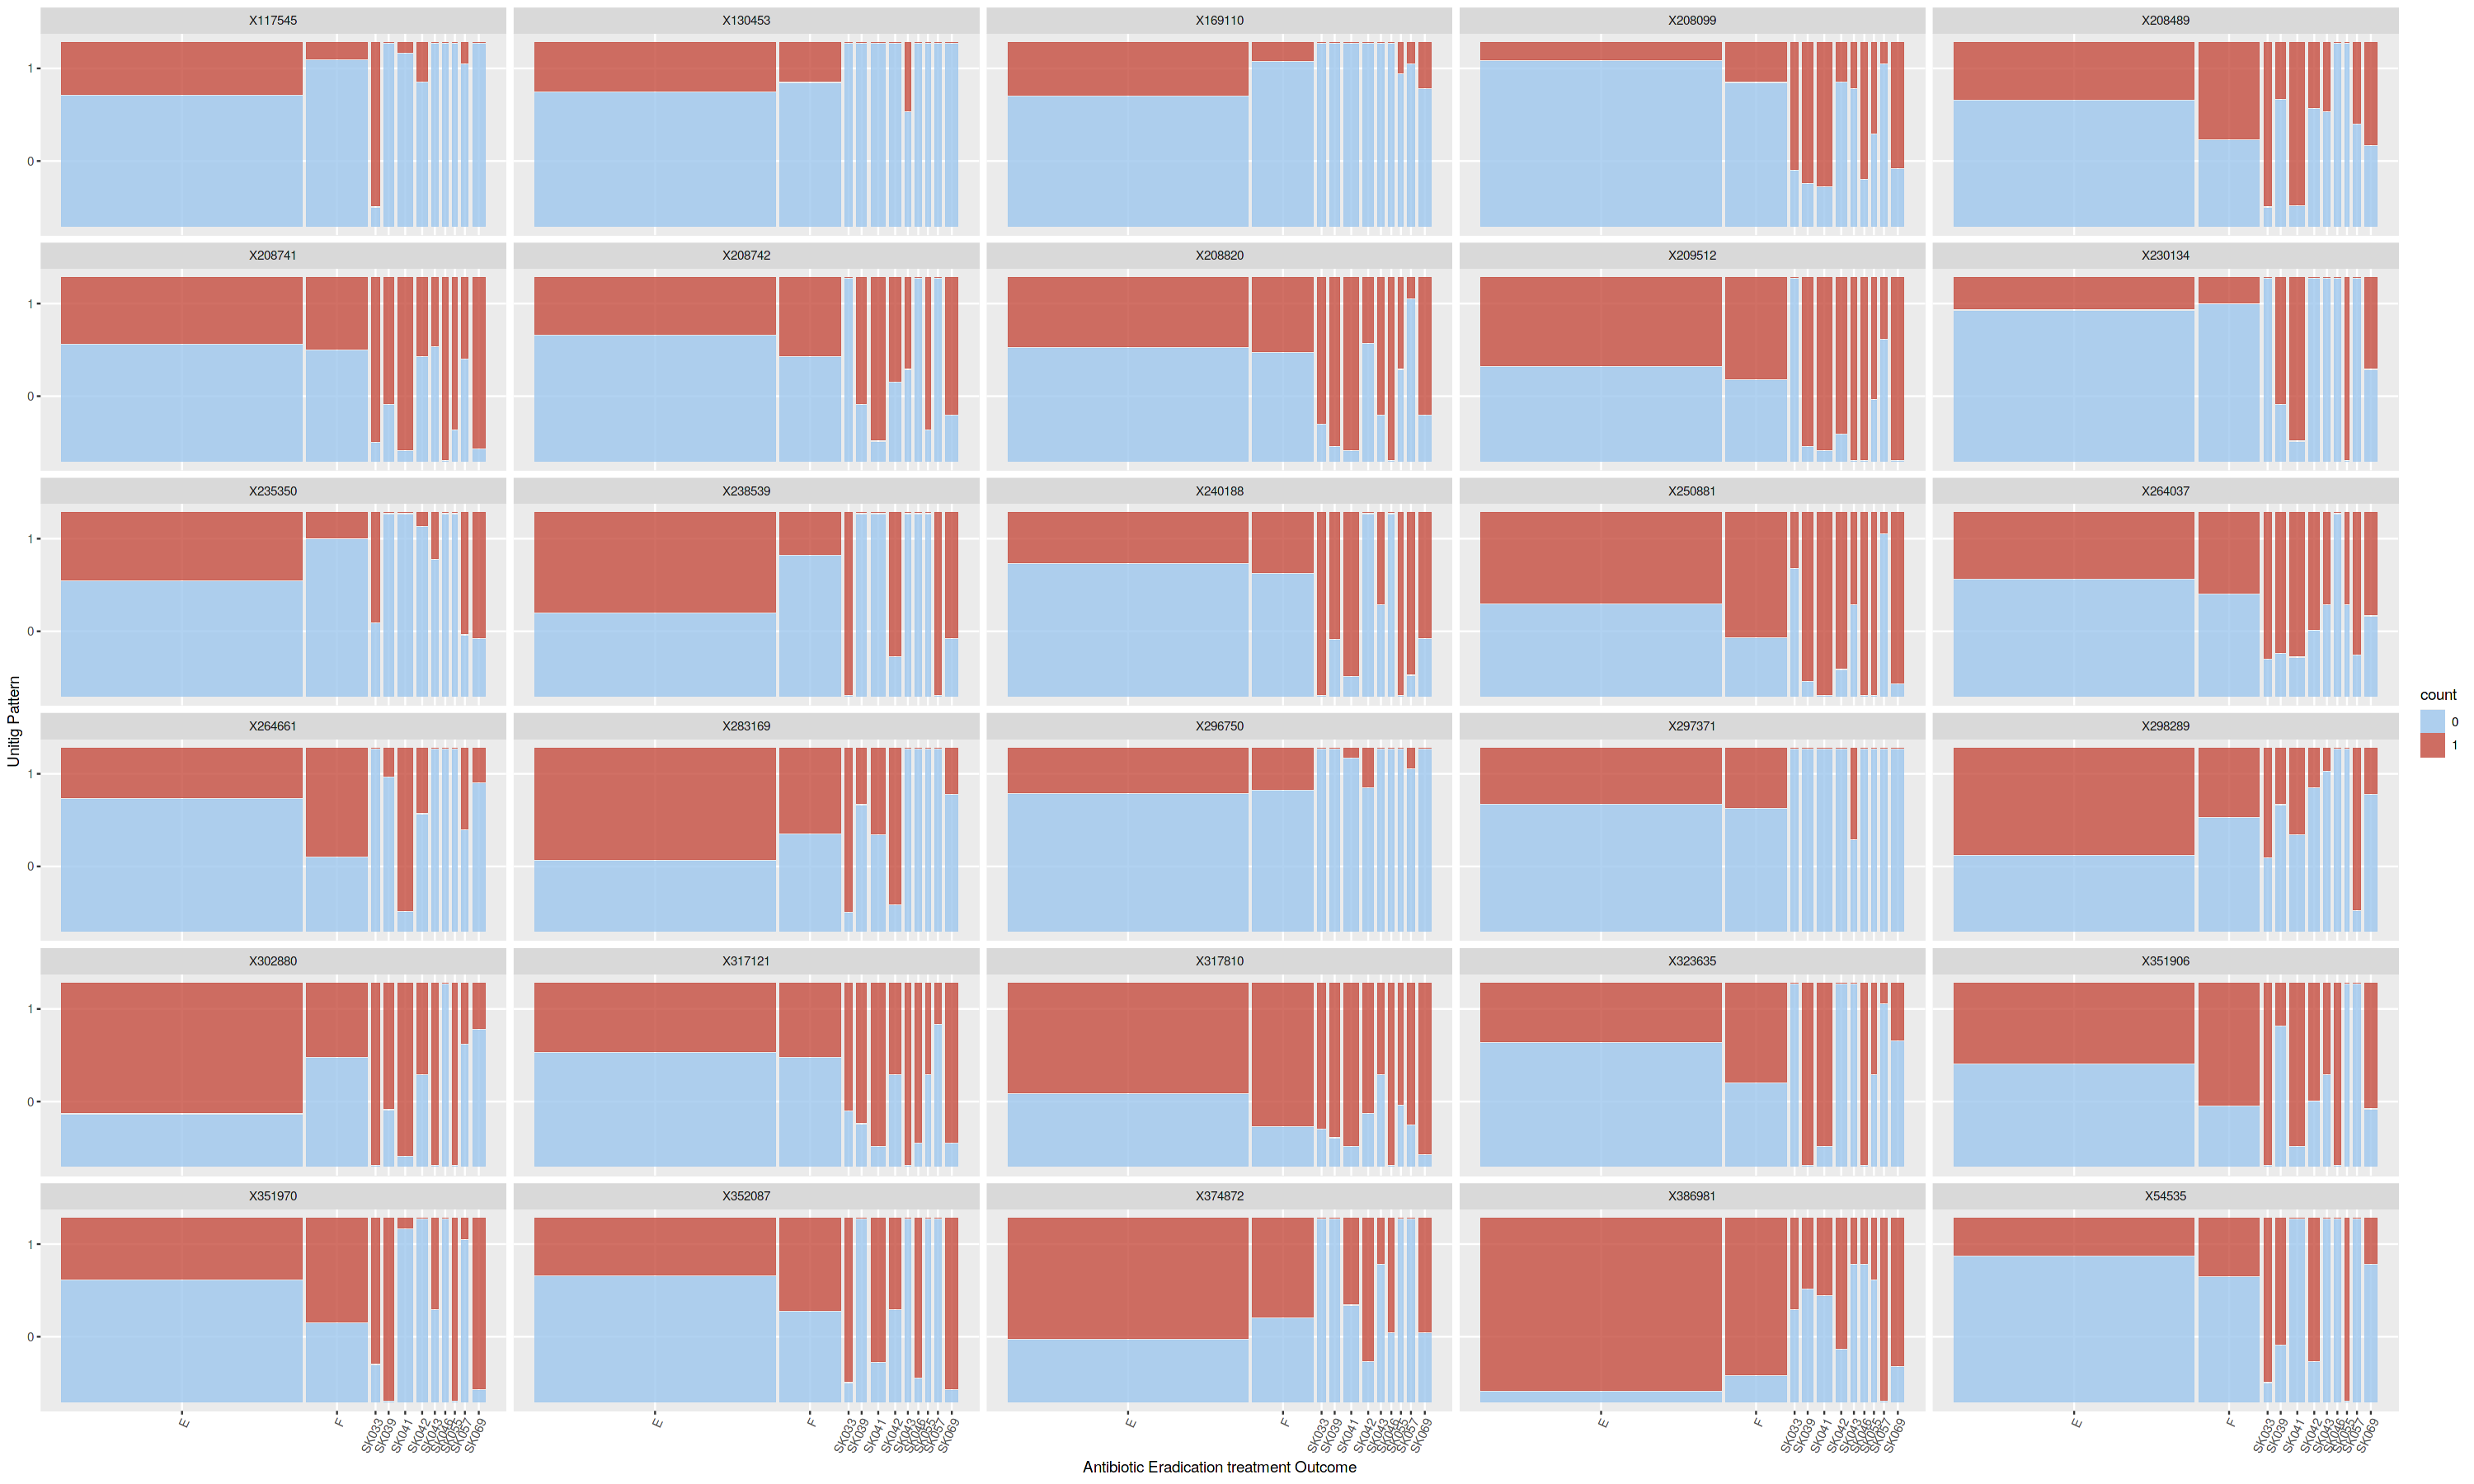

In [62]:

## Features selected withOUT PSC: kmer patterns 


fup_orig_kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(Sequencing,AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

fup_orig_kpa$samples <- paste(fup_orig_kpa$Sequencing,fup_orig_kpa$AET)

t_fup_orig_kpa <- t(fup_orig_kpa[,-c(1,2)] %>% select(!samples))
colnames(t_fup_orig_kpa) <- c('FollowUp1','Original0','Original1')
t_fup_orig_kpa<-data.frame(t_fup_orig_kpa)

tfrq_fup_orig_kpa <- t_fup_orig_kpa  %>% mutate(Fup1 = FollowUp1/55) %>%
mutate(Org0 = Original0/316) %>% 
mutate(Org1 = Original1/124)


options(repr.plot.width=9, repr.plot.height=9)


c <- melt(tfrq_fup_orig_kpa %>% rownames_to_column() %>% 
select(rowname,Fup1,Org0,Org1)) %>% 
ggplot()+
aes(x=reorder(rowname,value),y=value,fill=variable)+
geom_bar(stat='identity',position = 'dodge')+
facet_wrap(~rowname,scales = 'free_x')+
ggtitle('NoPSC Sequencing/Sampling and kmer PA')



orig_kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

# t(orig_kpa)

t_orig_kpa <- t(orig_kpa[,-1])
colnames(t_orig_kpa) <- c('Erad','Fail')
t_orig_kpa<-data.frame(t_orig_kpa)

tfrq_orig_kpa <- t_orig_kpa  %>% mutate(pErad = Erad/316) %>%
mutate(pFail = Fail/(124+55)) 

options(repr.plot.width=9, repr.plot.height=9)


d <- melt(tfrq_orig_kpa %>% rownames_to_column() %>% 
select(rowname,pErad,pFail)) %>% 
ggplot()+
aes(x=reorder(rowname,value),y=value,fill=variable)+
geom_bar(stat='identity',position = 'dodge')+
facet_wrap(~rowname,scales = 'free_x')+
ggtitle(' No PSC AET and kmer PA')

Using rowname as id variables

Using rowname as id variables



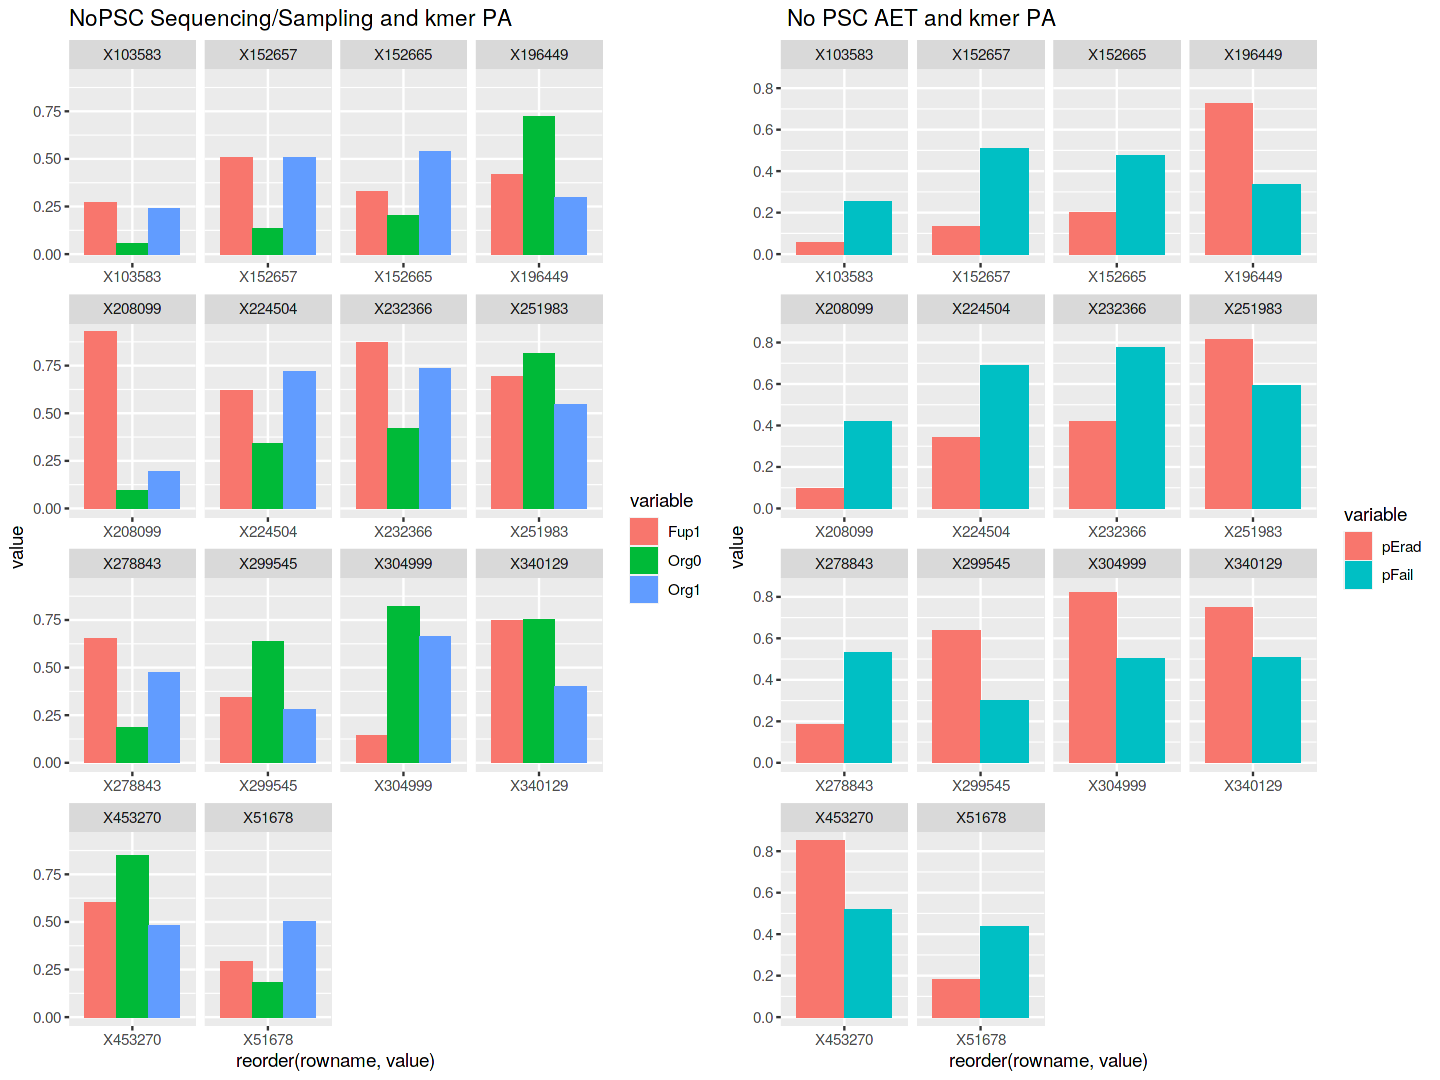

In [35]:
options(repr.plot.width=12, repr.plot.height=9)

plot_grid(c,d,ncol=2)


In [85]:
aet_tf10kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


daet_tf10kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AET) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')



In [72]:
daet_features10_count <- data.frame(apply(daet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AETdiff) %>% 
tally()
daet_features10 <- data.frame(apply(daet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") 
# daet_features

aet_features10_count <- data.frame(apply(aet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AET) %>% 
tally()
aet_features10 <- data.frame(apply(aet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") 
aet_features10 <- aet_features10 %>% mutate(AET=case_when(
                        AET == '0'~'E',
                        AET == '1'~'F' ))


In [73]:
fi10x <- fi10
fi10x$X0 <- gsub('^','X',fi10x$X0)

aet_features10_imp <- merge(aet_features10, fi10x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)
daet_features10_imp <- merge(daet_features10, fi10x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)

In [74]:
options(repr.plot.width=18, repr.plot.height=5)

aet_pa_f10 <- ggplot(data = aet_features10_imp) +
  geom_mosaic(aes(x=product(count,AET), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(strip.background = element_rect(colour="black",
                                        fill='white'))
# ggsave('AETmosaic.png', device = 'png',dpi = 400, width = 10,height = 4)

In [82]:
options(repr.plot.width=18, repr.plot.height=5)

daet_pa_f10 <- ggplot(data = daet_features10_imp) +
  geom_mosaic(aes(x=product(count,AETdiff), fill = count))+
ylab('Unitig Pattern')+xlab('Isolate Sampling and Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'),labels=c('Absent','Present'),name='Unitig Pattern')+
theme(strip.background = element_rect(colour="black",
                                        fill='white'))

pa_leg <- get_legend(daet_pa_f10+theme(legend.position = 'bottom',
                            legend.direction = 'horizontal'))

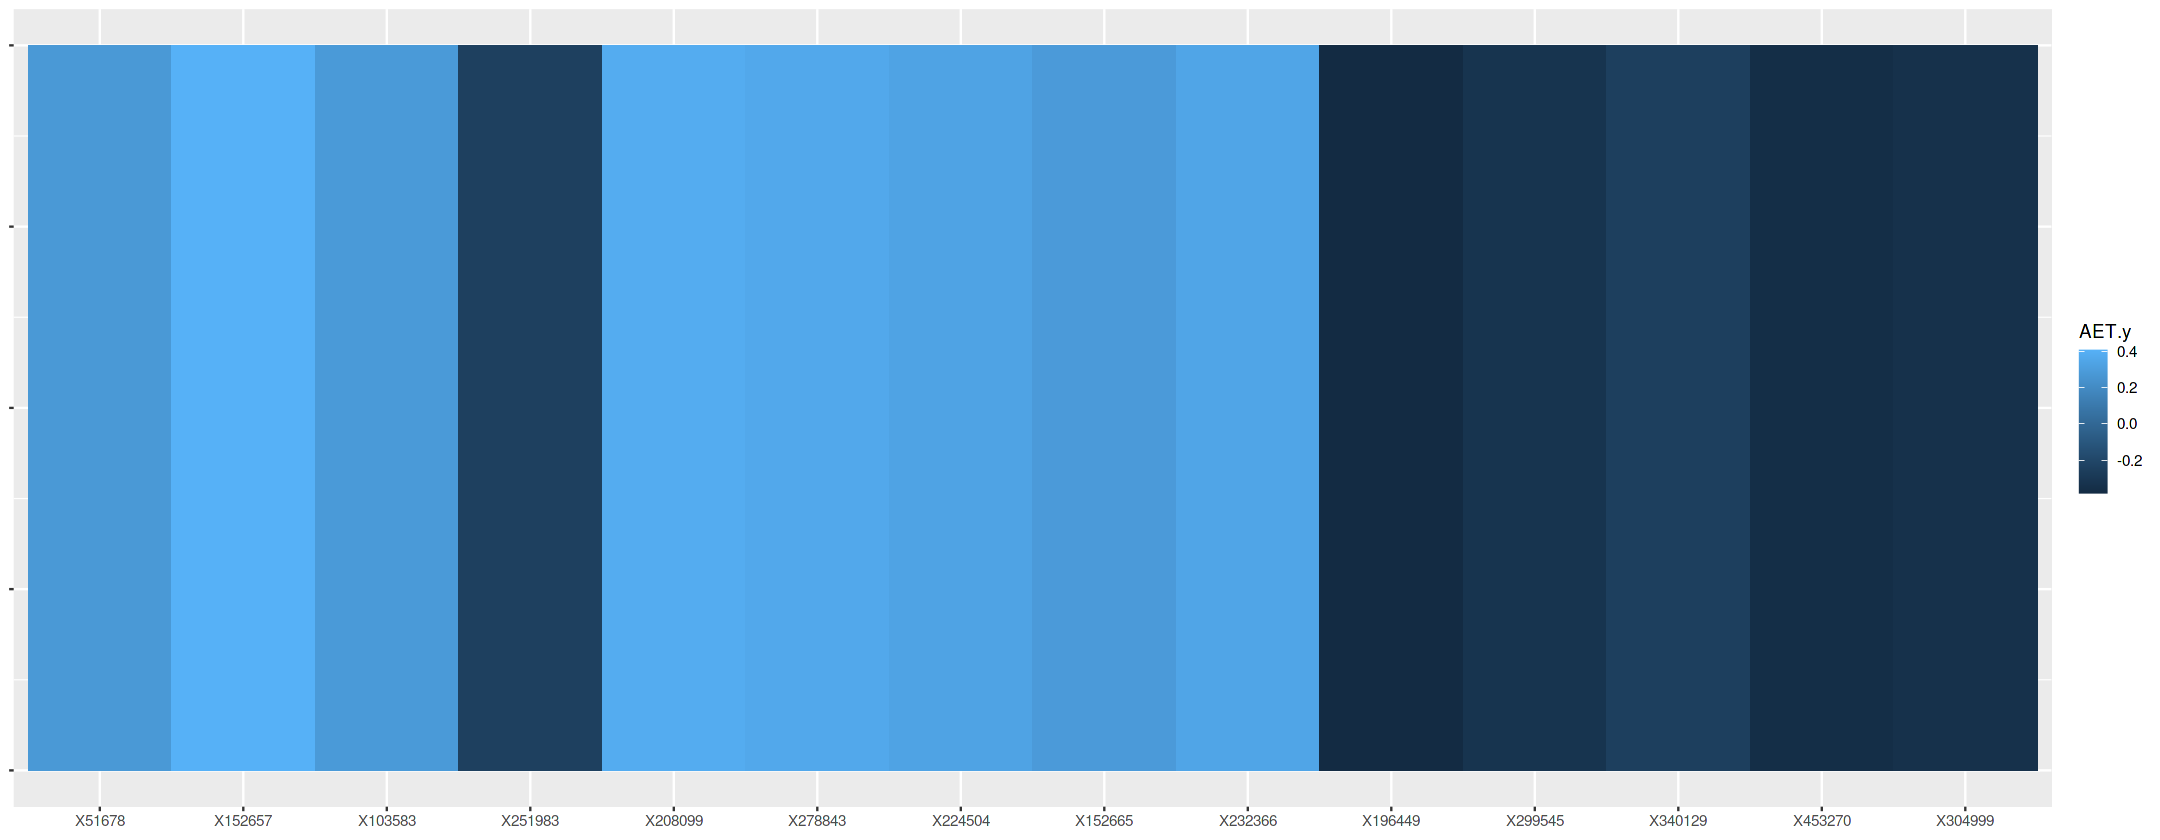

In [100]:
f10kpa_corr <- data.frame(cor(aet_tf10kpa)) %>% select(AET) 


merge(aet_features10_imp,f10kpa_corr, by.x = 'Features',by.y = 'row.names', all.y = TRUE)[-1,] %>% 
select(Features,AET.y,Importance) %>% 
distinct() %>% 
arrange(desc(Importance)) %>% 
ggplot()+
aes(x=fct_reorder(Features,Importance,.desc=TRUE),y=1,fill=AET.y)+
geom_tile()+
theme(axis.title.y = element_blank(),
      axis.title.x = element_blank(),
      axis.text.y = element_blank())

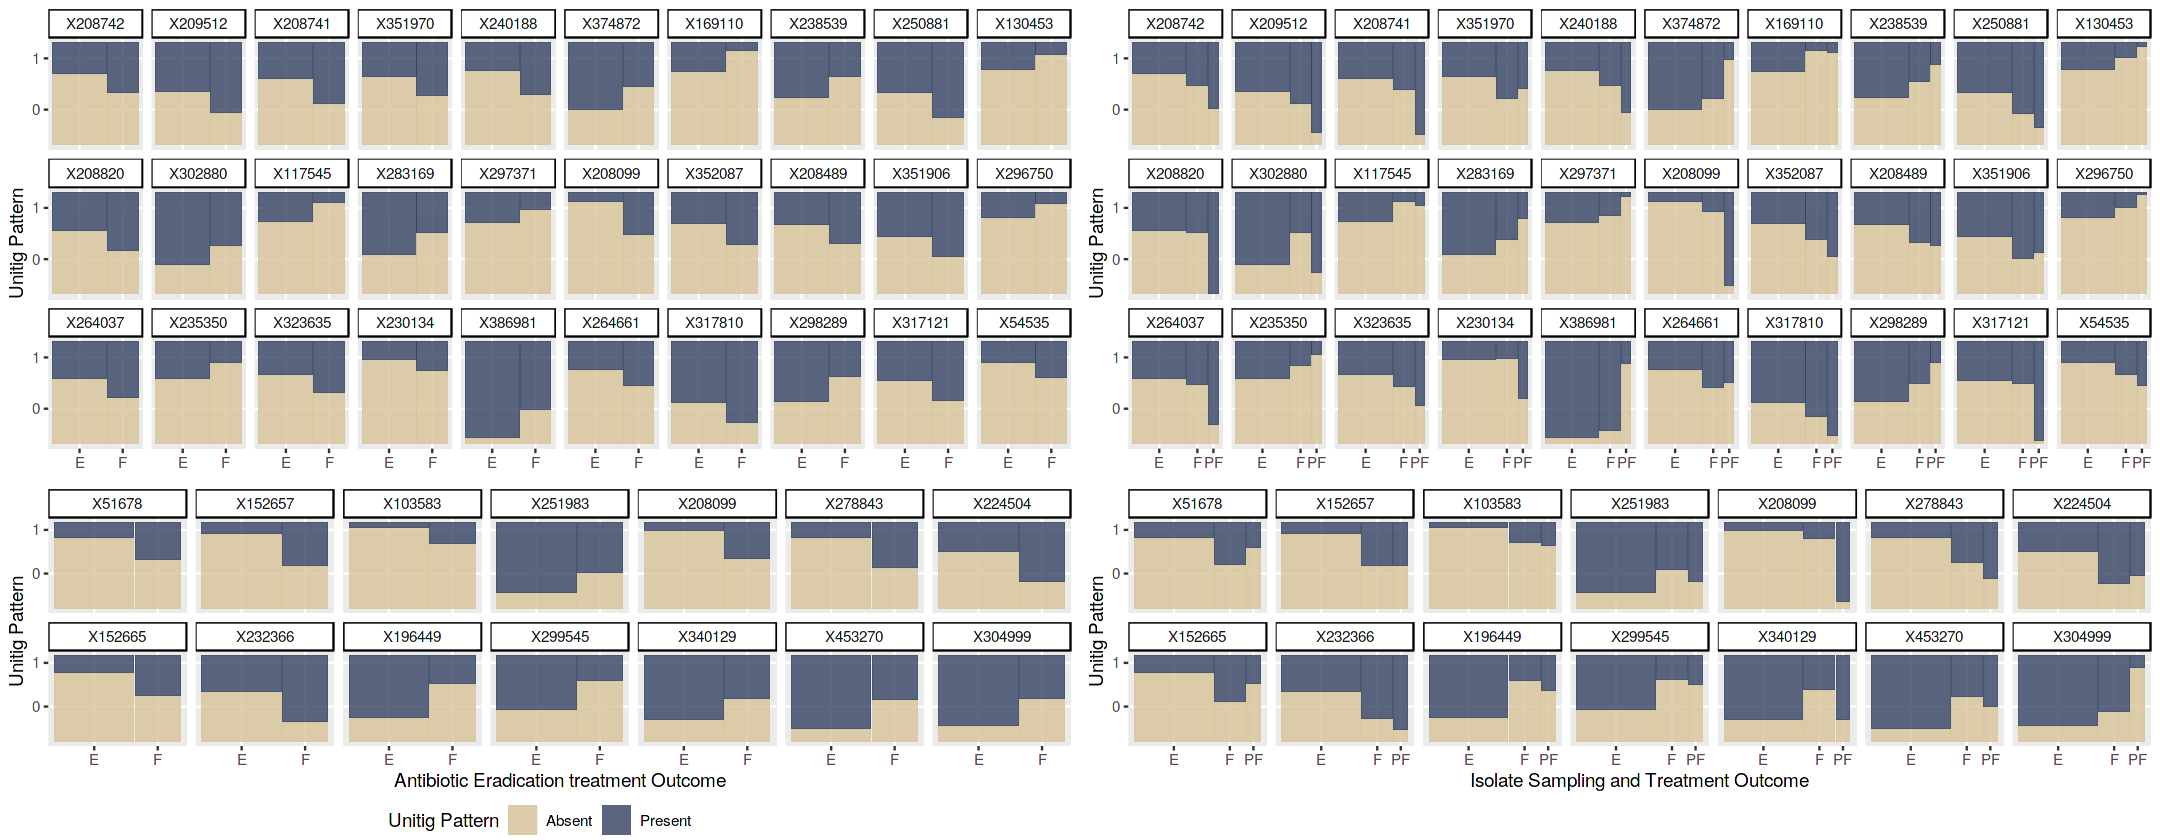

In [84]:
options(repr.plot.width=18, repr.plot.height=7)

plot_grid(aet_pa_f30+theme(axis.title.x = element_blank(),legend.position = 'none'),
          daet_pa_f30+theme(axis.title.x = element_blank(),legend.position = 'none'),
          aet_pa_f10+theme(legend.position = 'none'),
          daet_pa_f10+theme(legend.position = 'none'),
          pa_leg,
          ncol=2, nrow=3,rel_heights=c(0.6,0.4,0.05))

ggsave('SuppFigurePatterns.png', dpi = 400,device = 'png', width = 15,height = 7)

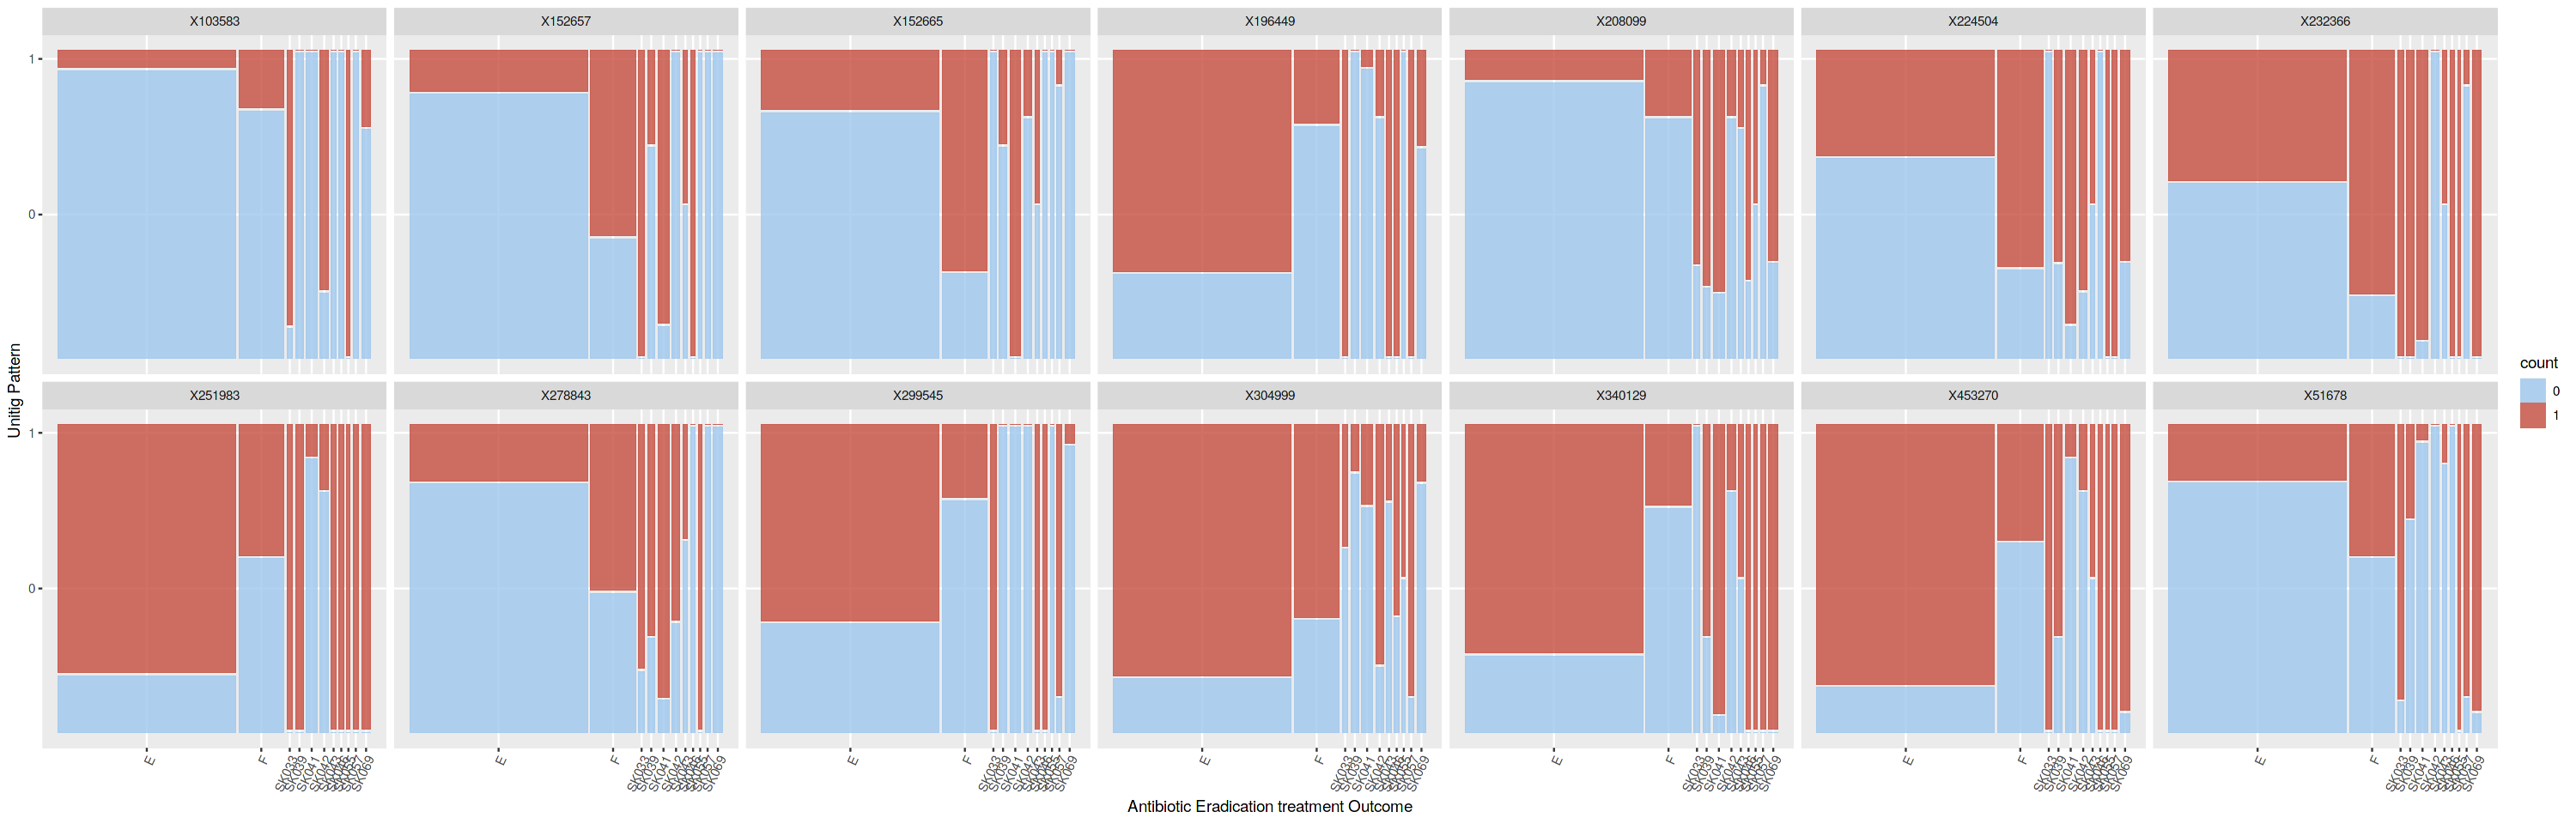

In [47]:
fup_patients <- c('SK033','SK041','SK069','SK039','SK043','SK046','SK042','SK055','SK057')

a <- mdata %>% filter(Patient %in% fup_patients) %>% 
mutate(Patient2=Patient)

b <- mdata %>% filter(!Patient %in% fup_patients) %>% 
mutate(Patient2=AETdiff)

mdata_pat2 <-  rbind(a,b)

pat2_tf10kpa <- merge(tf10kpa, mdata_pat2 , by.x = 'row.names',by.y='Isolate') %>% 
select(!AET) %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


options(repr.plot.width=25, repr.plot.height=8)

pat2_features <- data.frame(apply(pat2_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!Patient2, names_to = "Features", values_to = "count") 

ggplot(data = pat2_features) +
  geom_mosaic(aes(x=product(count,Patient2), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication treatment Outcome')+
facet_wrap(~Features,ncol=7)+
scale_fill_manual(values = c('#9DC7ED','#C54C3F'))+
theme(axis.text.x = element_text(angle=65,hjust = 1))
# ggsave('fup_patient_mosaic.png', device = 'png',dpi = 400, width = 13,height = 10)

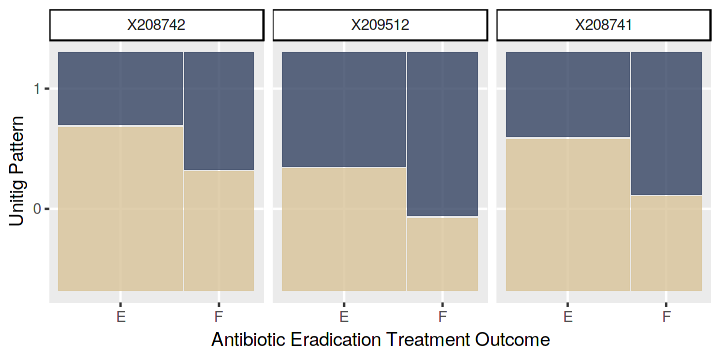

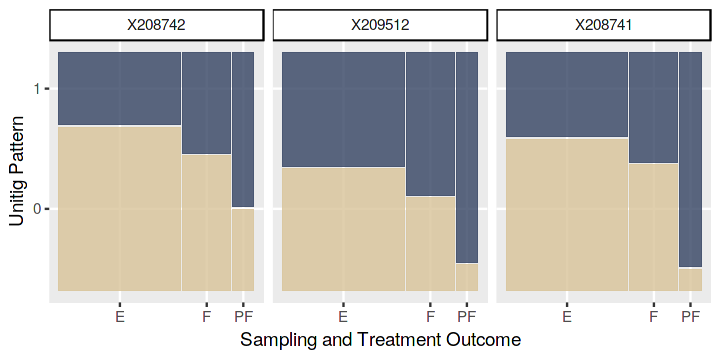

In [121]:
options(repr.plot.width=6, repr.plot.height=3)

aet_features_imp %>% arrange(desc(Importance)) %>% 
filter(Importance>0.043) %>% 
ggplot() +
  geom_mosaic(aes(x=product(count,AET), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(legend.position='none',
strip.background = element_rect(colour="black",
                                        fill='white'))
ggsave('Top3_30aet.png', device = 'png',dpi = 450,width = 6,height = 2.5)

daet_features_imp %>% arrange(desc(Importance)) %>% 
filter(Importance>0.043) %>% 
ggplot() +
  geom_mosaic(aes(x=product(count,AETdiff), fill = count))+
ylab('Unitig Pattern')+xlab('Sampling and Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(legend.position='none',strip.background = element_rect(colour="black",
                                        fill='white'))
ggsave('Top3_30daet.png', device = 'png',dpi = 450,width = 6,height = 2.5)

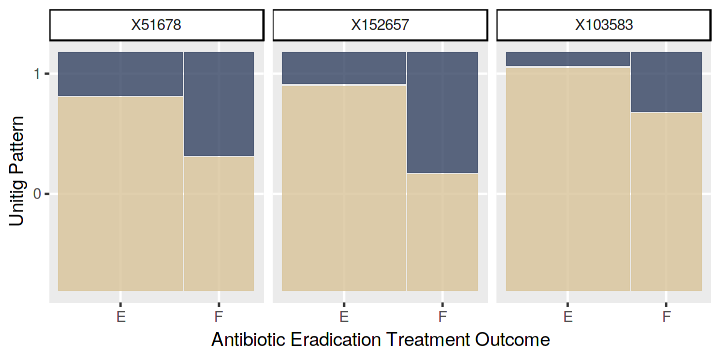

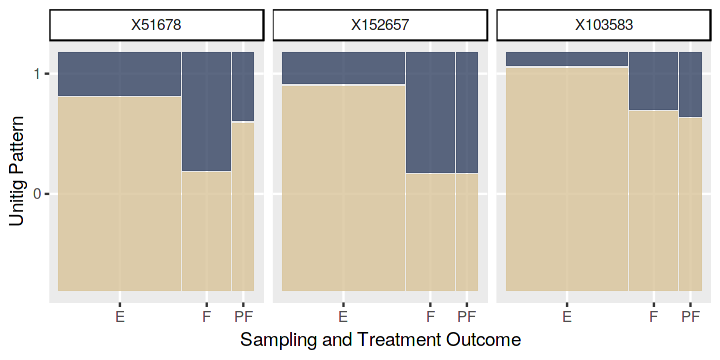

In [122]:
options(repr.plot.width=6, repr.plot.height=3)

aet_features10_imp %>% arrange(desc(Importance)) %>% 
filter(Importance>0.09) %>% 
ggplot() +
  geom_mosaic(aes(x=product(count,AET), fill = count))+
ylab('Unitig Pattern')+xlab('Antibiotic Eradication Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(legend.position='none',strip.background = element_rect(colour="black",
                                        fill='white'))
ggsave('Top3_10aet.png', device = 'png',dpi = 450,width = 6,height = 2.5)
daet_features10_imp %>% arrange(desc(Importance)) %>% 
filter(Importance>0.09) %>% 
ggplot() +
  geom_mosaic(aes(x=product(count,AETdiff), fill = count))+
ylab('Unitig Pattern')+xlab('Sampling and Treatment Outcome')+
facet_wrap(~fct_reorder(Features,desc(Importance)),ncol=7)+
scale_fill_manual(values = c('#D8C399','#344362'), labels=c('Absent','Present'),name='Unitig Pattern')+
theme(legend.position='none',strip.background = element_rect(colour="black",
                                        fill='white'))
ggsave('Top3_10daet.png', device = 'png',dpi = 450,width = 6,height = 2.5)


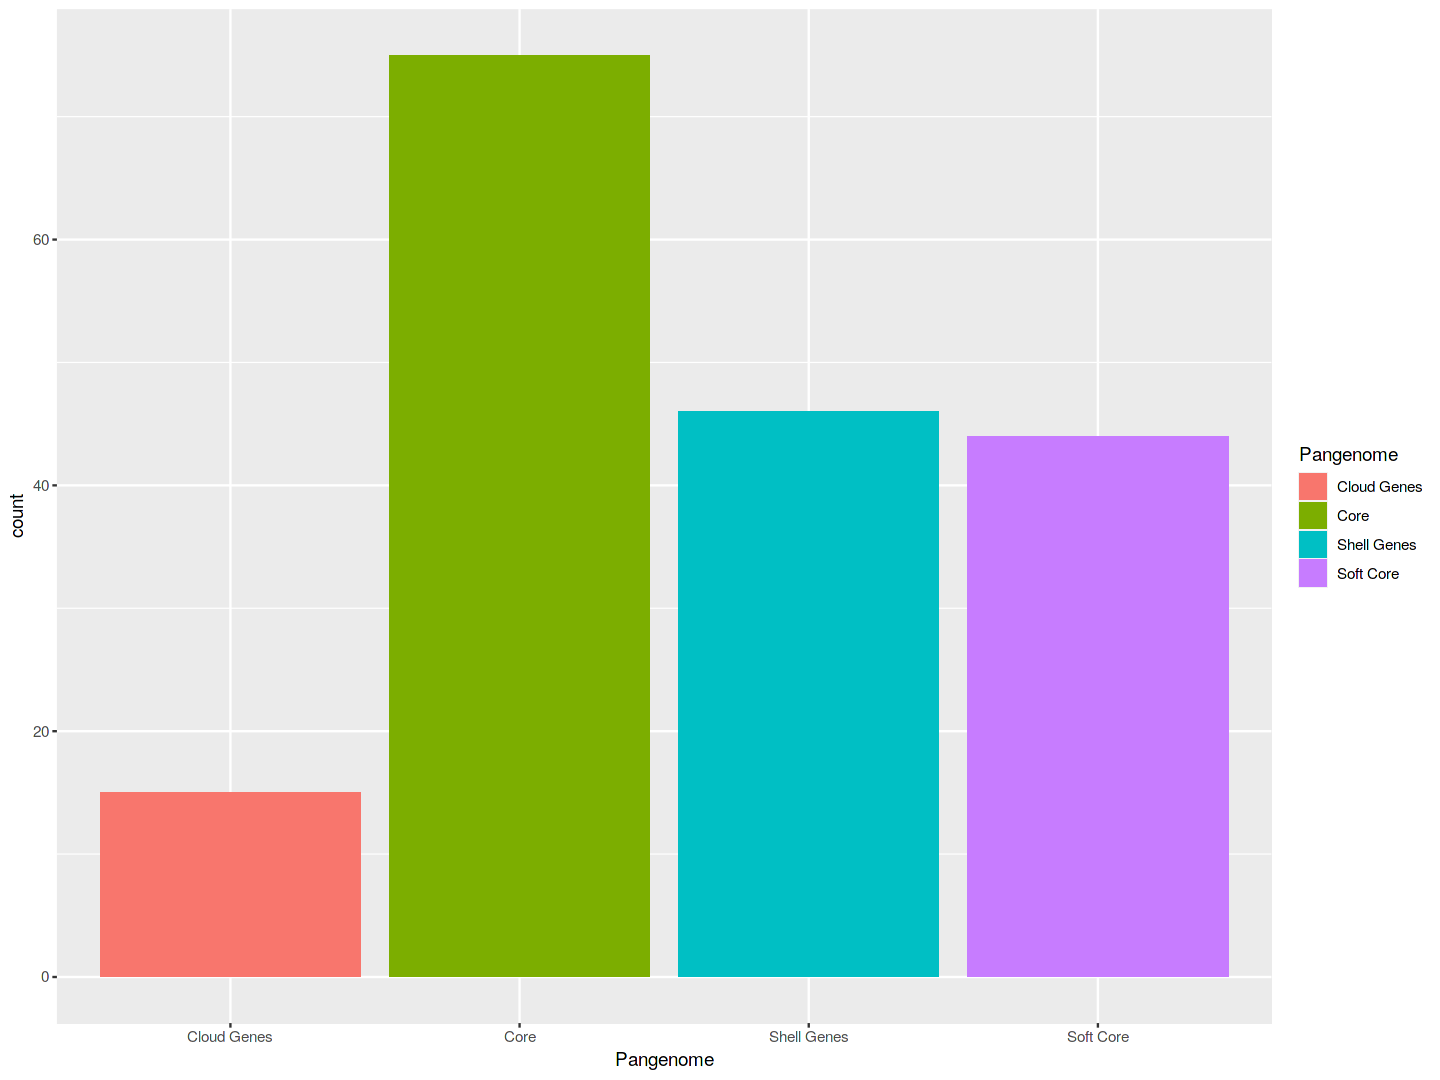

In [364]:
## Add correlated features ##
############################

Corr30Groups <- read.csv('SelFeatures_PSC.csv')[,-1] 
Corr30Groups %>% 
ggplot()+
aes(x=Pangenome, fill=Pangenome)+
geom_bar()

In [51]:

Corr30Groups <- read.csv('SelFeatures_PSC.csv')[,-1] %>% 
arrange(desc(Importance)) %>% 
select(Features,CorrelationGroup)


In [53]:
read.csv('SelFeatures_PSC.csv')[,-1]

gene_name roary_aln Features Importance CorrelationGroup Region    
1   rimJ      aaaT      1027235  0.03056046  5               Coding    
2   rimJ      aaaT      1027351  0.03056046  5               Coding    
3   rimJ      aaaT       749572  0.03056046  5               Coding    
4   rimJ      aaaT       750562  0.03056046  5               Coding    
5   rimJ      aaaT       894234  0.03056046  5               Coding    
6   rimJ      aaaT       794840  0.03056046  5               Coding    
7   rimJ      aaaT       888488  0.03056046  5               Coding    
8   rimJ      aaaT       889858  0.03056046  5               Coding    
9   rimJ      aaaT      1003125  0.03056046  5               Coding    
10  gatA      aam_2      804062  0.03195913 17               Coding    
11  acoR      acoR_2     174201  0.03631675 14               Non-Coding
12  phbB      actIII_2   208186  0.03098763  4               Non-Coding
13  alsT_1    alsT_1     230134  0.02685334 10               Coding    
14  alsT_2    alsT_2    1180805  0.02571612 29               Non-Coding
15  argJ      argJ       208101  0.03098763  4               Coding    
16  betA      betA_2     965496  0.02685334 10               Coding    
17  btuE      btuE_2     182900  0.03280852  1               Coding    
18  btuE      btuE_2     182900  0.03280852  1               Coding    
19  ccoN1     ccoN1_4    924887  0.02210858 22               Non-Coding
20  clpP      clpP_3     351906  0.02936861 25               Coding    
21  clsC      clsC       283499  0.03882531 13               Coding    
22  comEC     comEC      686936  0.03098763  4               Coding    
23  comEC     comEC      571982  0.03098763  4               Coding    
24  comEC     comEC      687686  0.03098763  4               Coding    
25  comEC     comEC      677763  0.03098763  4               Coding    
26  comEC     comEC      812486  0.03098763  4               Coding    
27  comEC     comEC      800831  0.03882531 13               Coding    
28  comEC     comEC      646827  0.03098763  4               Coding    
29  comEC     comEC      772844  0.03882531 13               Coding    
30  comEC     comEC      689307  0.03098763  4               Coding    
⋮   ⋮         ⋮         ⋮        ⋮          ⋮                ⋮         
151 rfbB      rfbB       130454  0.03601027  2               Coding    
152 rhsC      rhsC_2     604919  0.02685334 10               Coding    
153 rhsC      rhsC_2     943032  0.02685334 10               Coding    
154 sasA_1    sasA_11    182984  0.03280852  1               Coding    
155 sasA_2    sasA_16    182903  0.03280852  1               Coding    
156 sotB      sotB_1     620217  0.02382763 20               Non-Coding
157 soxA      soxA       208499  0.03056046  5               Non-Coding
158 topA      topA_1     786608  0.03280852  1               Coding    
159 topA      topA_1     796510  0.03280852  1               Coding    
160 topA      topA_1      70451  0.03280852  1               Coding    
161 topA      topA_1     942729  0.03280852  1               Coding    
162 topA      topA_1     802378  0.03280852  1               Coding    
163 topA      topA_1     773497  0.03280852  1               Coding    
164 topA      topA_1     982287  0.03280852  1               Coding    
165 topA      topA_1      95120  0.03280852  1               Coding    
166 topA      topA_1     938206  0.03280852  1               Coding    
167 topA      topA_1     796202  0.03280852  1               Coding    
168 topA      topA_1     971580  0.03280852  1               Coding    
169 topA      topA_1     790496  0.03280852  1               Coding    
170 topA      topA_1     942719  0.03280852  1               Coding    
171 topA      topA_1     933932  0.03280852  1               Coding    
172 tpx       tpx       1180805  0.02571612 29               Non-Coding
173 trkA      trkA      1188837  0.03136152 19               Coding    
174 xerC      xerC_2     304586  0.02382763 

In [332]:

gckmerpa <- read.csv('featsCorr30_kmerpa.csv',row.names = 1)
corr_kpa <- merge(t(gckmerpa), mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(Sequencing,AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

corr_kpa$samples <- paste(corr_kpa$Sequencing,corr_kpa$AET)

t_corr_kpa <- t(corr_kpa[,-c(1,2)] %>% select(!samples))
colnames(t_corr_kpa) <- c('FollowUp1','Original0','Original1')
t_corr_kpa<-data.frame(t_corr_kpa)

tfrq_corr_kpa <- t_corr_kpa %>% mutate(Fup1 = FollowUp1/55) %>%
mutate(Org0 = Original0/316) %>% 
mutate(Org1 = Original1/124)

options(repr.plot.width=19, repr.plot.height=9)


mtfrq_corr_kpa <- melt(tfrq_corr_kpa %>% rownames_to_column() %>% 
select(rowname,Fup1,Org0,Org1))

mmtfrq_corr_kpa <- merge(mtfrq_corr_kpa,Corr30Groups, by.x='rowname',by.y='Features')




Using rowname as id variables



In [287]:
# for (i in 1:30){
    
#     print(mmtfrq_corr_kpa %>% filter(CorrelationGroup==i) %>% 
#     ggplot()+
#     aes(x=reorder(rowname,value),y=value,fill=variable)+
#     geom_bar(stat='identity',position = 'dodge')+
#     facet_wrap(~rowname,scales = 'free_x',ncol=10))
    
# }


In [288]:
# options(repr.plot.width=17, repr.plot.height=30)


# mmtfrq_corr_kpa %>% 
#     ggplot()+
#     aes(x=reorder(rowname,value),y=value,fill=variable)+
#     geom_bar(stat='identity',position = 'dodge')+
#     facet_wrap(~CorrelationGroup,scales = 'free_x',nrow=30, ncol=2)

In [336]:
## Add Ungrouped correlated features

Corr10Groups <- read.csv('SelFeatures_nPSC.csv')[,-1] %>% arrange(desc(Importance)) %>% 
select(Features,CorrelationGroup)

In [338]:

uckmerpa <- read.csv('featsCorr10_kmerpa.csv',row.names = 1)
ucorr_kpa <- merge(t(uckmerpa), mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
column_to_rownames('Row.names') %>% group_by(Sequencing,AET) %>% 
summarize_if(is.numeric,sum,na.rm = TRUE)  

ucorr_kpa$samples <- paste(ucorr_kpa$Sequencing,ucorr_kpa$AET)

t_ucorr_kpa <- t(ucorr_kpa[,-c(1,2)] %>% select(!samples))
colnames(t_ucorr_kpa) <- c('FollowUp1','Original0','Original1')
t_ucorr_kpa<-data.frame(t_ucorr_kpa)

tfrq_ucorr_kpa <- t_ucorr_kpa %>% mutate(Fup1 = FollowUp1/55) %>%
mutate(Org0 = Original0/316) %>% 
mutate(Org1 = Original1/124)

options(repr.plot.width=19, repr.plot.height=9)


mtfrq_ucorr_kpa <- melt(tfrq_ucorr_kpa %>% rownames_to_column() %>% 
select(rowname,Fup1,Org0,Org1))

mmtfrq_ucorr_kpa <- merge(mtfrq_ucorr_kpa,Corr10Groups, by.x='rowname',by.y='Features')


Using rowname as id variables



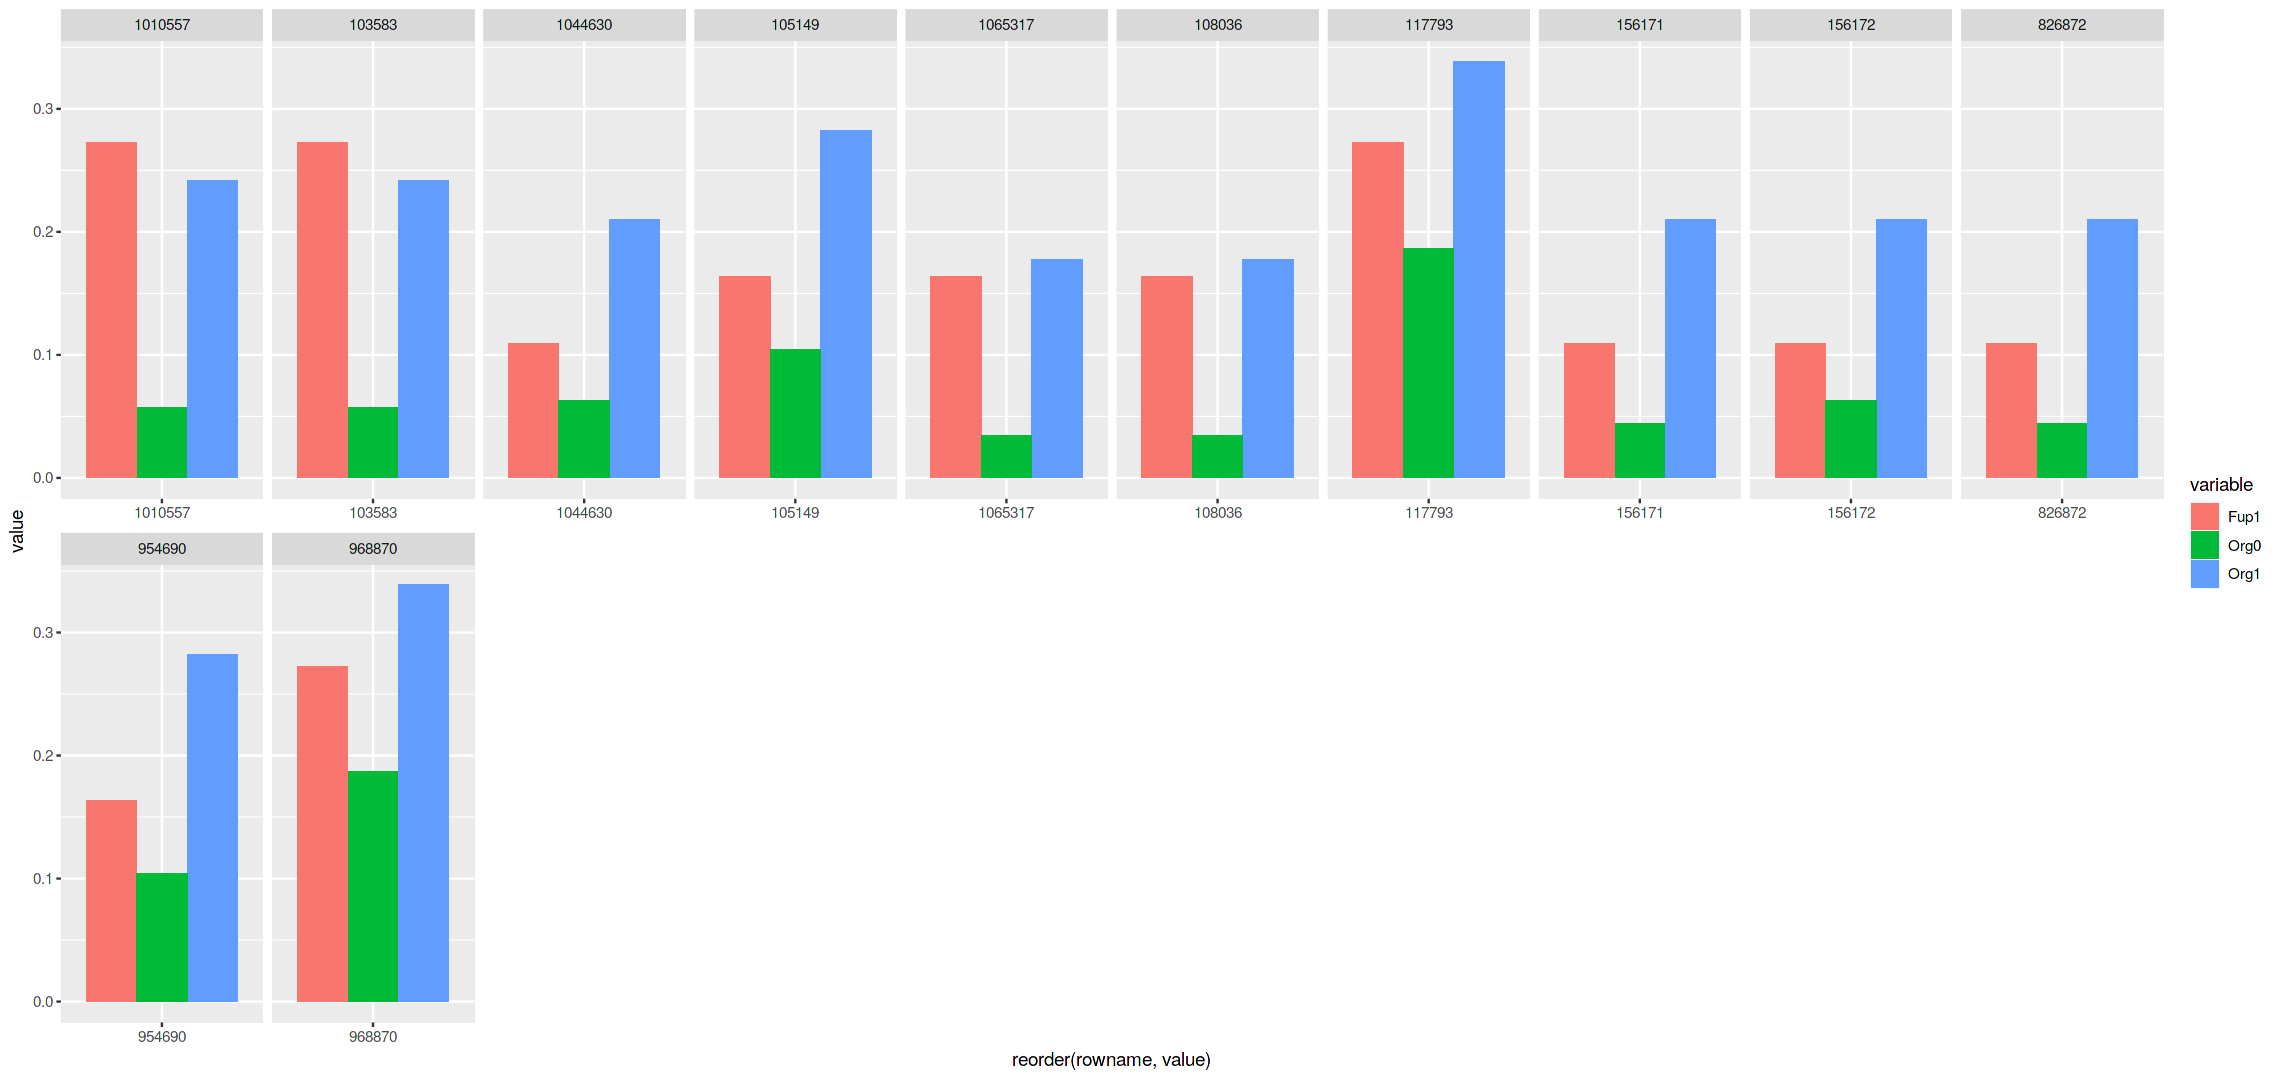

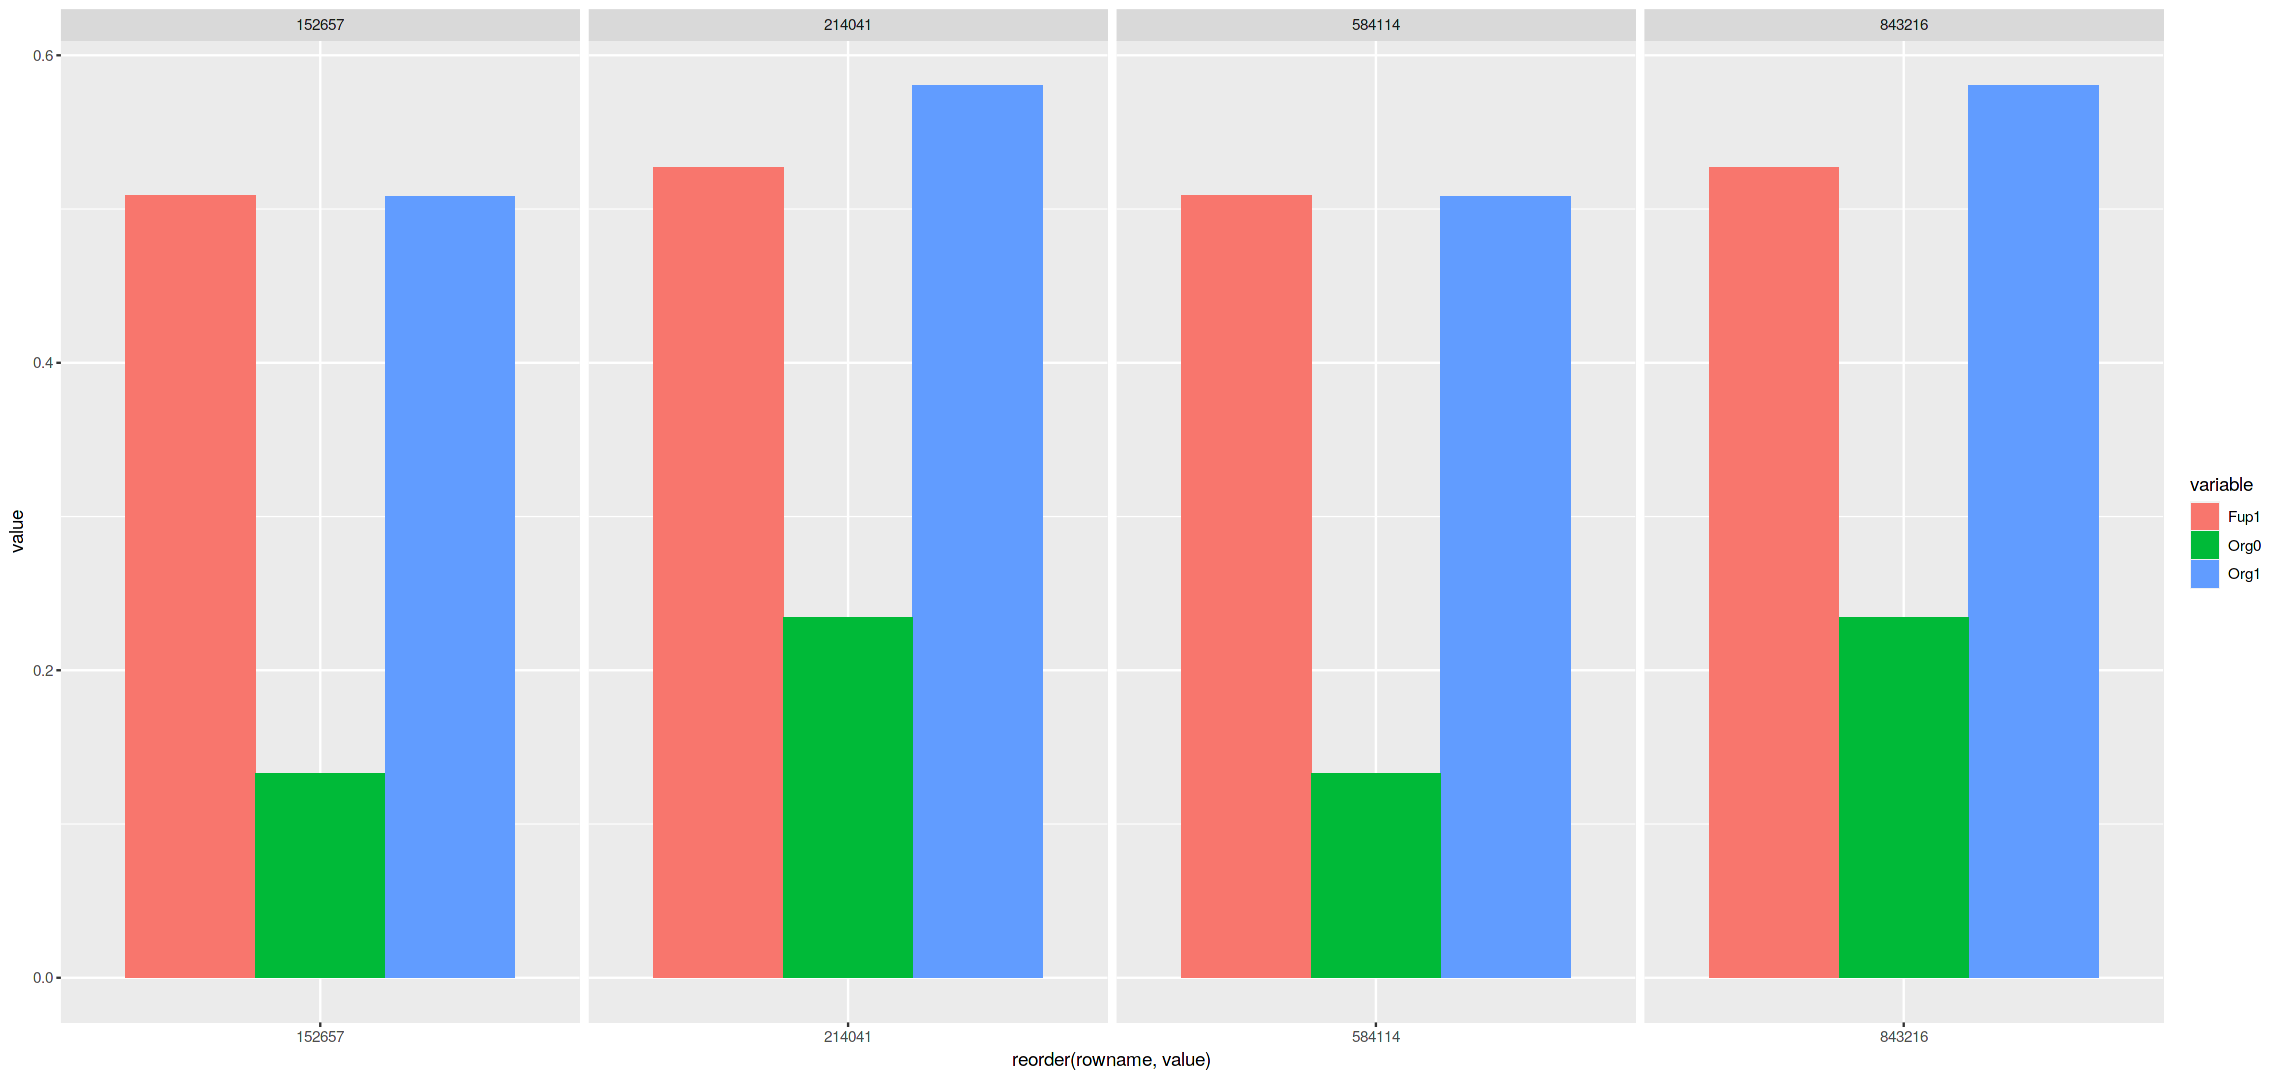

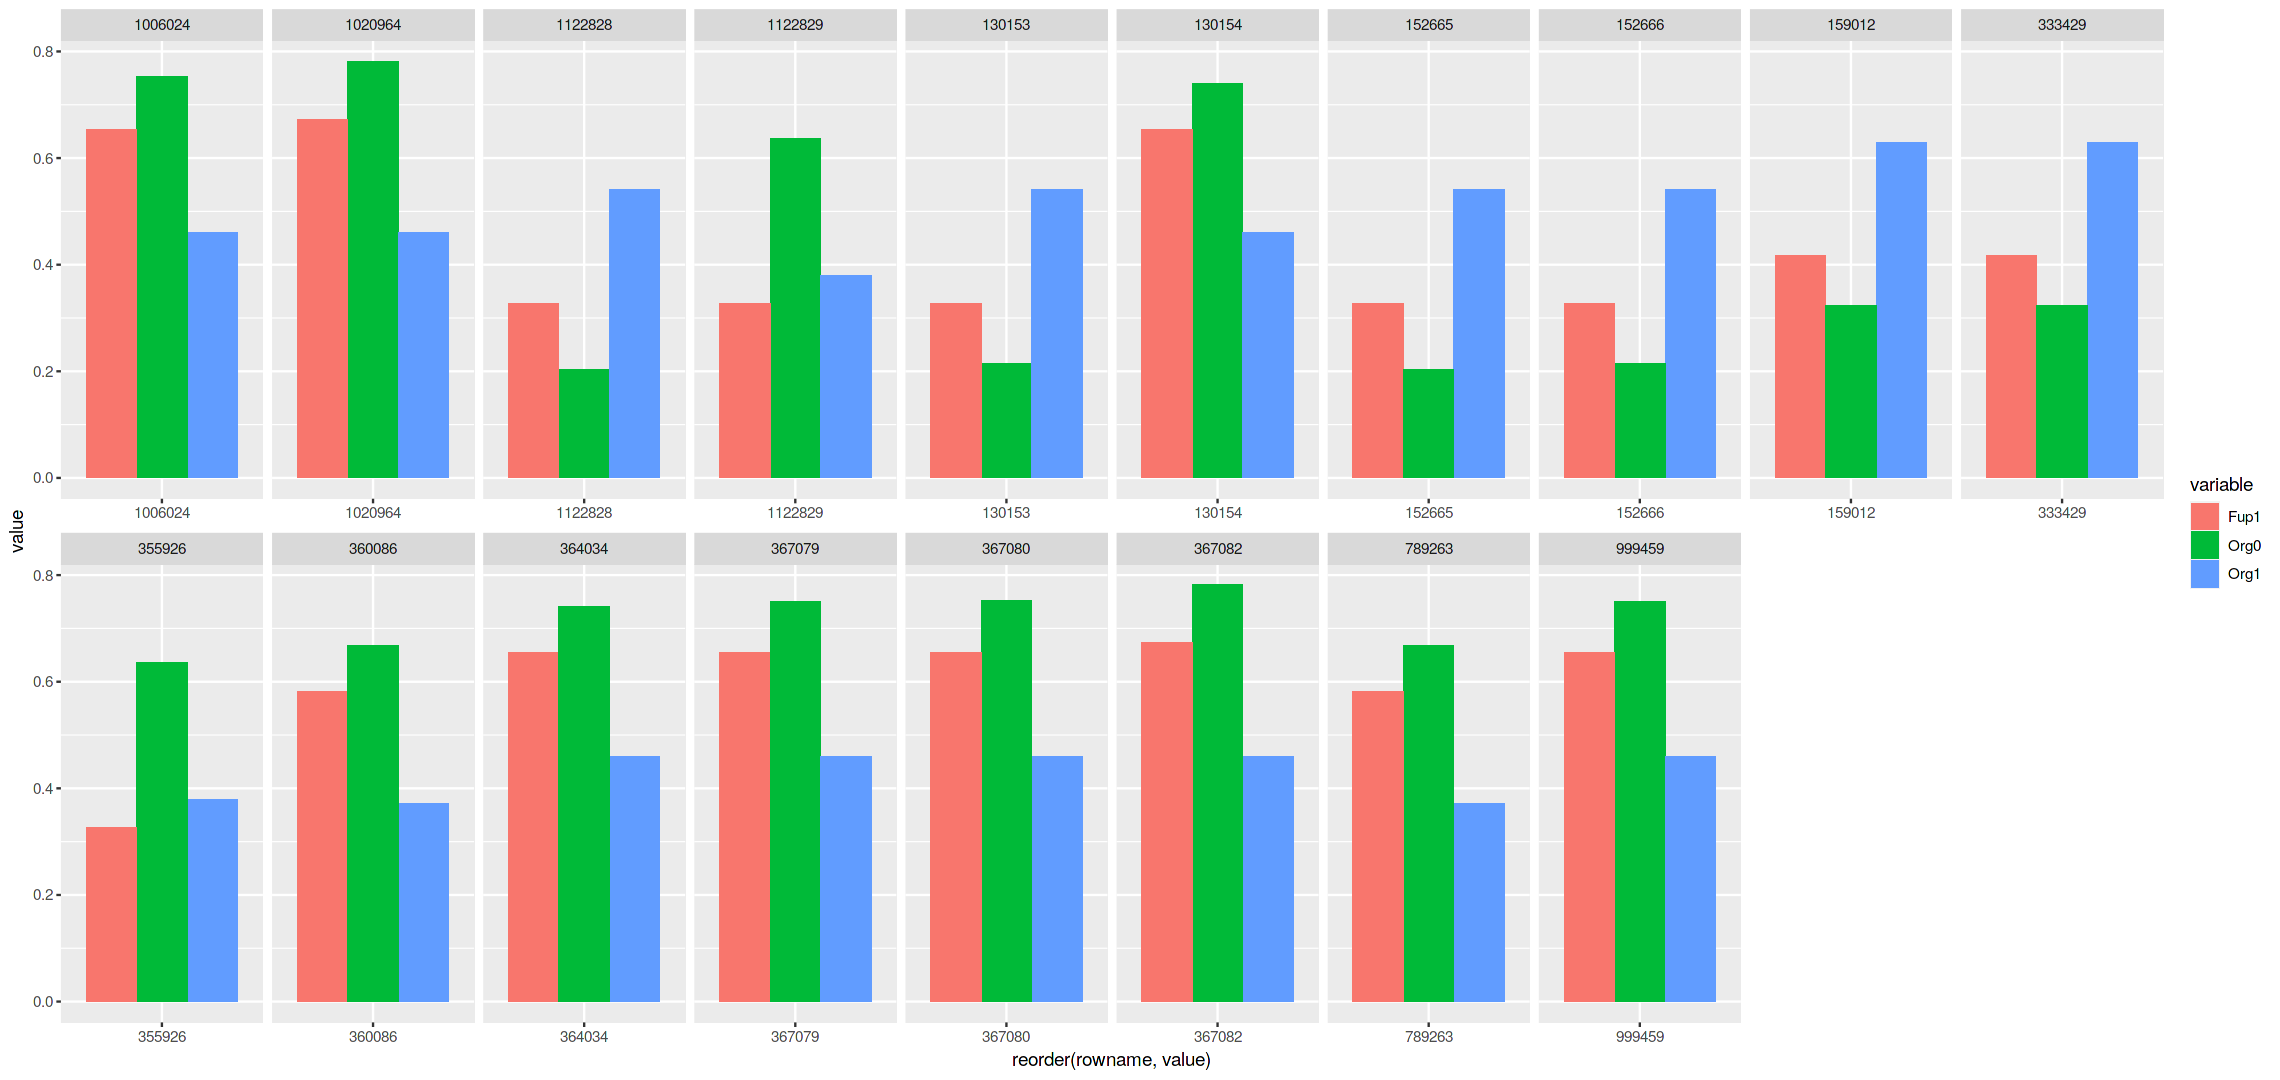

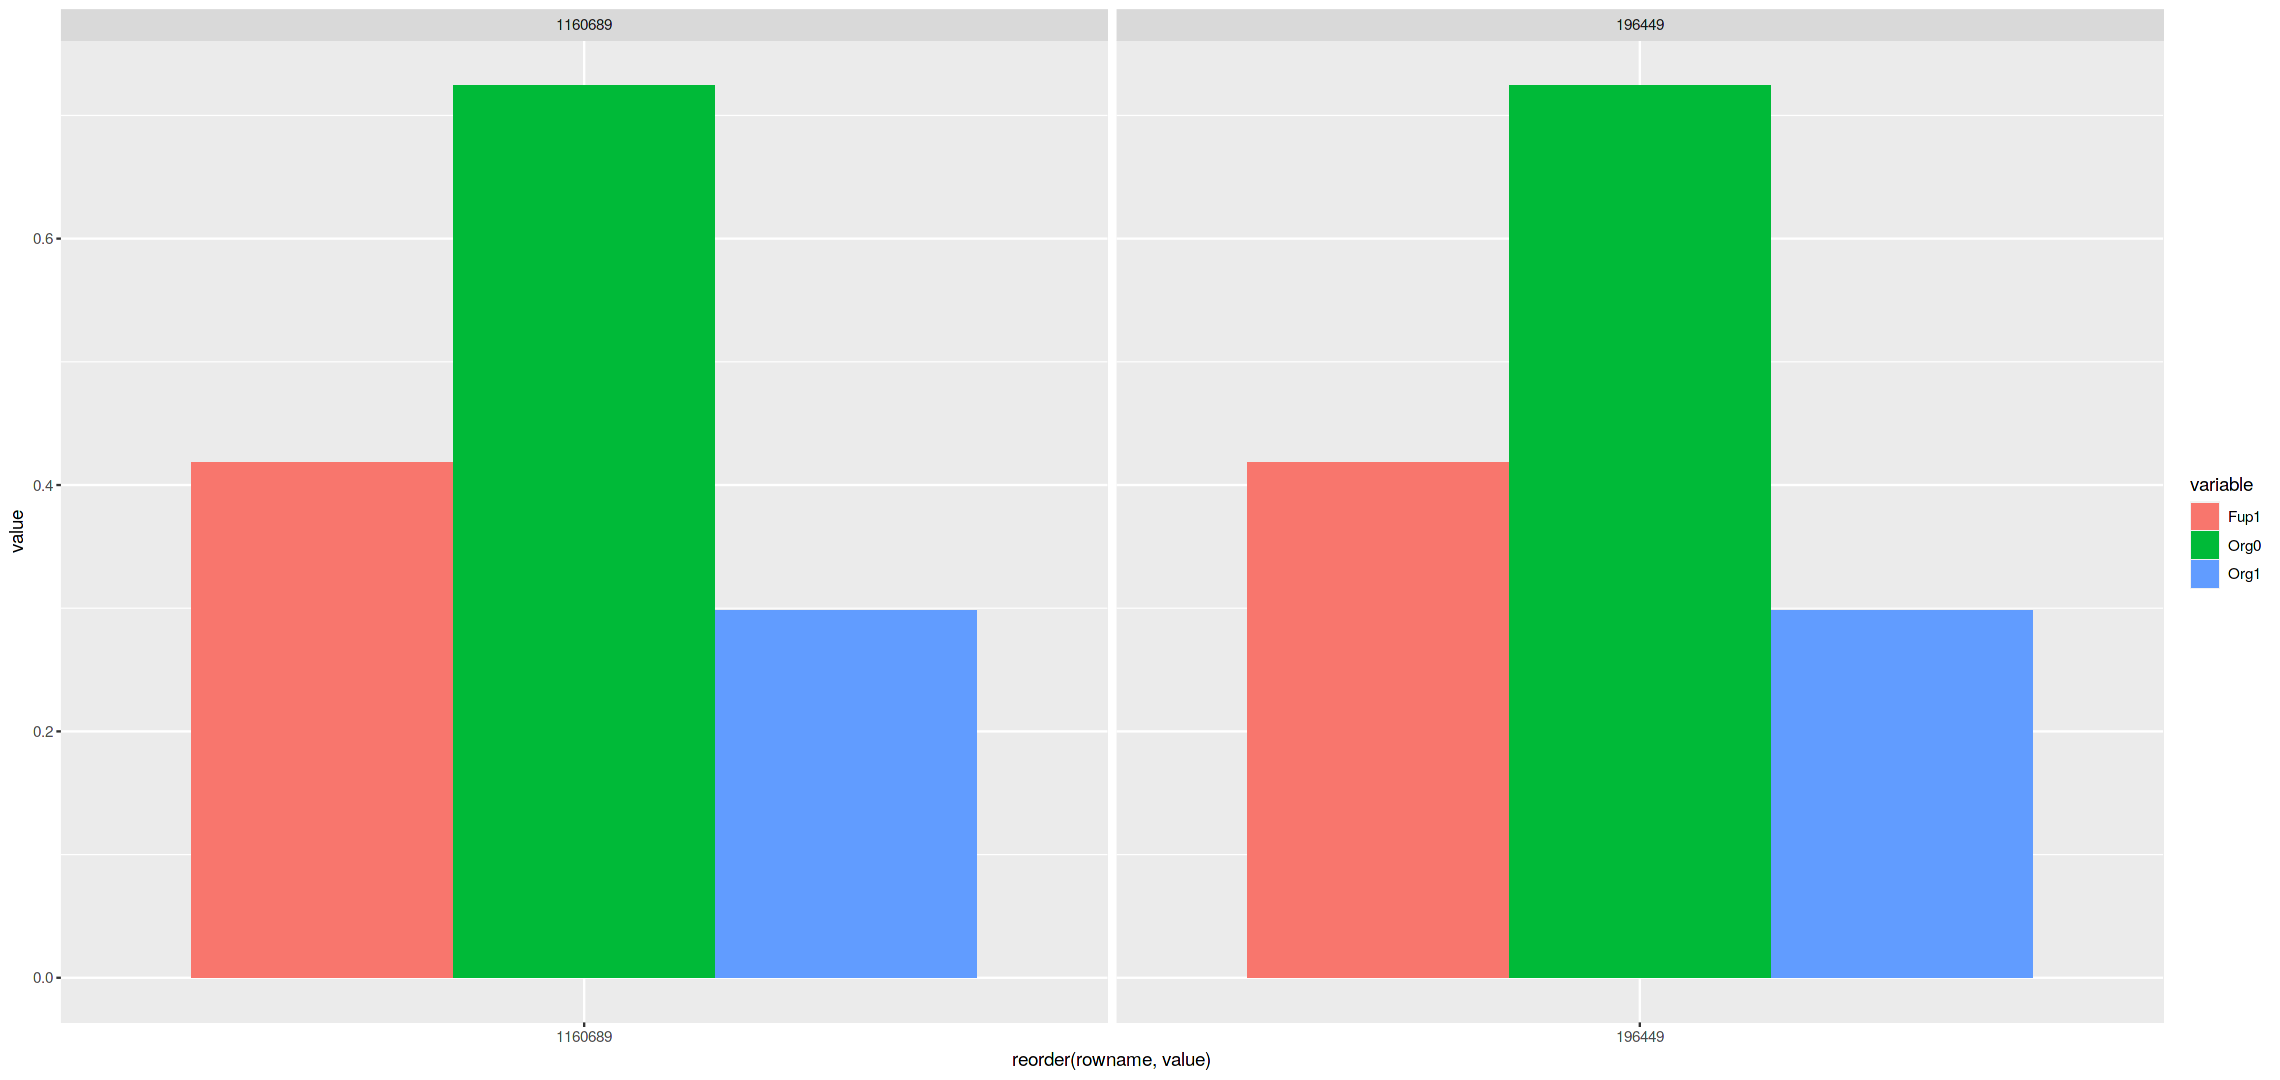

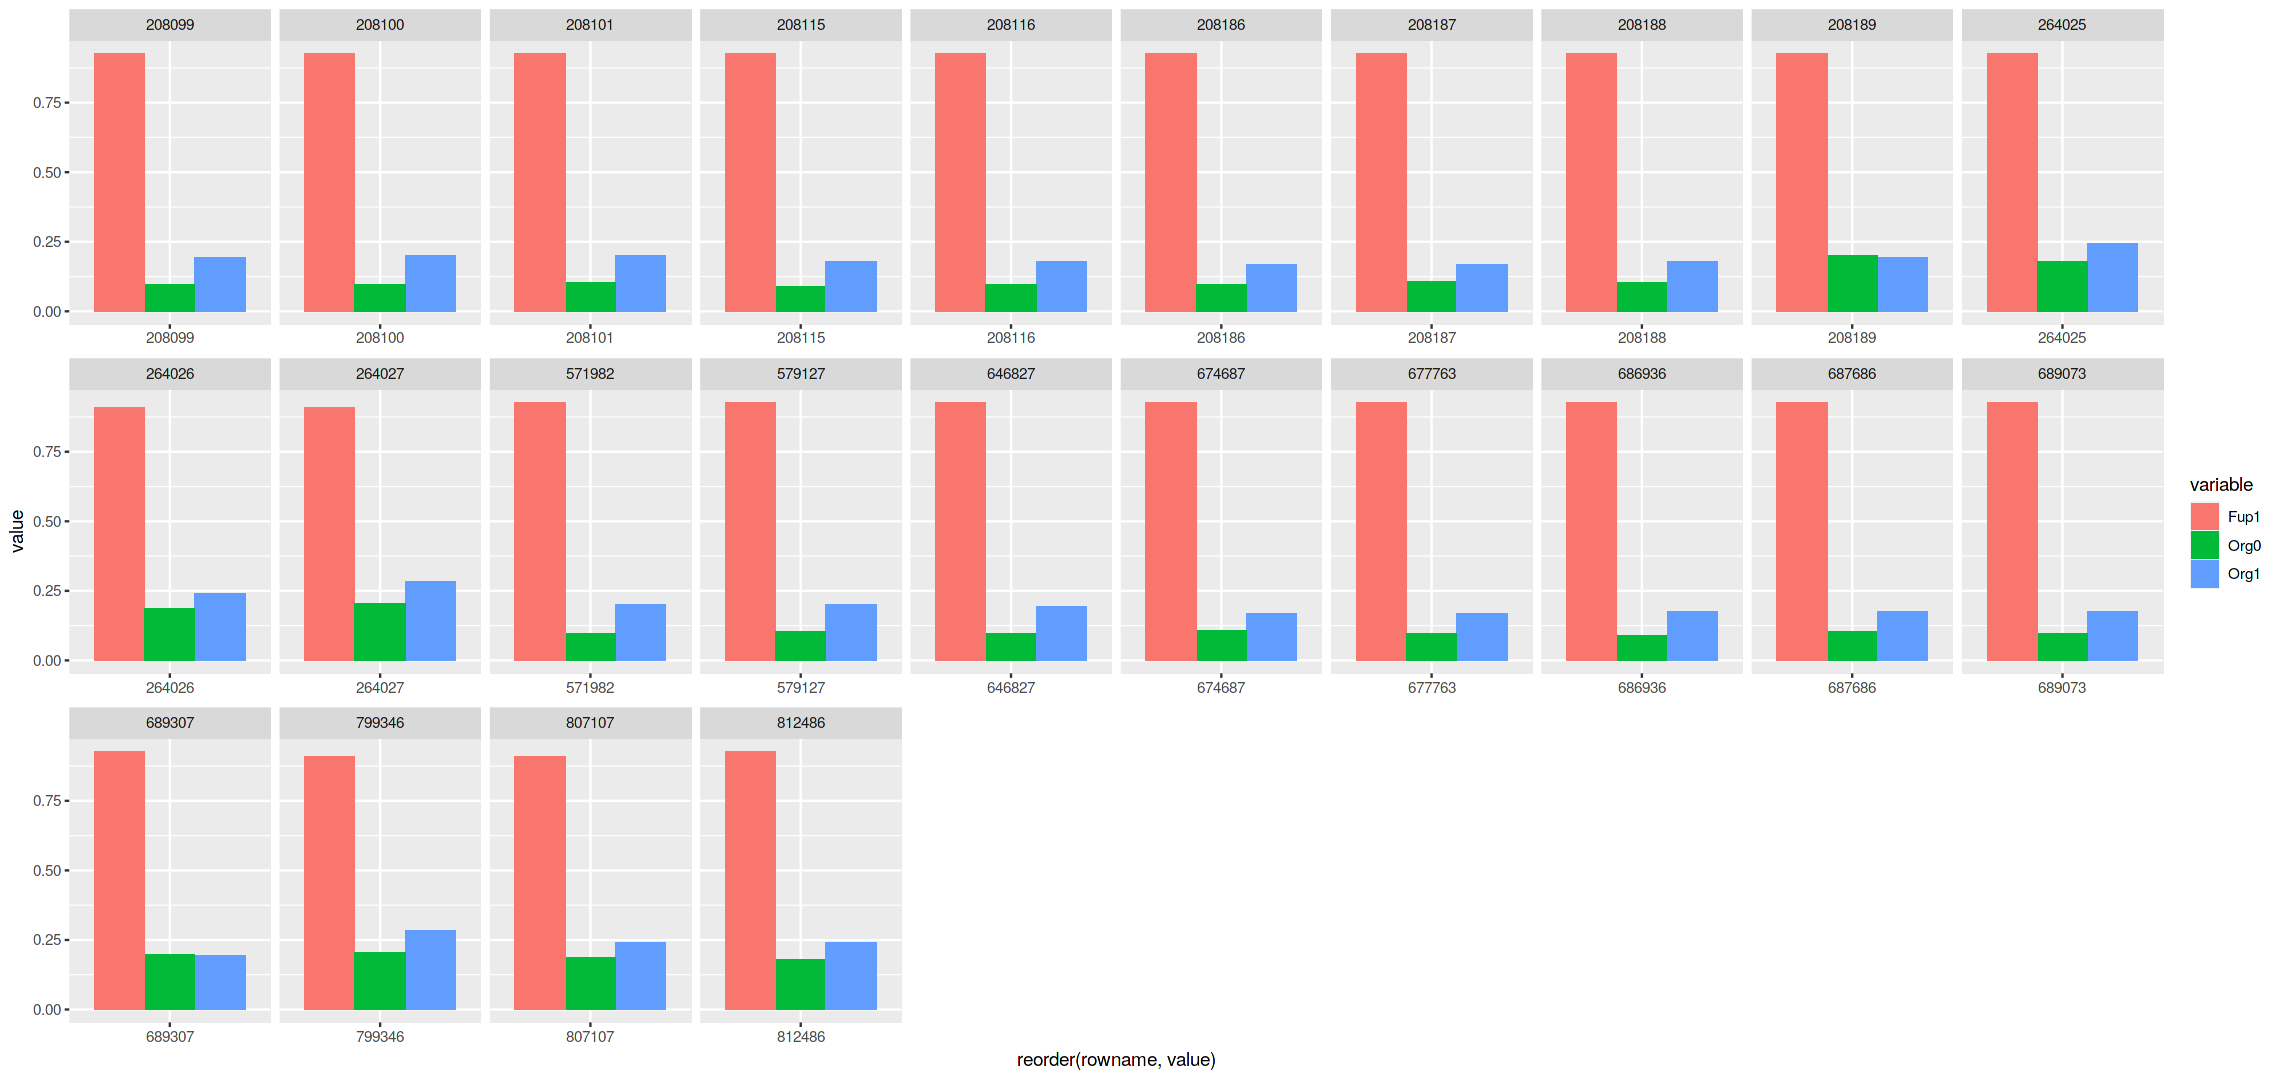

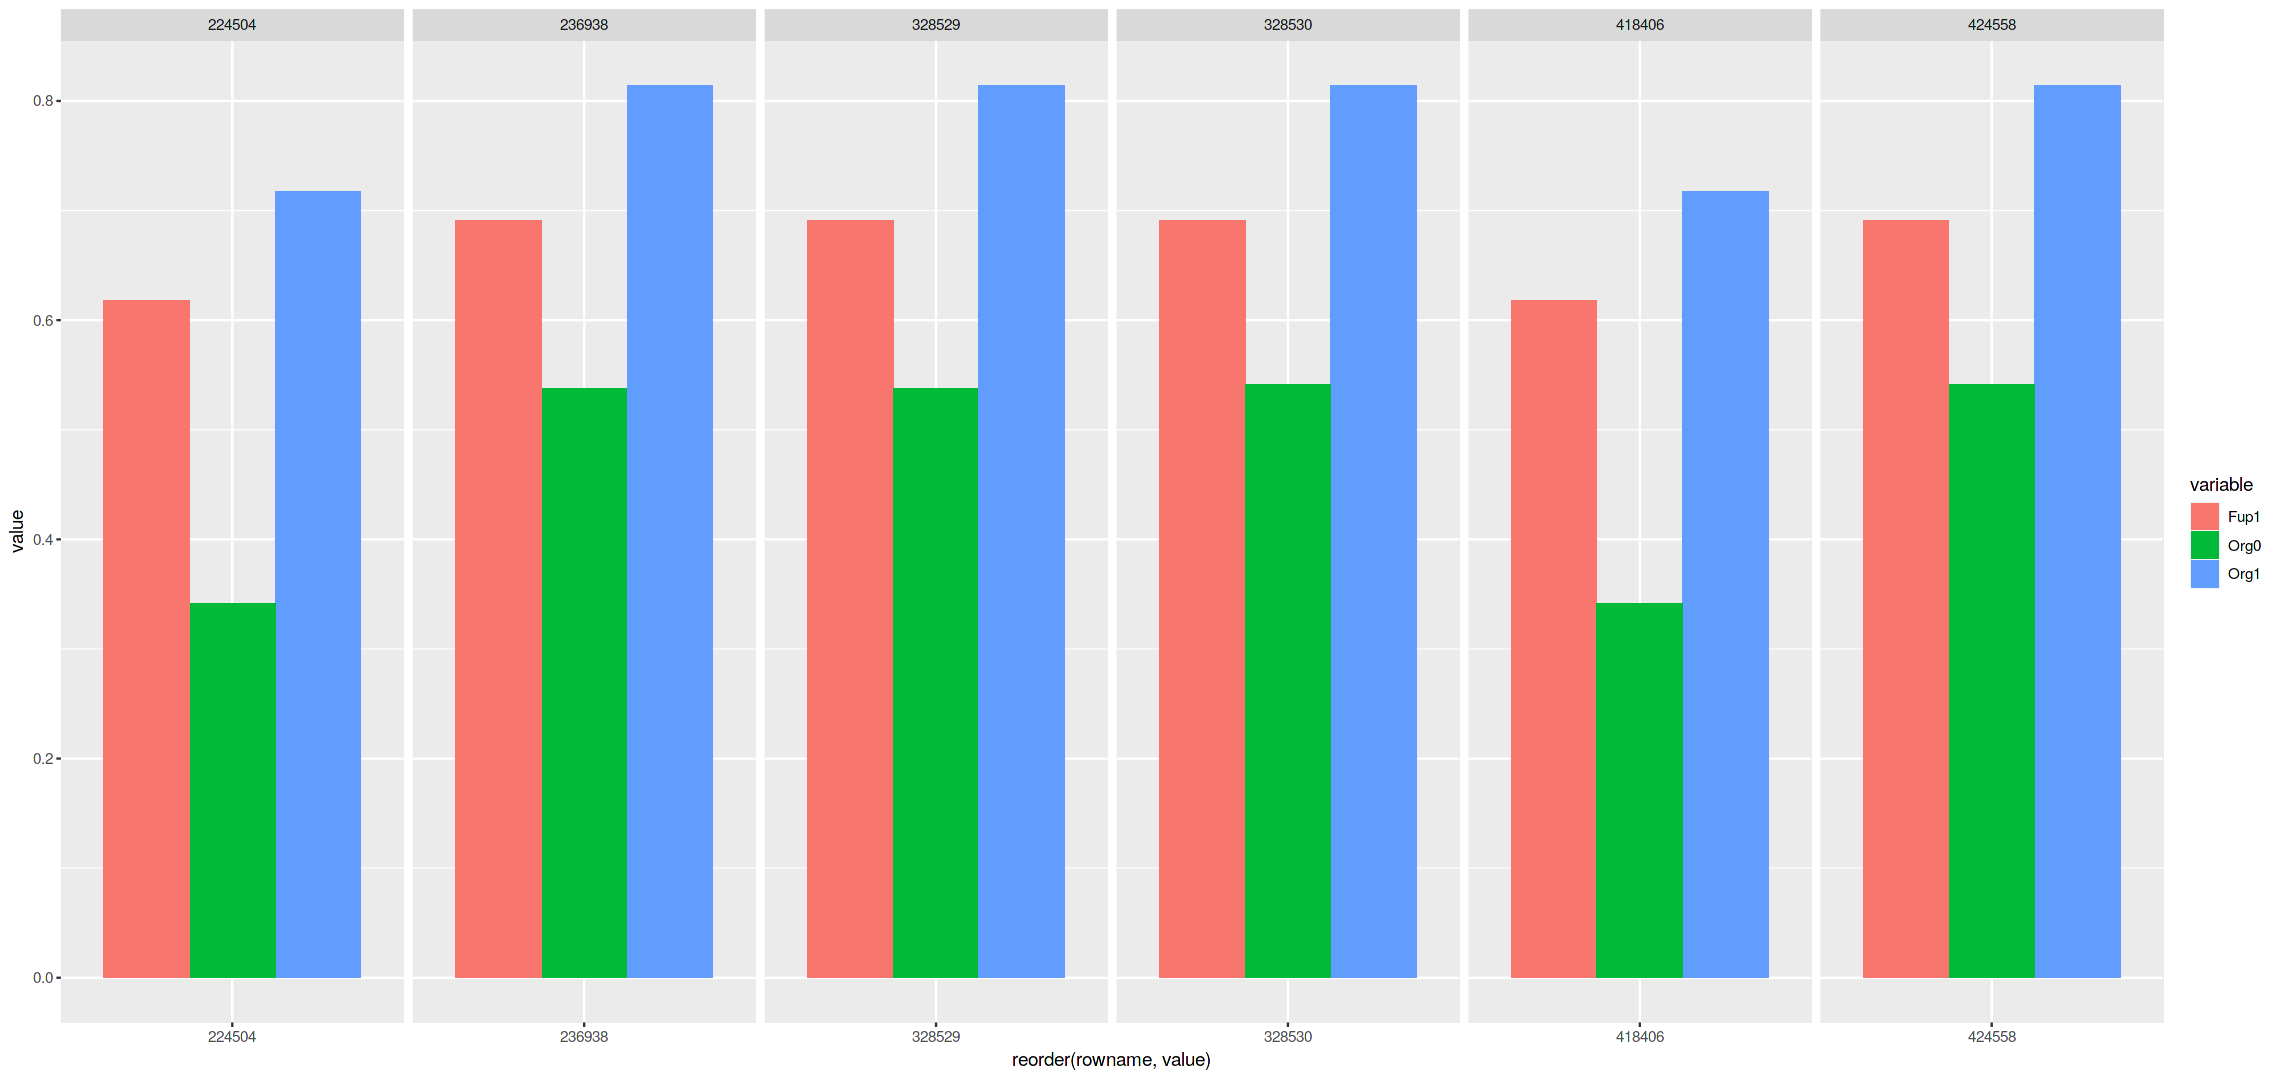

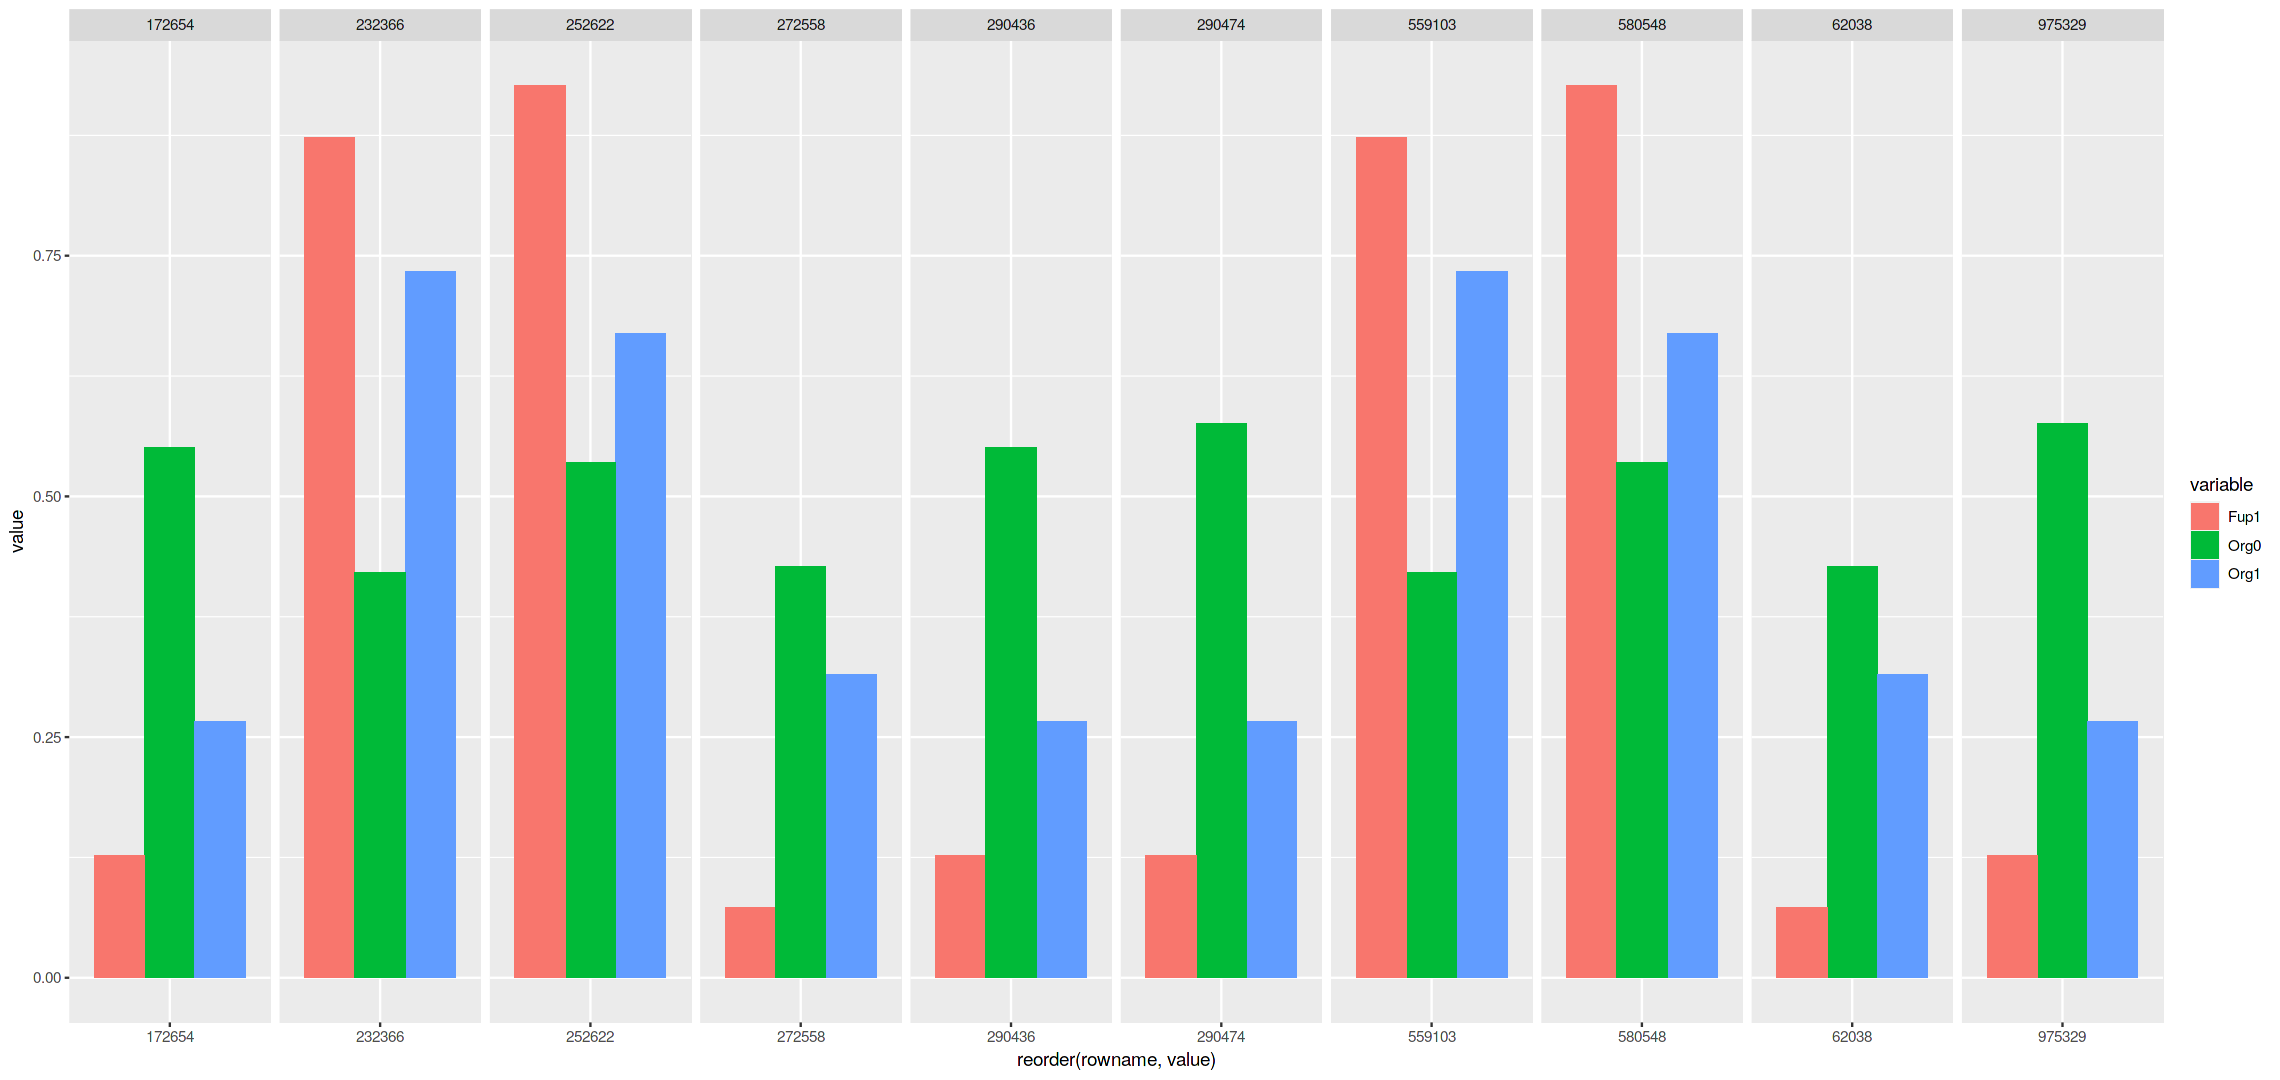

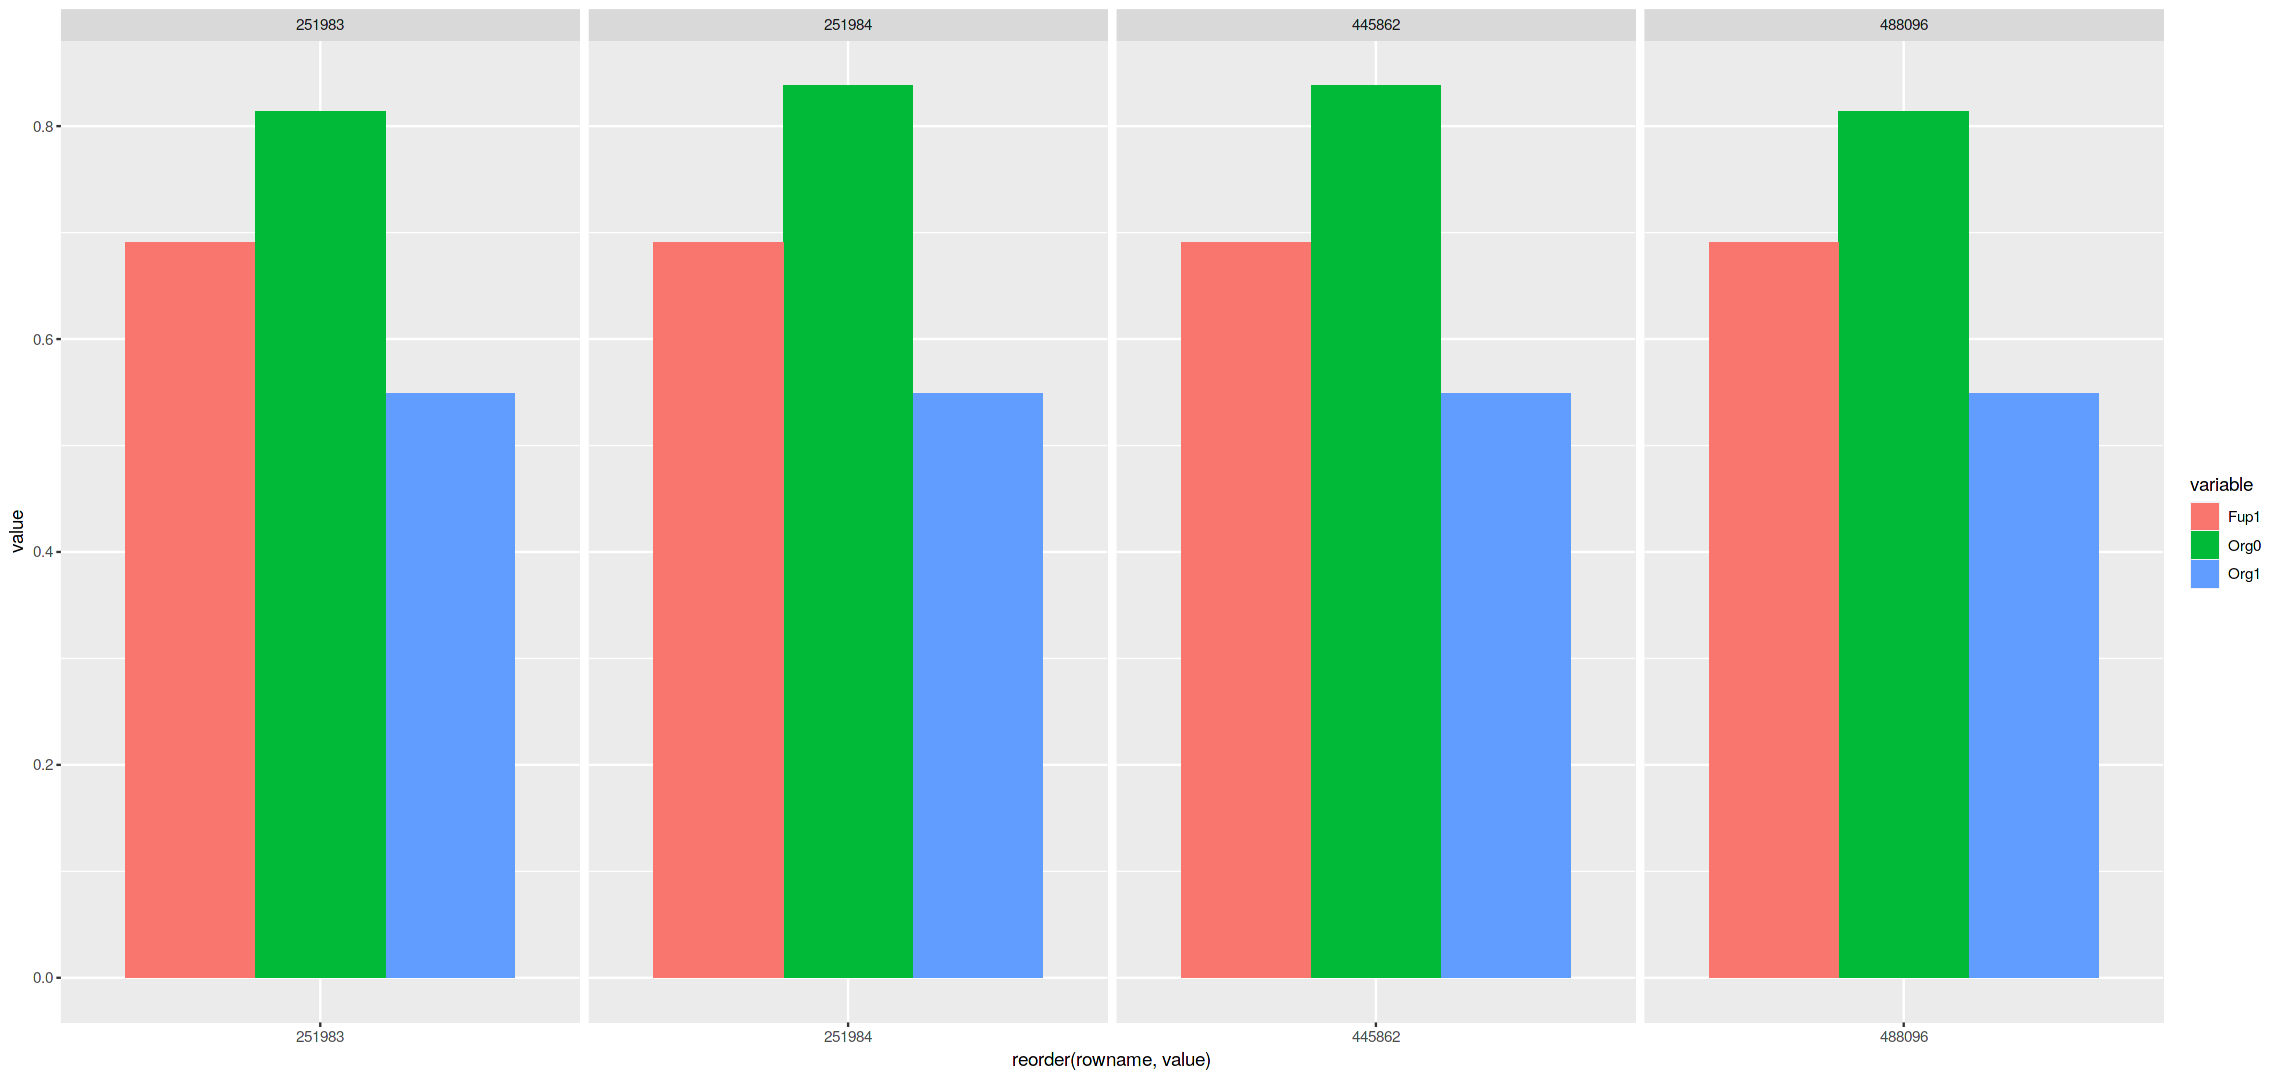

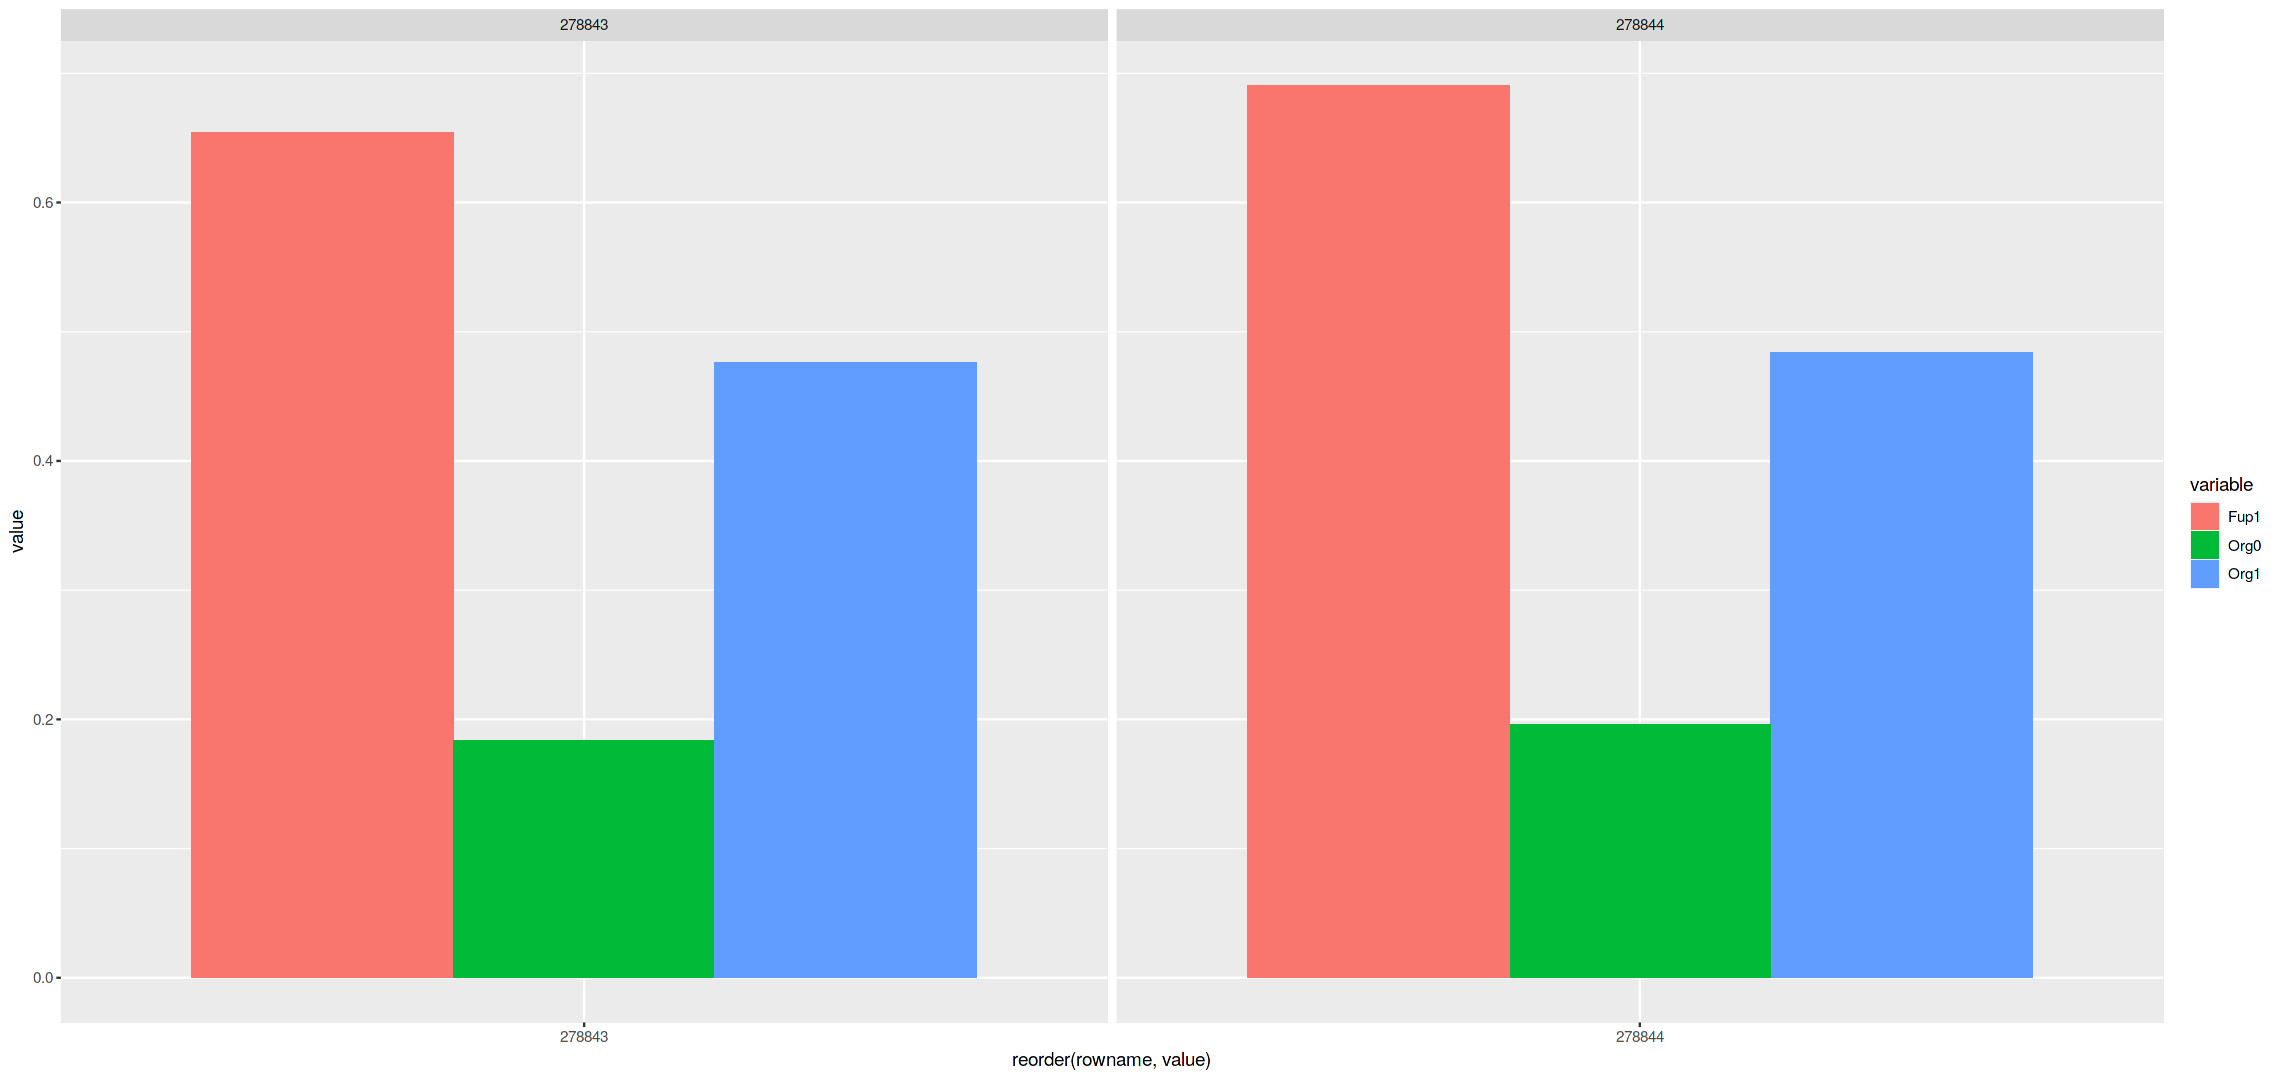

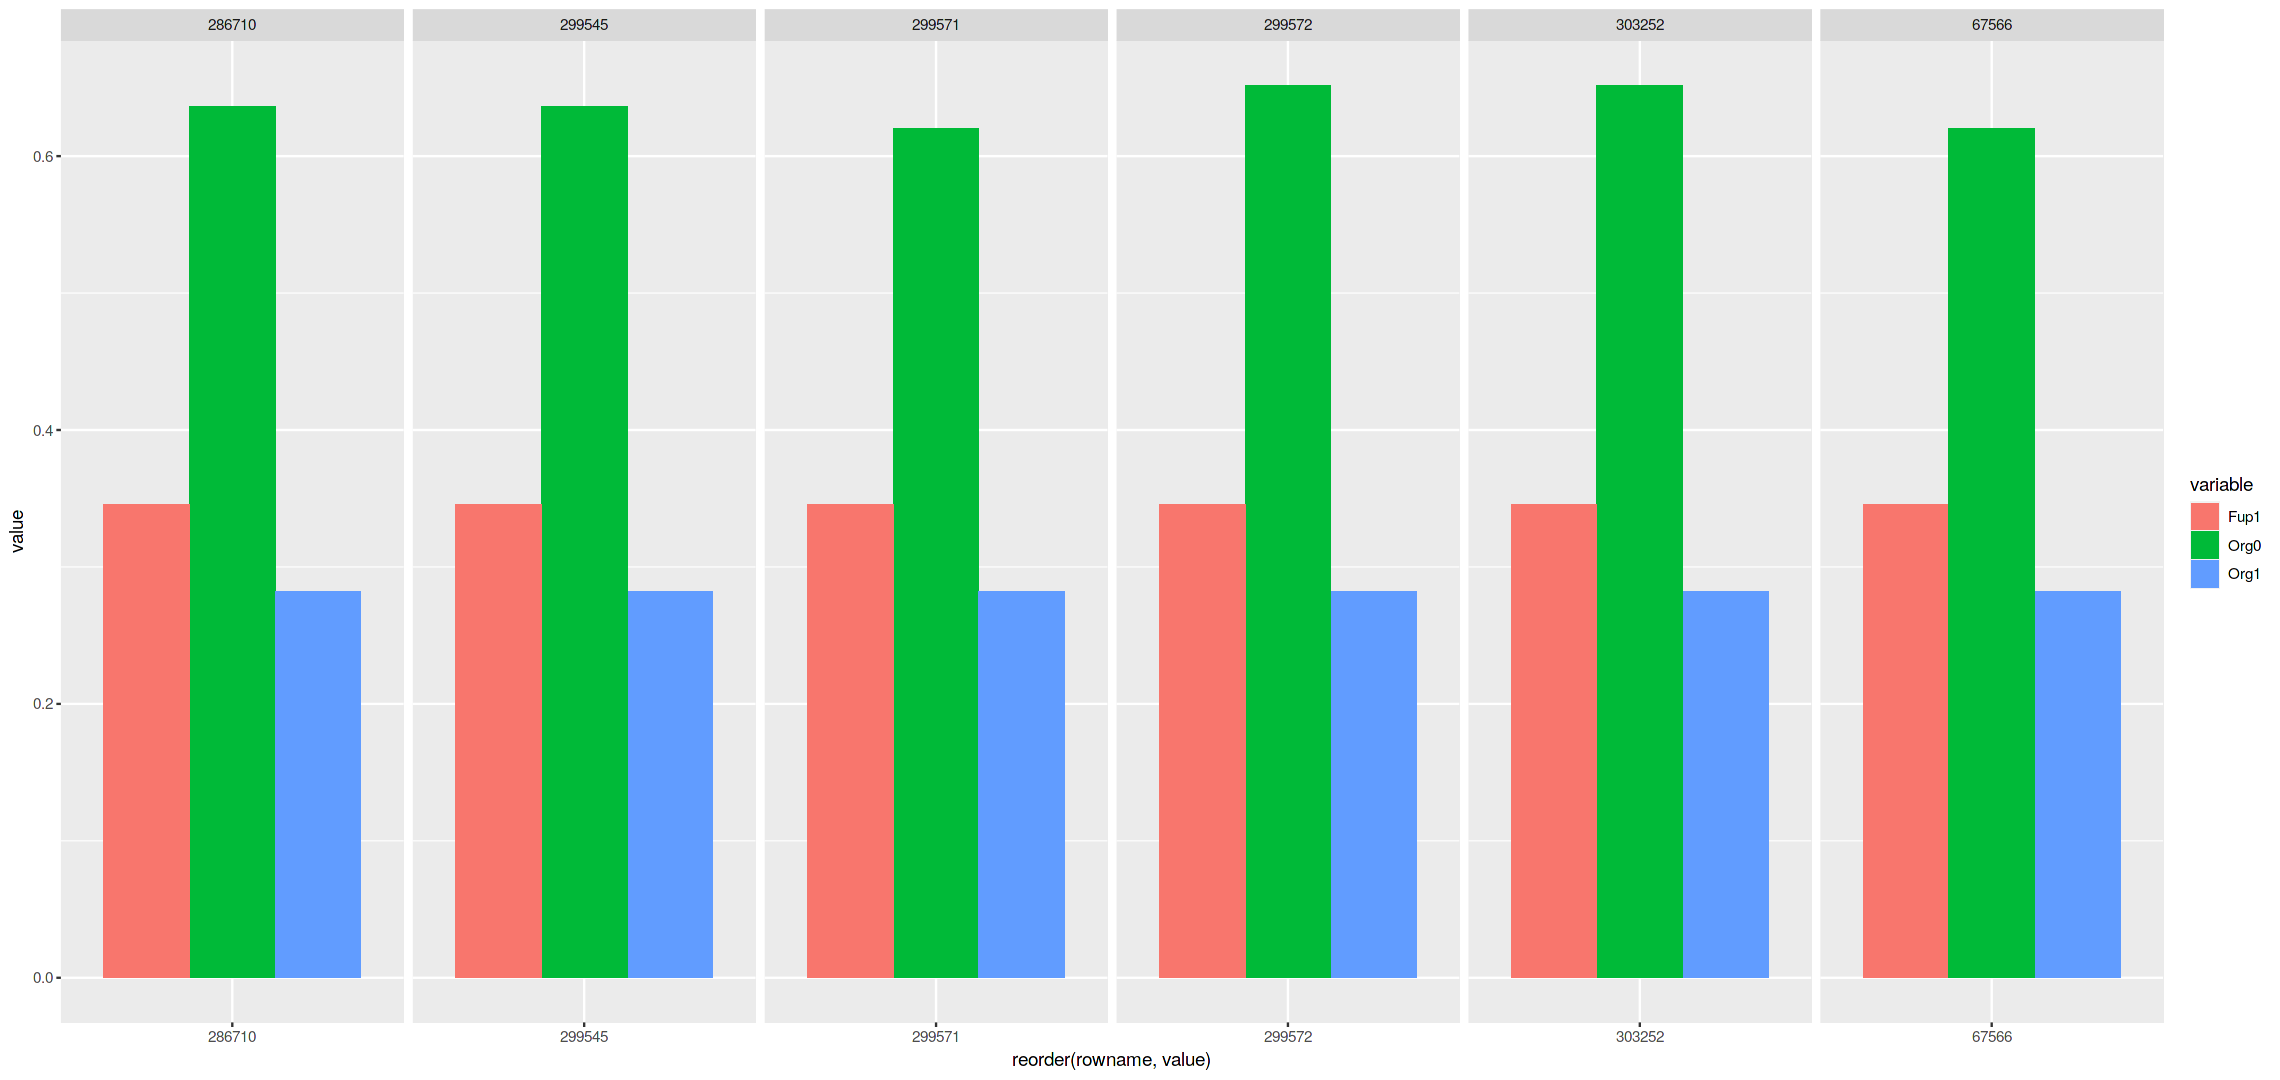

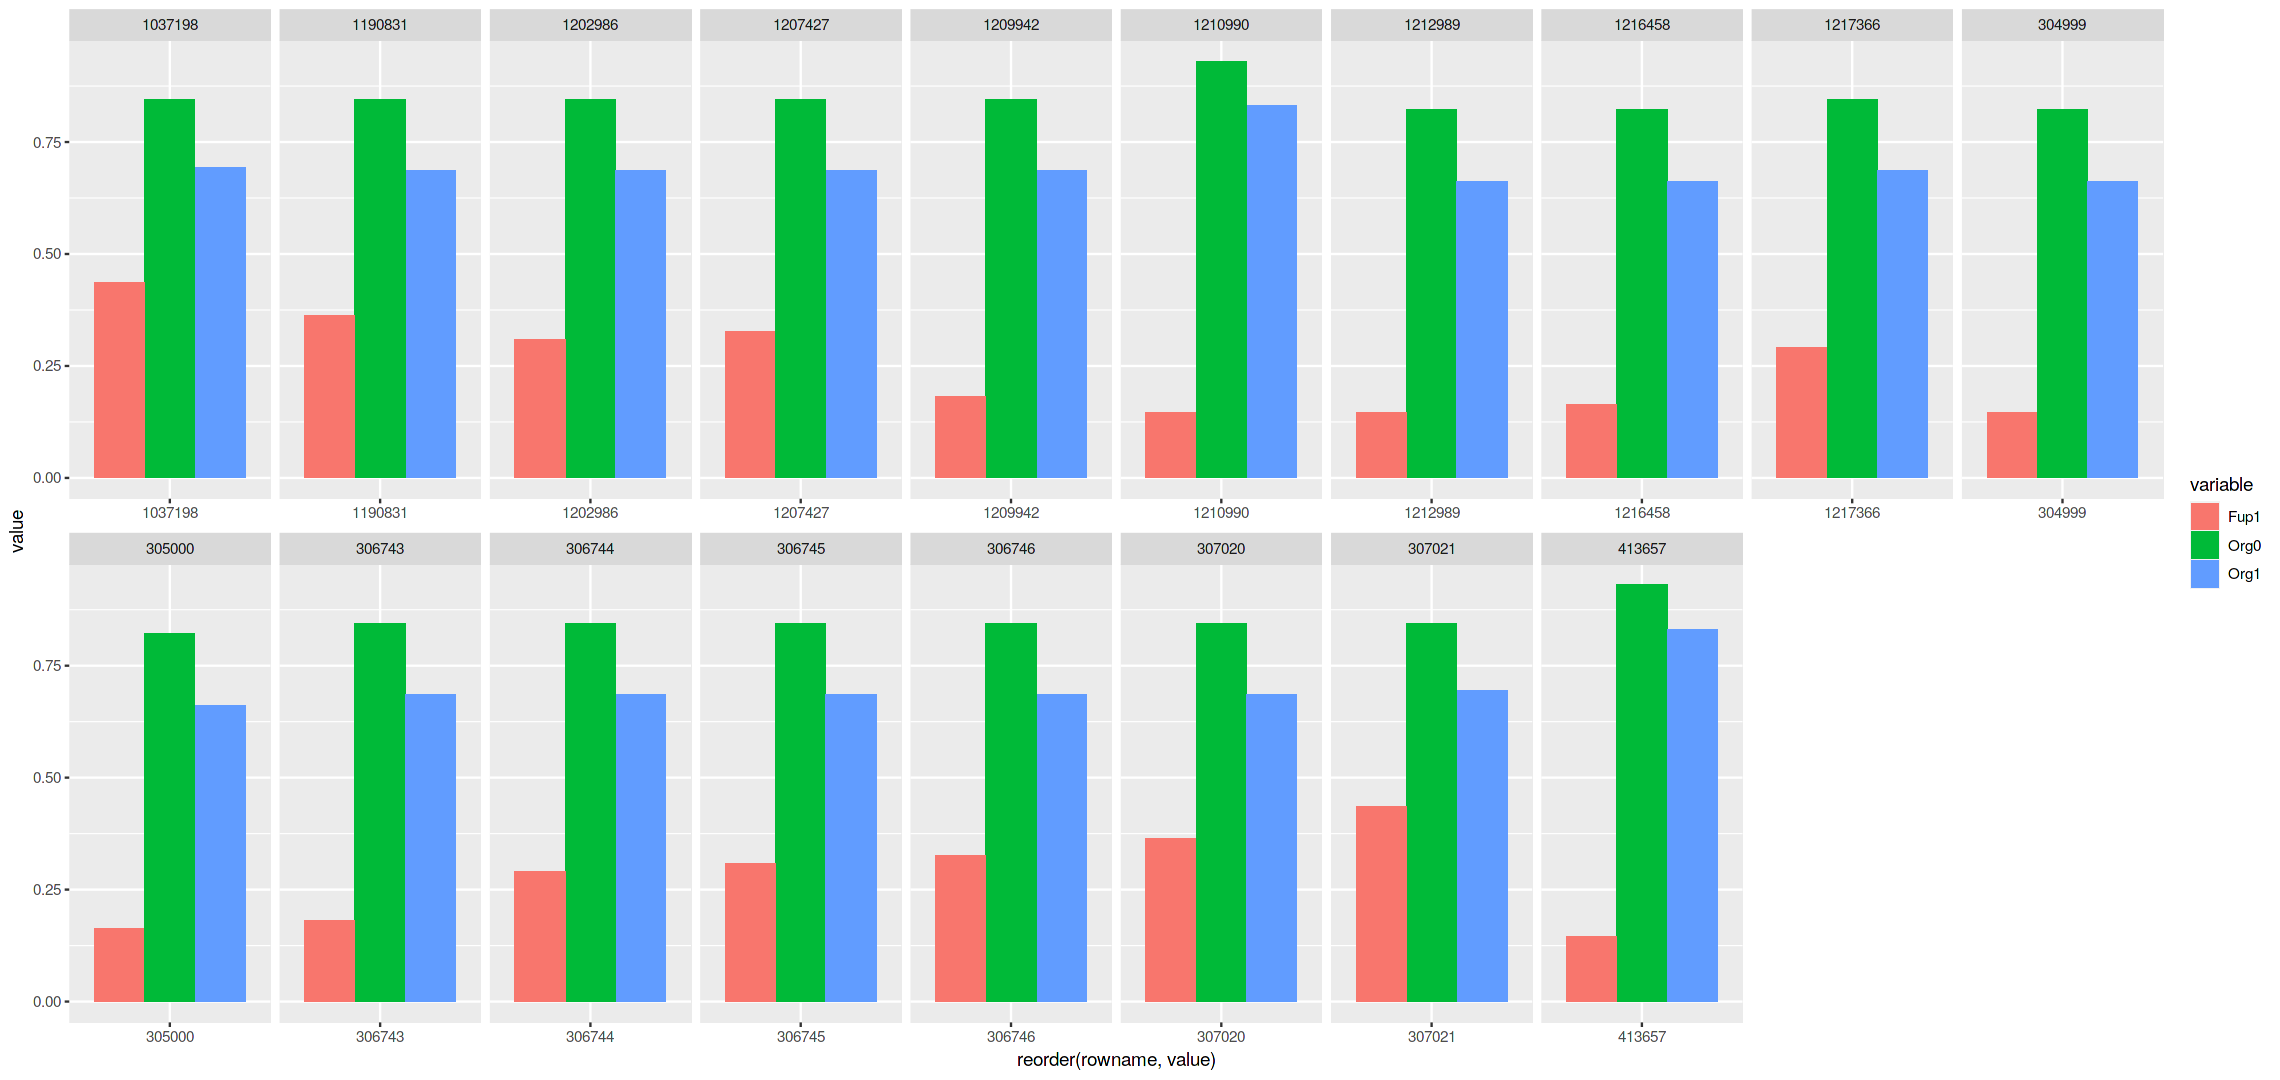

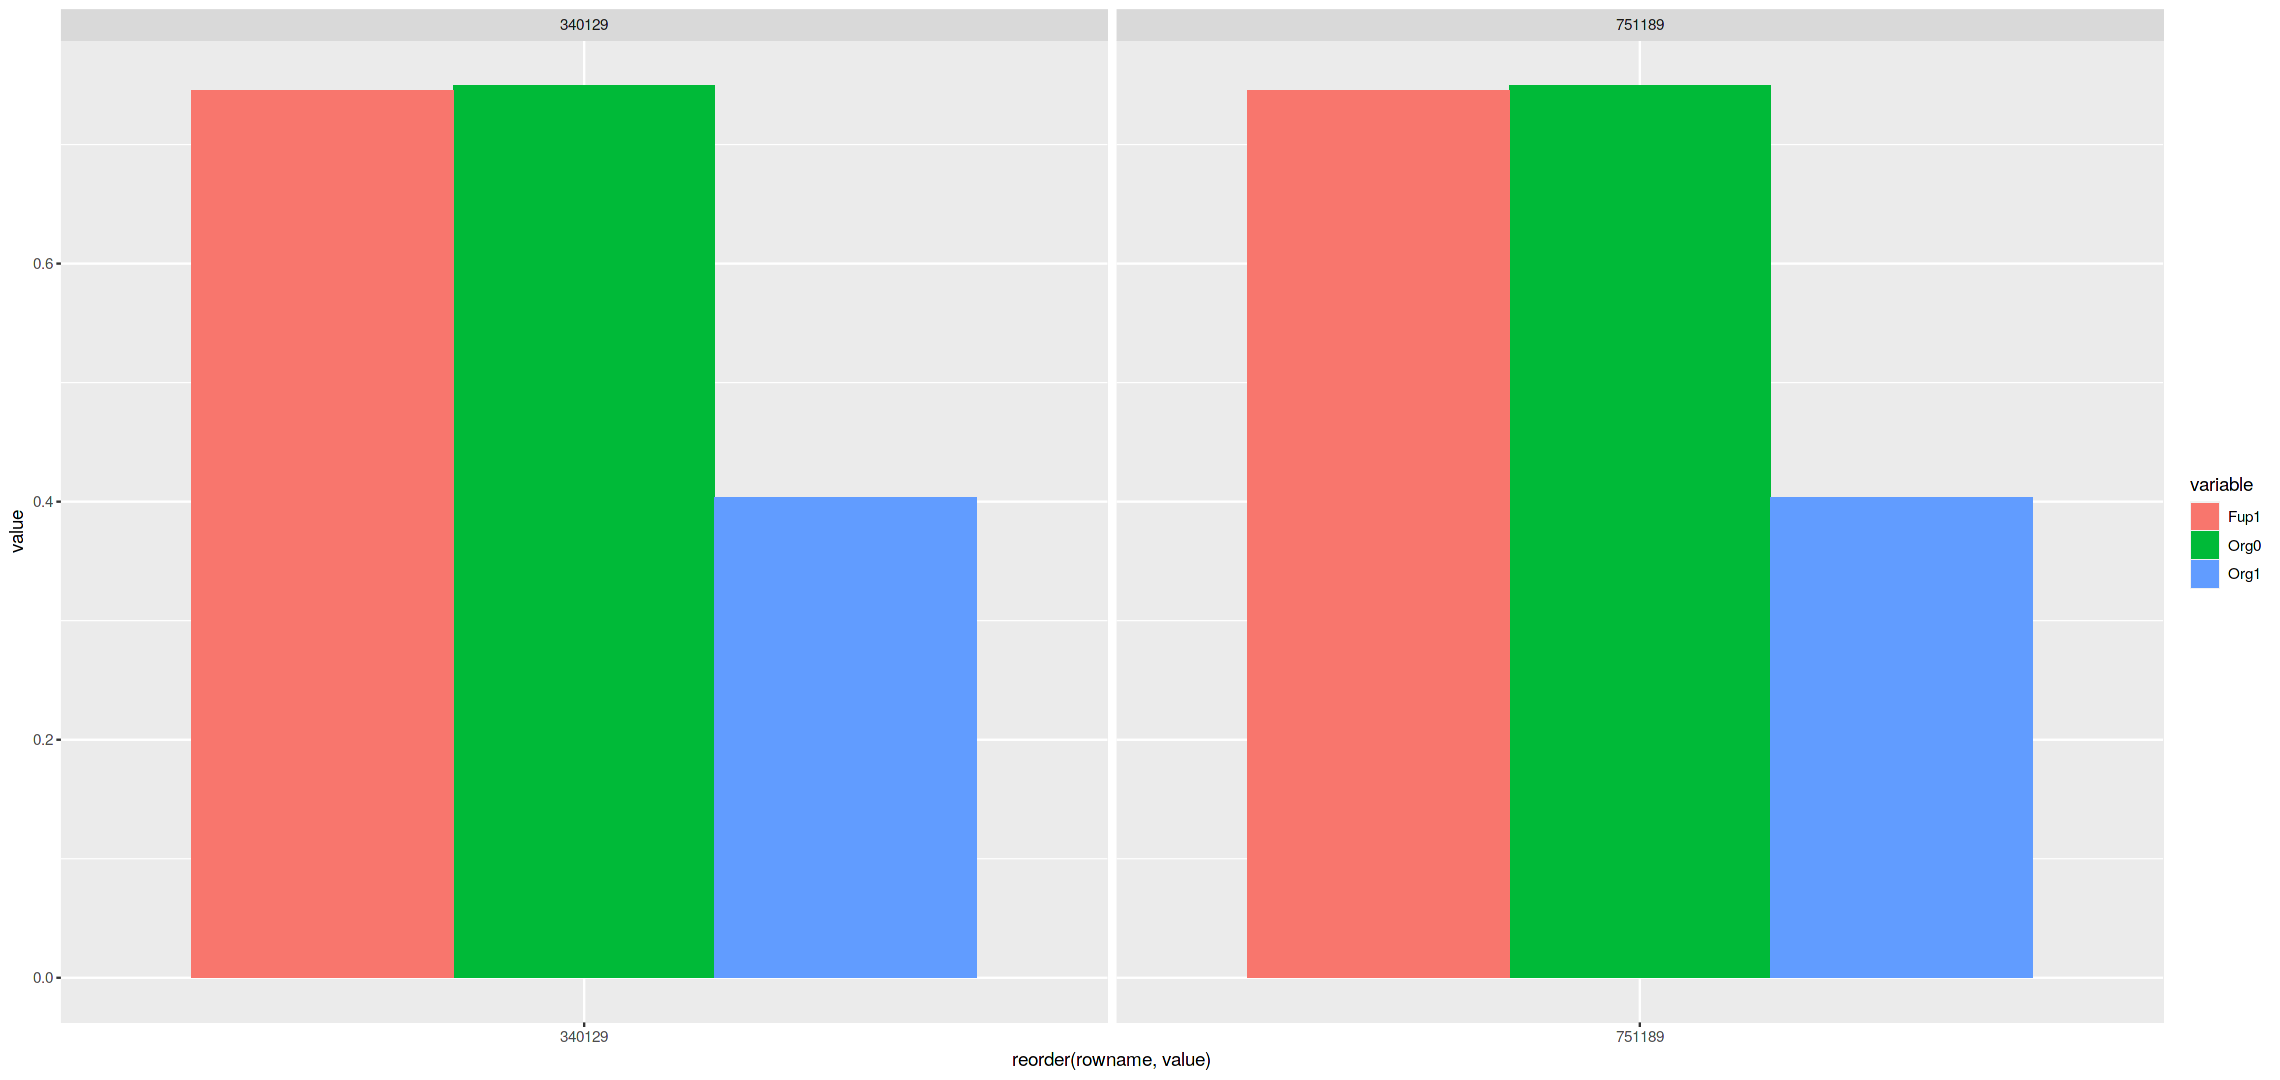

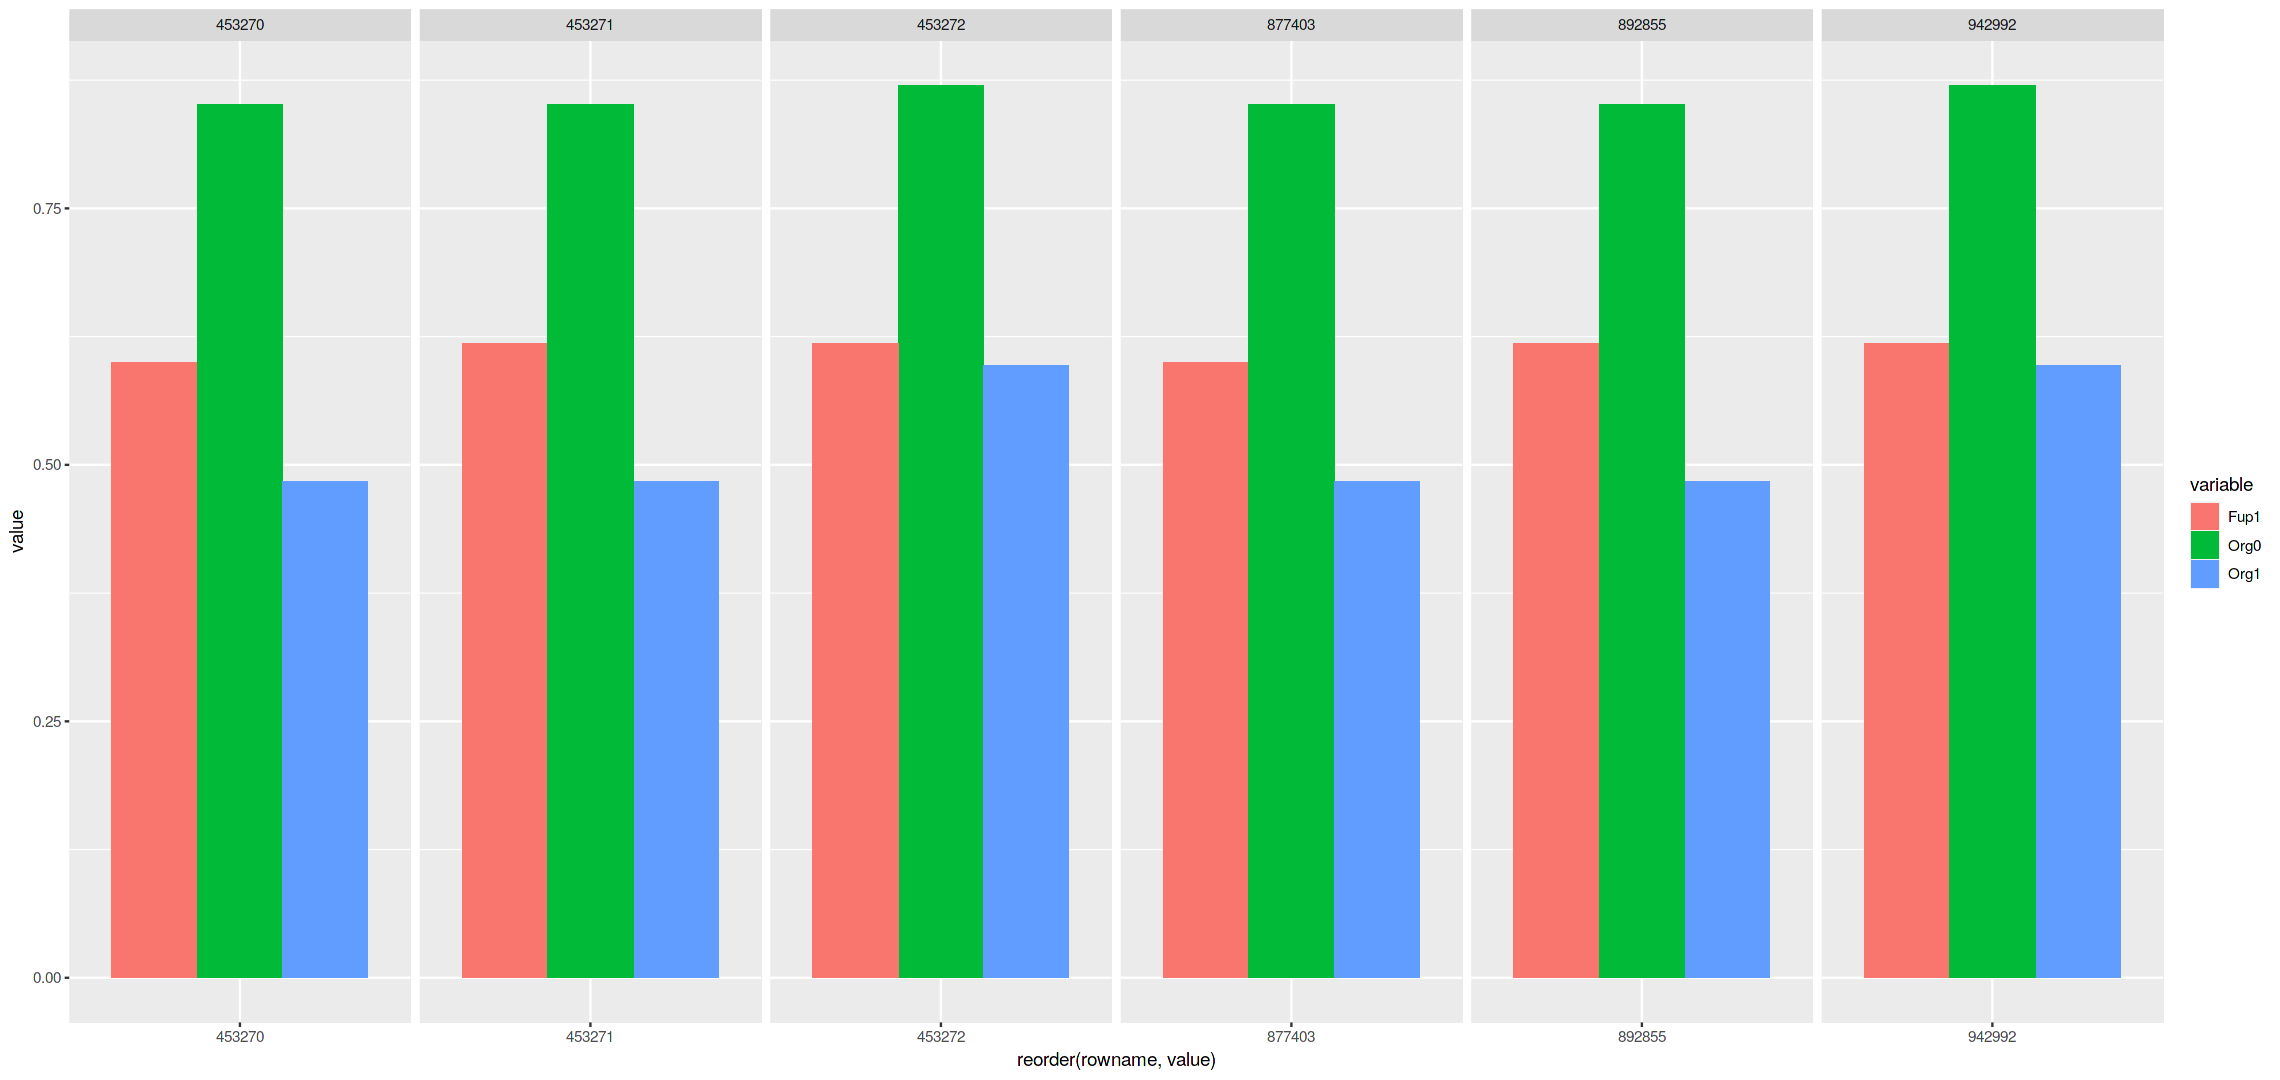

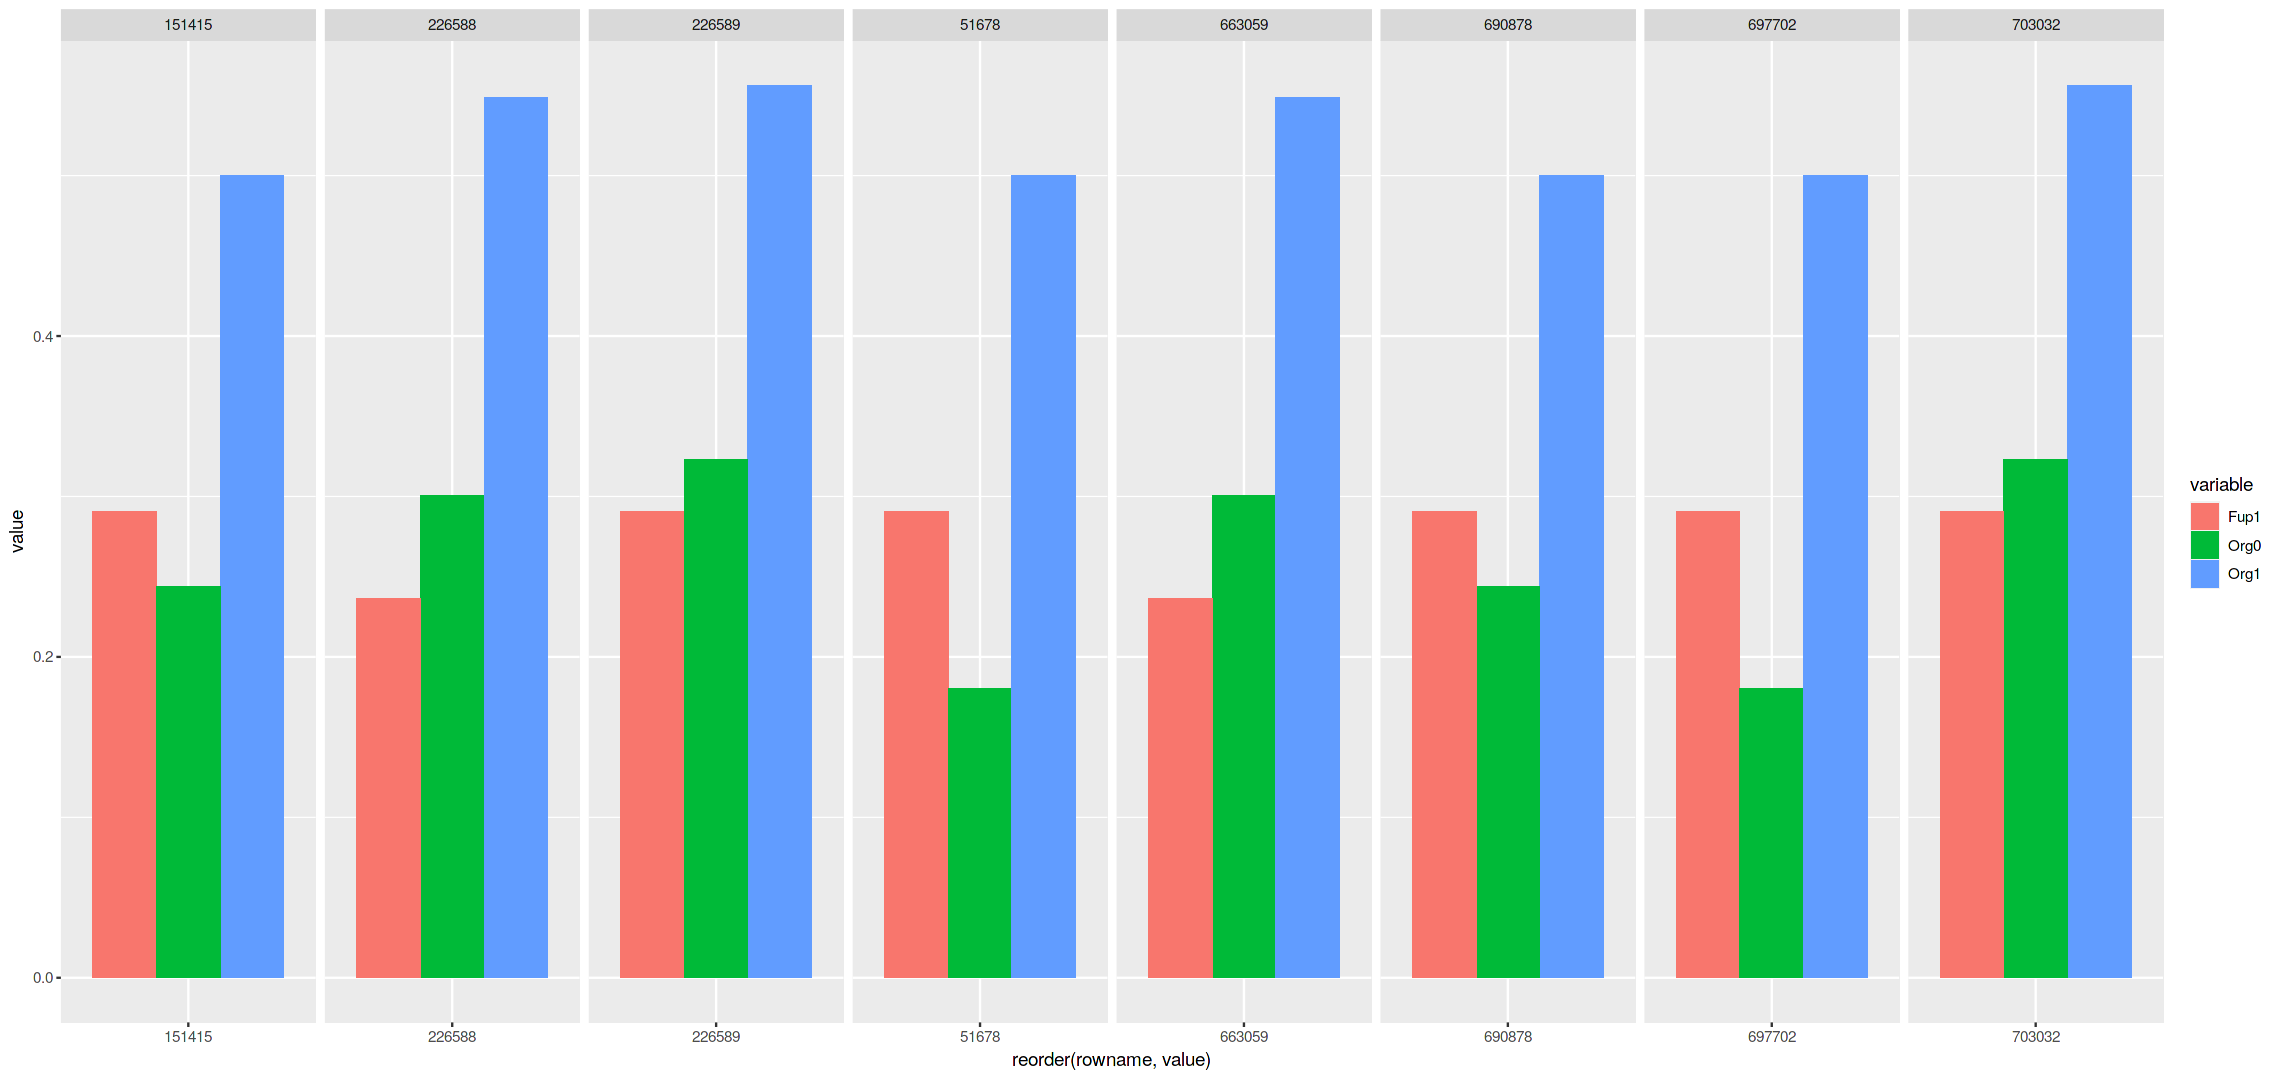

In [339]:
for (i in 1:14){
    
    print(mmtfrq_ucorr_kpa %>% filter(CorrelationGroup==i) %>% 
    ggplot()+
    aes(x=reorder(rowname,value),y=value,fill=variable)+
    geom_bar(stat='identity',position = 'dodge')+
    facet_wrap(~rowname,scales = 'free_x',ncol=10))
    
}


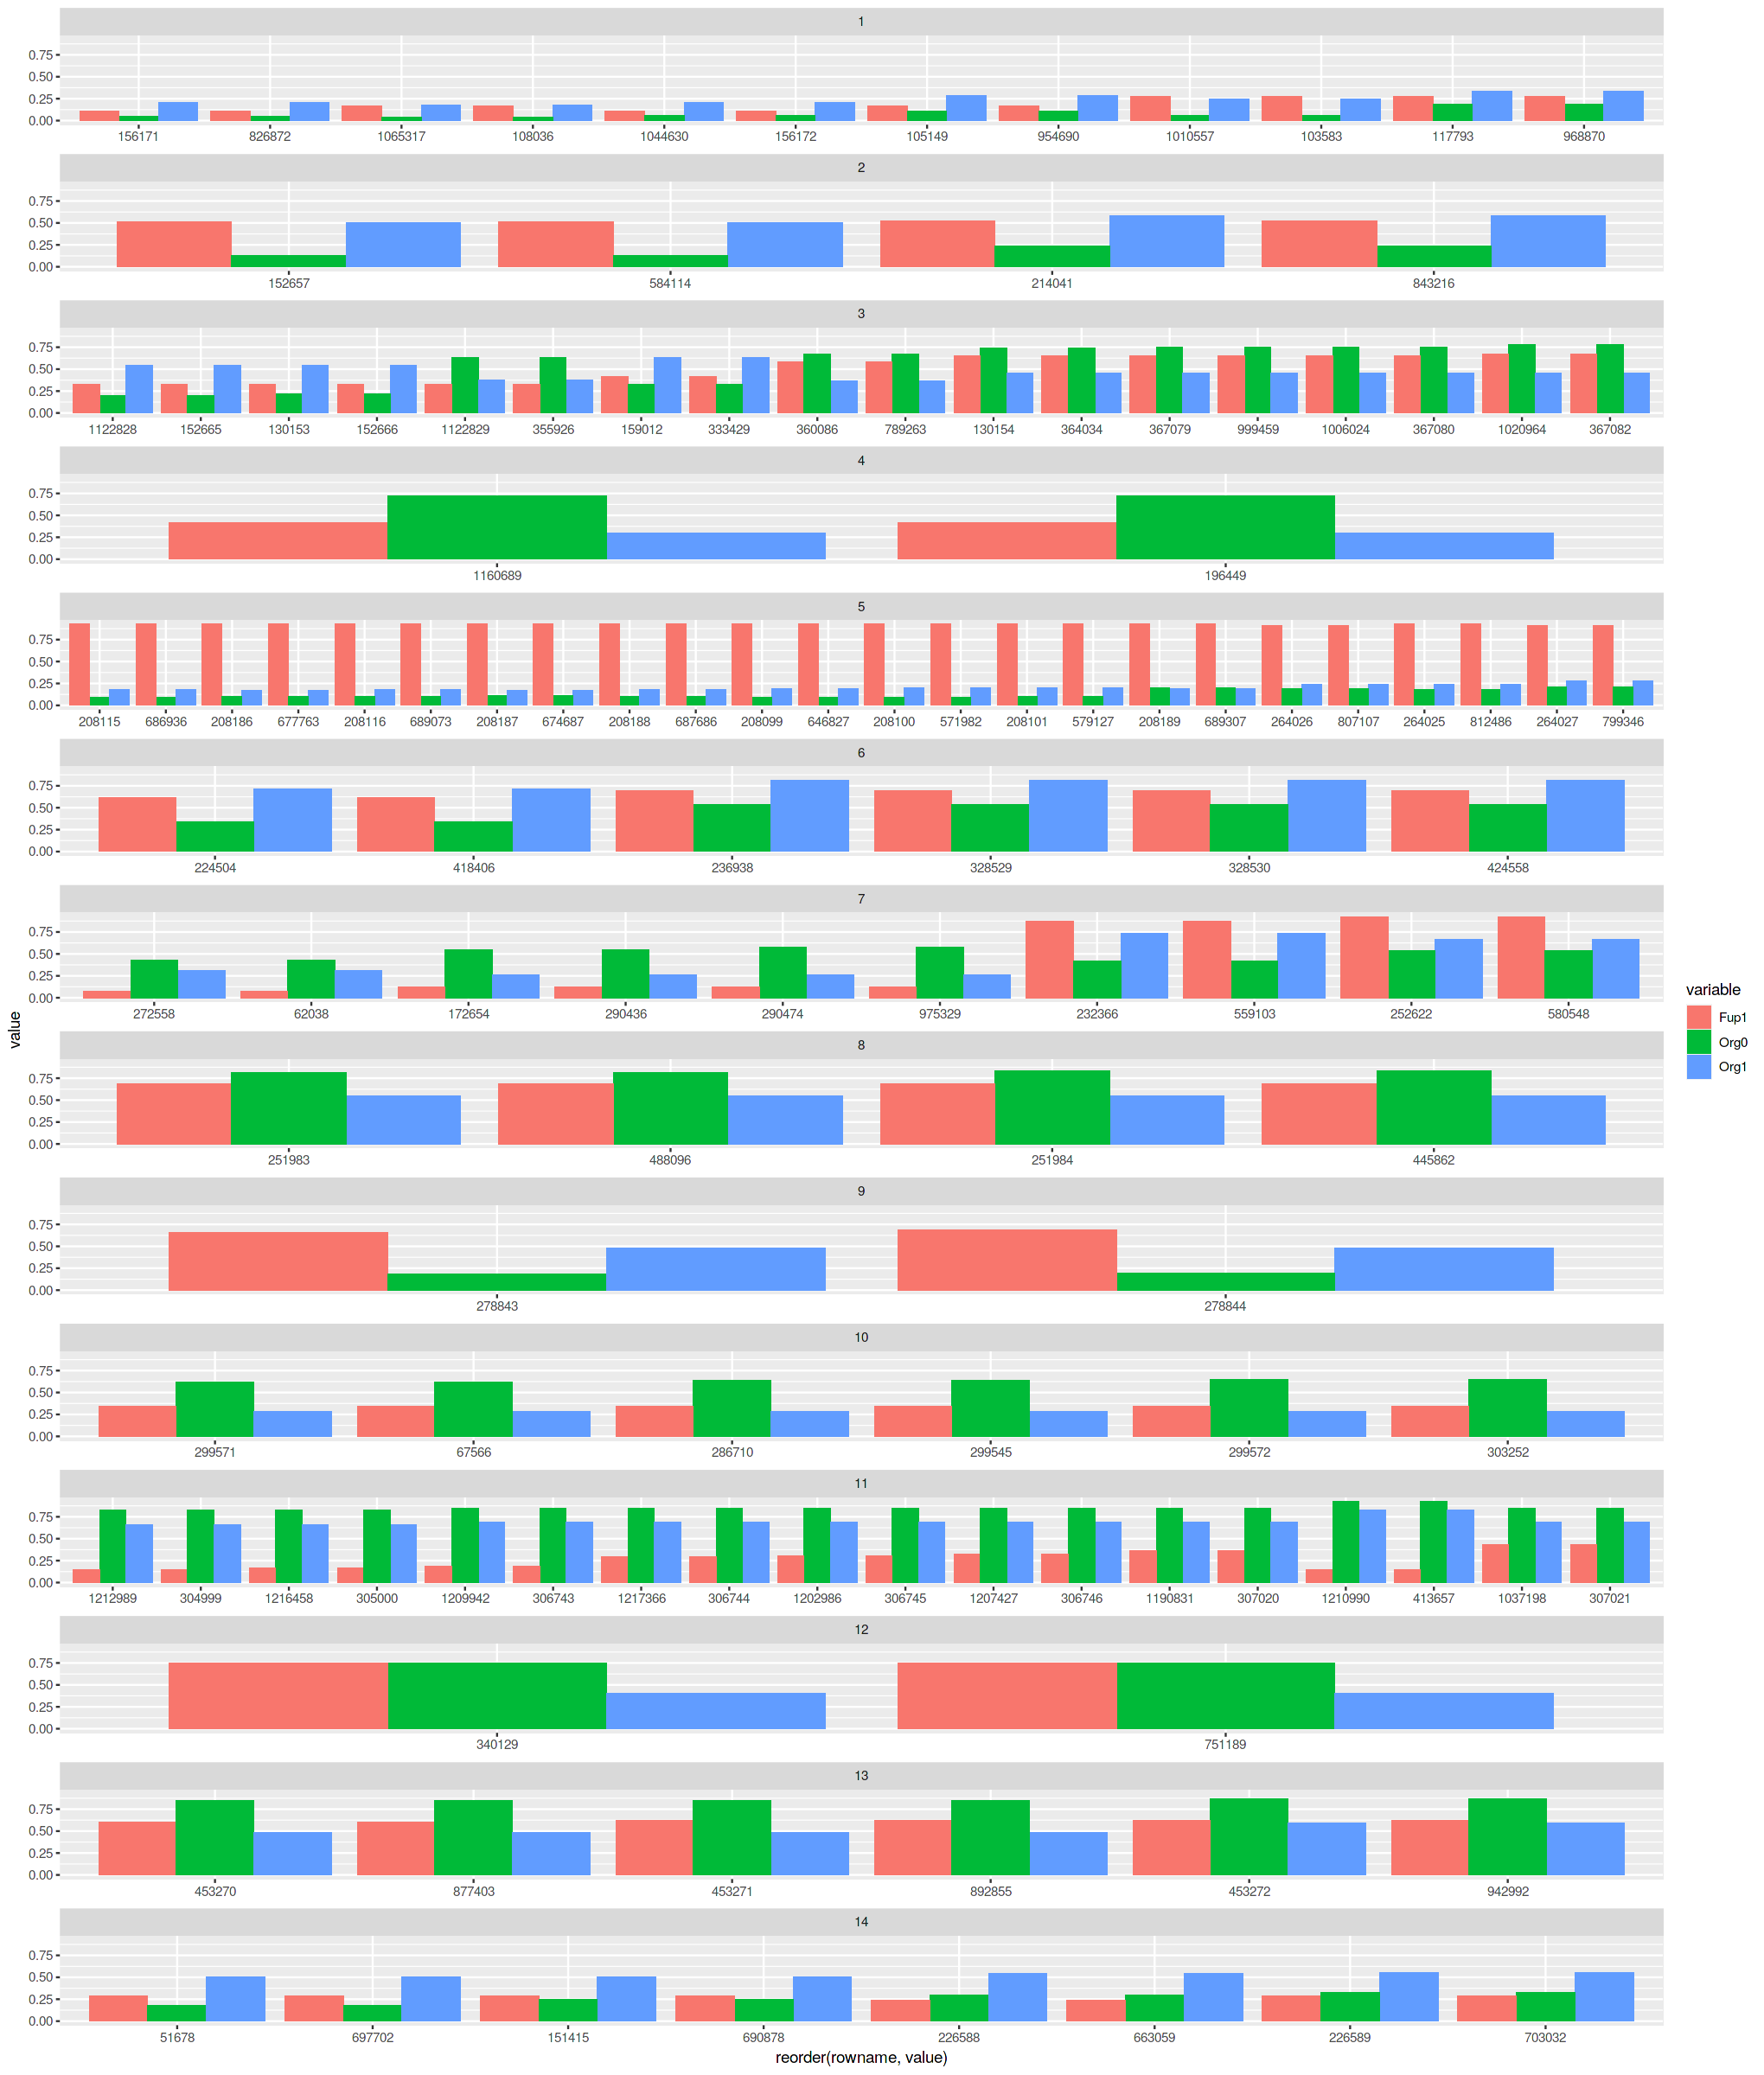

In [345]:
options(repr.plot.width=17, repr.plot.height=20)


mmtfrq_ucorr_kpa %>% 
    ggplot()+
    aes(x=reorder(rowname,value),y=value,fill=variable)+
    geom_bar(stat='identity',position = 'dodge')+
    facet_wrap(~CorrelationGroup,scales = 'free_x',nrow=14)

In [50]:
# gkmerpa
ngkmerpa

PA1013 PA1014 PA1015 PA1019 PA1020 PA1021 PA1022 PA1023 PA1024 PA1029 ⋯
100492  0      0      0      0      0      0      0      0      0      0      ⋯
281772  0      0      0      0      0      0      0      0      0      0      ⋯
101872  0      0      0      0      0      0      0      0      0      0      ⋯
894469  0      0      0      0      0      0      0      0      0      0      ⋯
102499  0      0      0      0      0      0      0      0      0      0      ⋯
990503  0      0      0      0      0      0      0      0      0      0      ⋯
102905  0      0      0      0      0      1      1      1      1      1      ⋯
888630  0      0      0      0      0      1      1      1      1      1      ⋯
103583  0      0      0      0      0      0      1      0      1      1      ⋯
1010557 0      0      0      0      0      0      1      0      1      1      ⋯
103982  0      0      0      0      0      0      0      0      0      0      ⋯
455045  0      0      0      0      0      0      0      0      0      0      ⋯
106416  0      0      0      0      0      0      0      0      0      0      ⋯
229765  0      0      0      0      0      0      0      0      0      0      ⋯
107166  0      0      0      0      0      0      0      0      0      0      ⋯
381968  0      0      0      0      0      0      0      0      0      0      ⋯
107264  0      0      0      0      0      0      0      0      0      0      ⋯
415796  0      0      0      0      0      0      0      0      0      0      ⋯
107278  0      0      0      0      0      0      0      0      0      0      ⋯
329705  0      0      0      0      0      0      0      0      0      0      ⋯
107290  0      0      0      0      0      0      0      0      0      0      ⋯
1038393 0      0      0      0      0      0      0      0      0      0      ⋯
107412  0      0      0      0      0      0      0      0      0      0      ⋯
41931   0      0      0      0      0      0      0      0      0      0      ⋯
107584  0      0      0      0      0      0      0      0      0      0      ⋯
946072  0      0      0      0      0      0      0      0      0      0      ⋯
108015  1      1      1      1      1      0      0      0      0      0      ⋯
1170644 1      1      1      1      1      0      0      0      0      0      ⋯
11092   0      0      0      0      0      0      0      0      0      0      ⋯
230739  0      0      0      0      0      0      0      0      0      0      ⋯
⋮       ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋱
647898  0      0      0      0      0      1      1      1      1      1      ⋯
7412    0      0      0      0      0      0      0      0      0      0      ⋯
399946  0      0      0      0      0      0      0      0      0      0      ⋯
7423    0      0      0      0      0      0      0      0      0      0      ⋯
428727  0      0      0      0      0      0      0      0      0      0      ⋯
7541    0      0      0      0      0      0      0      0      0      0      ⋯
1086405 0      0      0      0      0      0      0      0      0      0      ⋯
7636    0      0      0      0      0      0      0      0      0      0      ⋯
692099  0      0      0      0      0      0      0      0      0      0      ⋯
7643    0      0      0      0      0      0      0      0      0      0      ⋯
400901  0      0      0      0      0      0      0      0      0      0      ⋯
796938  0      0      0      0      0      0      0      0      0      0      ⋯
7711    0      0      0      0      0      0      0      0      0      0      ⋯
1212937 0      0      0      0      0      0      0      0      0      0      ⋯
7721    0      0      0      0      0      0      0      0      0      0      ⋯
1108291 0      0      0      0      0      0      0      0      0      0      ⋯
7725    0      0      0      0      0      0      0      0      0      0      ⋯
898075  0      0      0      0      0      0      0      0      0      0      ⋯
87886   

### MCA plots

#### PSC all features

In [13]:
kpa_gr <- data.frame(apply(t(gkmerpa),2,as.factor))
mcagk <- MCA(kpa_gr)

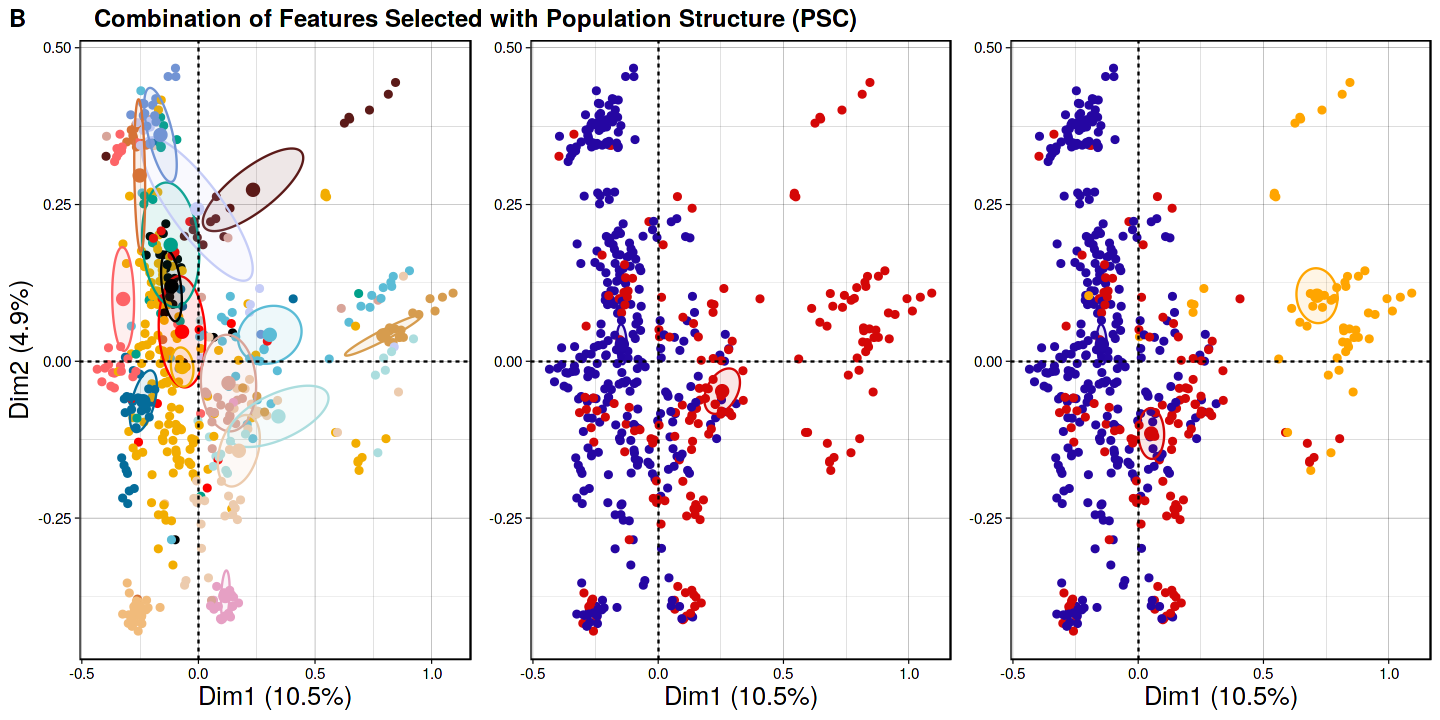

In [65]:
### Plots
grall_baps <- fviz_mca_ind(mcagk, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(baps_df$level.1), # color by groups 
             palette = c('#FF0000','#5B1A18','#F2AD00','#5BBCD6','#D8A499',
        '#ECCBAE','#046C9A','#D69C4E','#00A08A','#C6CDF7','#ABDDDE','#000000',
          '#F1BB7B','#FD6467','#D67236',
        '#E6A0C4','#7294D4','#F98400'
),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
grall_01 <- fviz_mca_ind(mcagk, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(aet_df$AET), # color by groups 
             palette = c("#2506A2","#D40707"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
grall_012 <- fviz_mca_ind(mcagk, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = factor(aetdiff_df$AETdiff), # color by groups 
             palette = c("#2506A2","#D40707","orange"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 

options(repr.plot.width=12, repr.plot.height=6)

mca_grall <- plot_grid(grall_baps+theme(axis.title.x = element_text(size=15),
                                         axis.title.y = element_text(size=15),
                                          legend.position='none')+labs(title =""),
          grall_01+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""),
          grall_012+theme(axis.title.x = element_text(size=15),
                           axis.title.y = element_blank(),
                          legend.position='none')+labs(title =""), nrow=1,
                       labels=c('B'),
                      label_y = 1)

allt <- 'Combination of Features Selected with Population Structure (PSC)'
a <- plot_grid(mca_grall,labels = allt,label_y = 1,label_x = -0.2)
a


#### PSC best performing features

In [15]:
# head(tf30kpa)
kpa_gr <- apply(data.frame(tf30kpa),2,as.factor)
# # head(kpa_gr)
mcak30 <- MCA(kpa_gr)


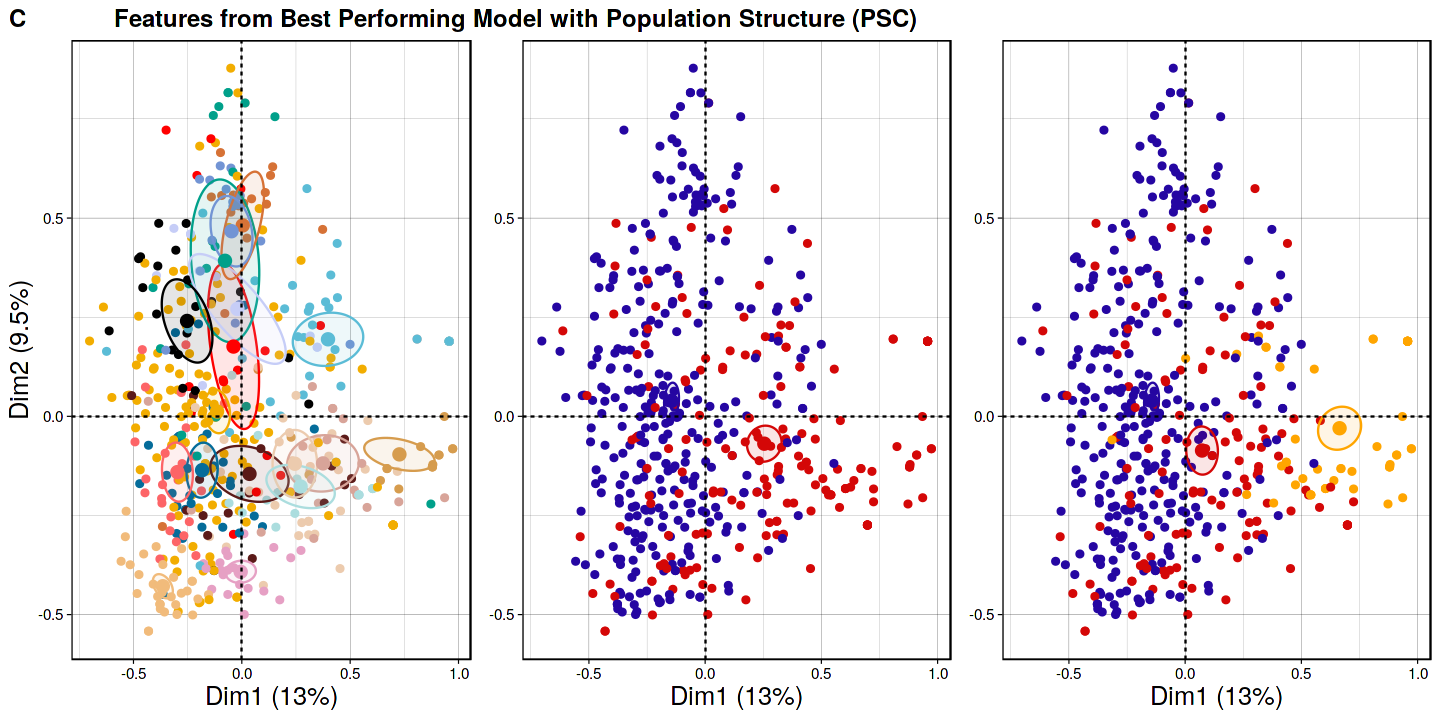

In [64]:
options(repr.plot.width=5, repr.plot.height=4)

gr30_baps <- fviz_mca_ind(mcak30, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(baps_df$level.1), # color by groups 
               palette = c('#FF0000','#5B1A18','#F2AD00','#5BBCD6','#D8A499',
        '#ECCBAE','#046C9A','#D69C4E','#00A08A','#C6CDF7','#ABDDDE','#000000',
          '#F1BB7B','#FD6467','#D67236',
        '#E6A0C4','#7294D4','#F98400'),
             addEllipses = TRUE,
            ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
gr30_01 <- fviz_mca_ind(mcak30, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(aet_df$AET), # color by groups 
             palette = c("#2506A2","#D40707"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
gr30_012 <-fviz_mca_ind(mcak30, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = factor(aetdiff_df$AETdiff), # color by groups 
             palette = c("#2506A2","#D40707",'orange'),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
options(repr.plot.width=12, repr.plot.height=6)

mca_gr30 <- plot_grid(gr30_baps+theme(axis.title.x = element_text(size=15),
                                         axis.title.y = element_text(size=15),
                                          legend.position='none')+labs(title =""),
          gr30_01+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""),
          gr30_012+theme(axis.title.x = element_text(size=15),
                           axis.title.y = element_blank(),
                          legend.position='none')+labs(title =""), nrow=1,labels=c('C'))
# mca_gr30


g30t <- 'Features from Best Performing Model with Population Structure (PSC)'
b <- plot_grid(mca_gr30,labels = g30t,label_y = 1,label_x = -0.2)
b



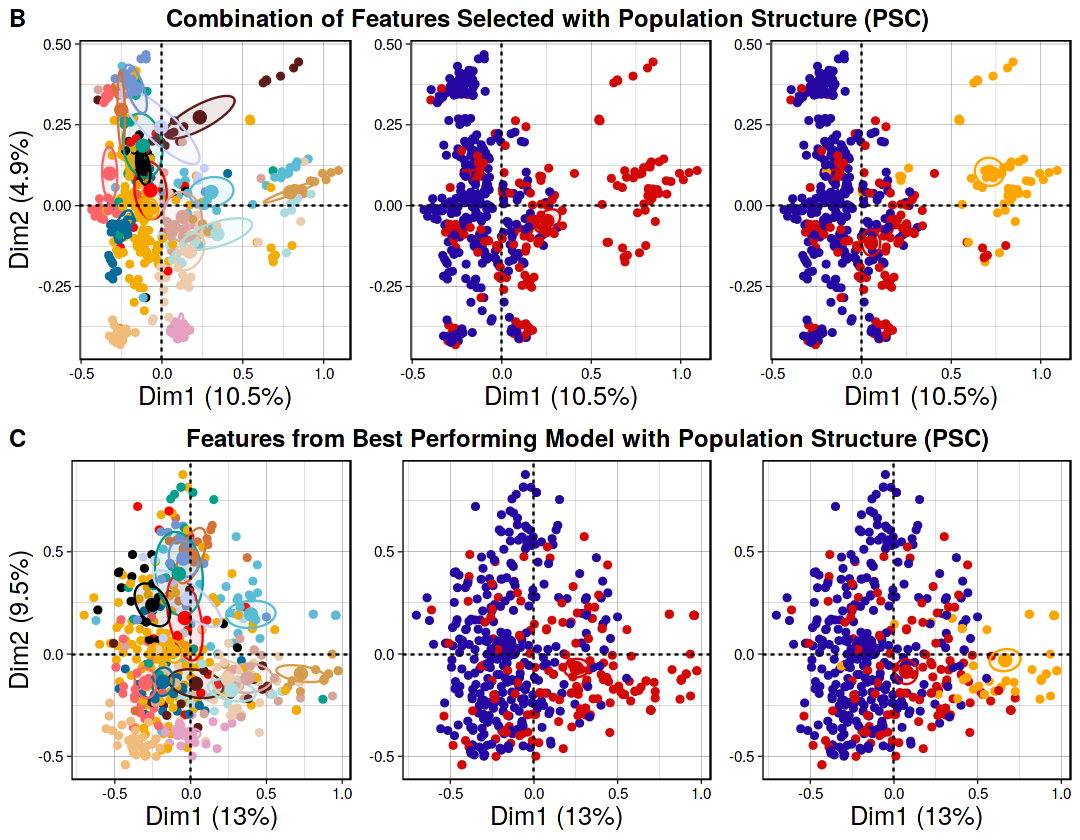

In [17]:
## Population structure models features 

options(repr.plot.width=9, repr.plot.height=7)

plot_grid(a,b,nrow=2)

#### No PSC all features

In [18]:
kpa_ugr <- data.frame(apply(t(ngkmerpa),2,as.factor))
mcaugk <- MCA(kpa_ugr)

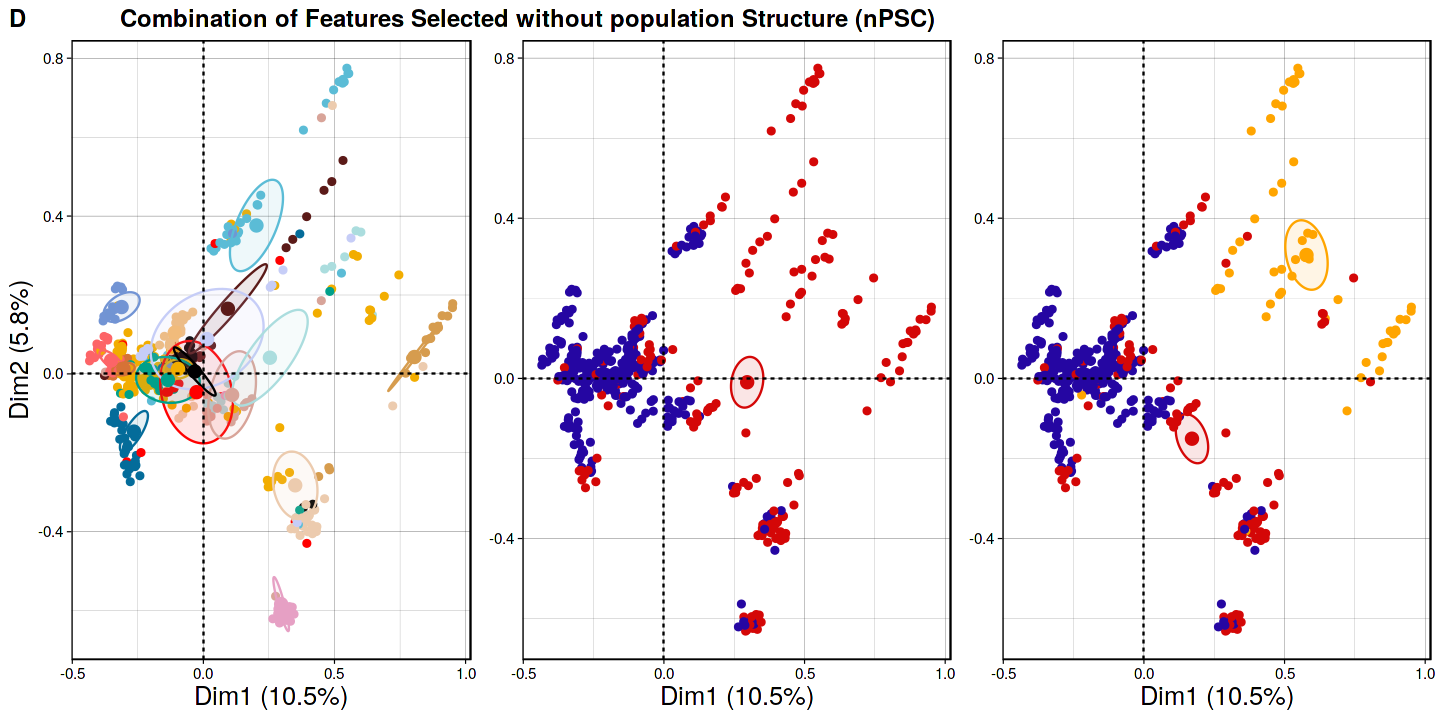

In [63]:
## Plots
ugrall_baps <- fviz_mca_ind(mcaugk, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(baps_df$level.1), # color by groups 
             palette = c('#FF0000','#5B1A18','#F2AD00','#5BBCD6','#D8A499',
        '#ECCBAE','#046C9A','#D69C4E','#00A08A','#C6CDF7','#ABDDDE','#000000',
          '#F1BB7B','#FD6467','#D67236',
        '#E6A0C4','#7294D4','#F98400'
),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
ugrall_01 <- fviz_mca_ind(mcaugk, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(aet_df$AET), # color by groups 
             palette = c("#2506A2","#D40707"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
ugrall_012 <- fviz_mca_ind(mcaugk, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = factor(aetdiff_df$AETdiff), # color by groups 
             palette = c("#2506A2","#D40707","orange"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 

options(repr.plot.width=12, repr.plot.height=6)

mca_ugrall <- plot_grid(ugrall_baps+theme(axis.title.x = element_text(size=15),
                                         axis.title.y = element_text(size=15),
                                          legend.position='none')+labs(title =""),
          ugrall_01+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""),
          ugrall_012+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""), nrow=1, labels=c('D'))

allt <- 'Combination of Features Selected without population Structure (nPSC)'
c <- plot_grid(mca_ugrall,labels = allt,label_y = 1,label_x = -0.2)
c


#### No PSC best performing features

In [21]:
kpa_ugr <- apply(data.frame(tf10kpa),2,as.factor)
# # head(kpa_gr)
mcak10 <- MCA(kpa_ugr)


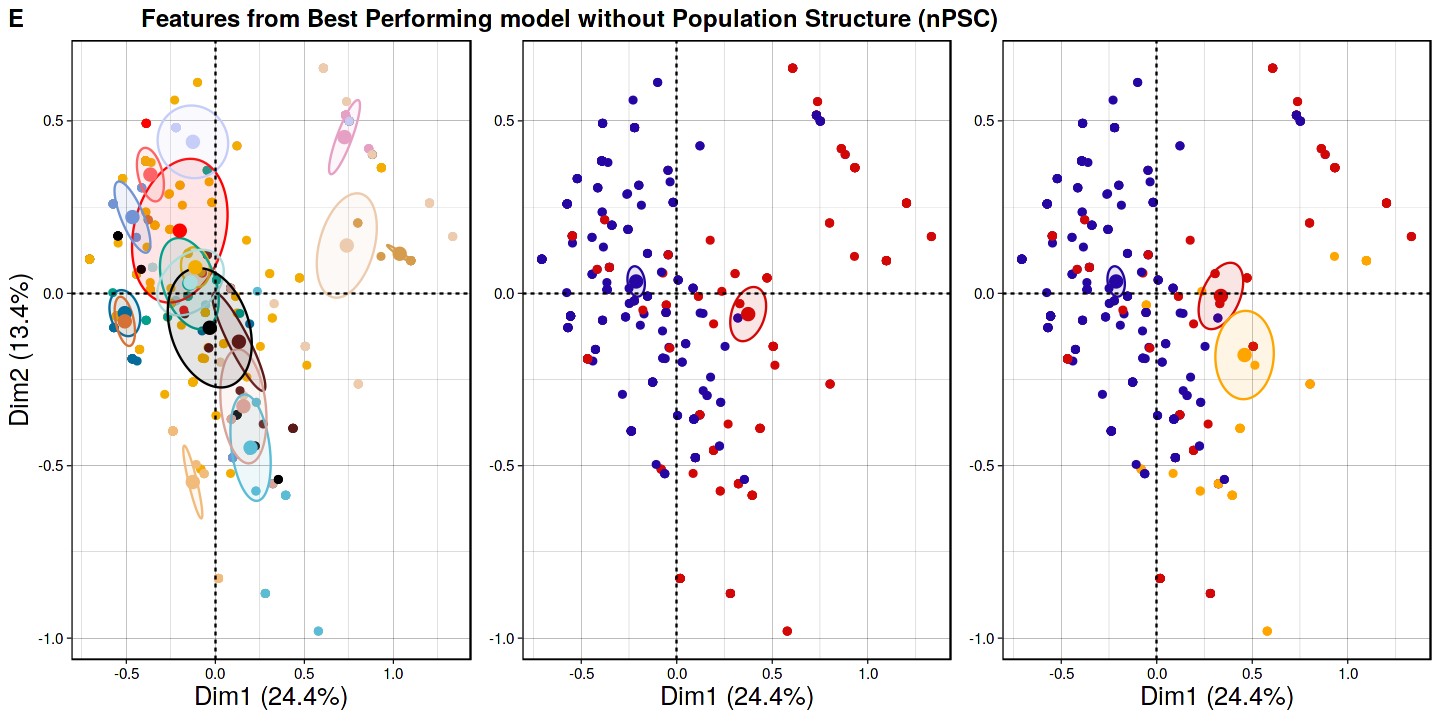

In [62]:
options(repr.plot.width=5, repr.plot.height=4)

gr10_baps <- fviz_mca_ind(mcak10, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(baps_df$level.1), # color by groups 
               palette = c('#FF0000','#5B1A18','#F2AD00','#5BBCD6','#D8A499',
        '#ECCBAE','#046C9A','#D69C4E','#00A08A','#C6CDF7','#ABDDDE','#000000',
          '#F1BB7B','#FD6467','#D67236',
        '#E6A0C4','#7294D4','#F98400'),
             addEllipses = TRUE,
            ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
gr10_01 <- fviz_mca_ind(mcak10, 
             axes=c(1,2),
             label = "none", # hide individual labels
                 habillage = factor(aet_df$AET), # color by groups 
             palette = c("#2506A2","#D40707"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
gr10_012 <-fviz_mca_ind(mcak10, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = factor(aetdiff_df$AETdiff), # color by groups 
             palette = c("#2506A2","#D40707",'orange'),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_linedraw()) 
options(repr.plot.width=12, repr.plot.height=6)

mca_ugr10 <- plot_grid(gr10_baps+theme(axis.title.x = element_text(size=15),
                                         axis.title.y = element_text(size=15),
                                          legend.position='none')+labs(title =""),
          gr10_01+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""),
          gr10_012+theme(axis.title.x = element_text(size=15),
                         axis.title.y = element_blank(),
                         legend.position='none')+labs(title =""), nrow=1,labels=c('E'))
# mca_ugr10
g10t <- 'Features from Best Performing model without Population Structure (nPSC)'
d <- plot_grid(mca_ugr10,labels = g10t,label_y = 1,label_x = -0.2)
d

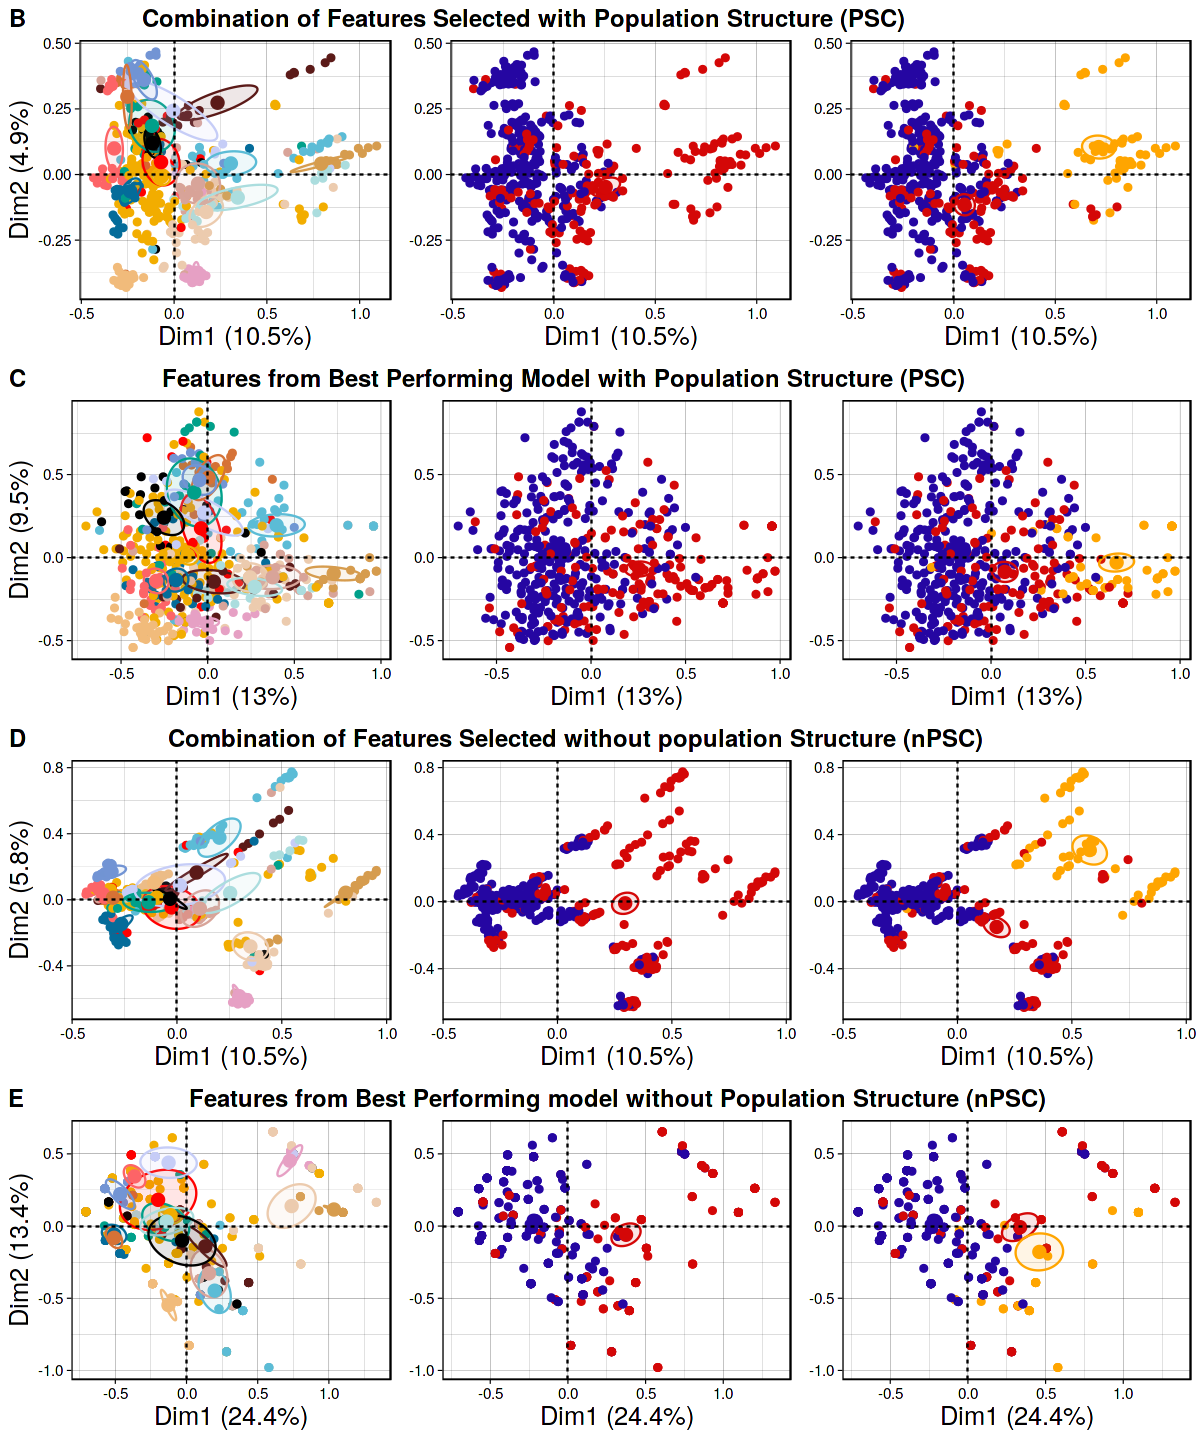

In [69]:
options(repr.plot.width=10, repr.plot.height=12)

F8b <- plot_grid(a,b,c,d,nrow=4)
F8b
ggsave('Fig8_bcde.png', device = 'png',dpi=400,width = 9,height = 12)

## Tree with Predictions

Warning message:
“Ignoring unknown parameters: hjust”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



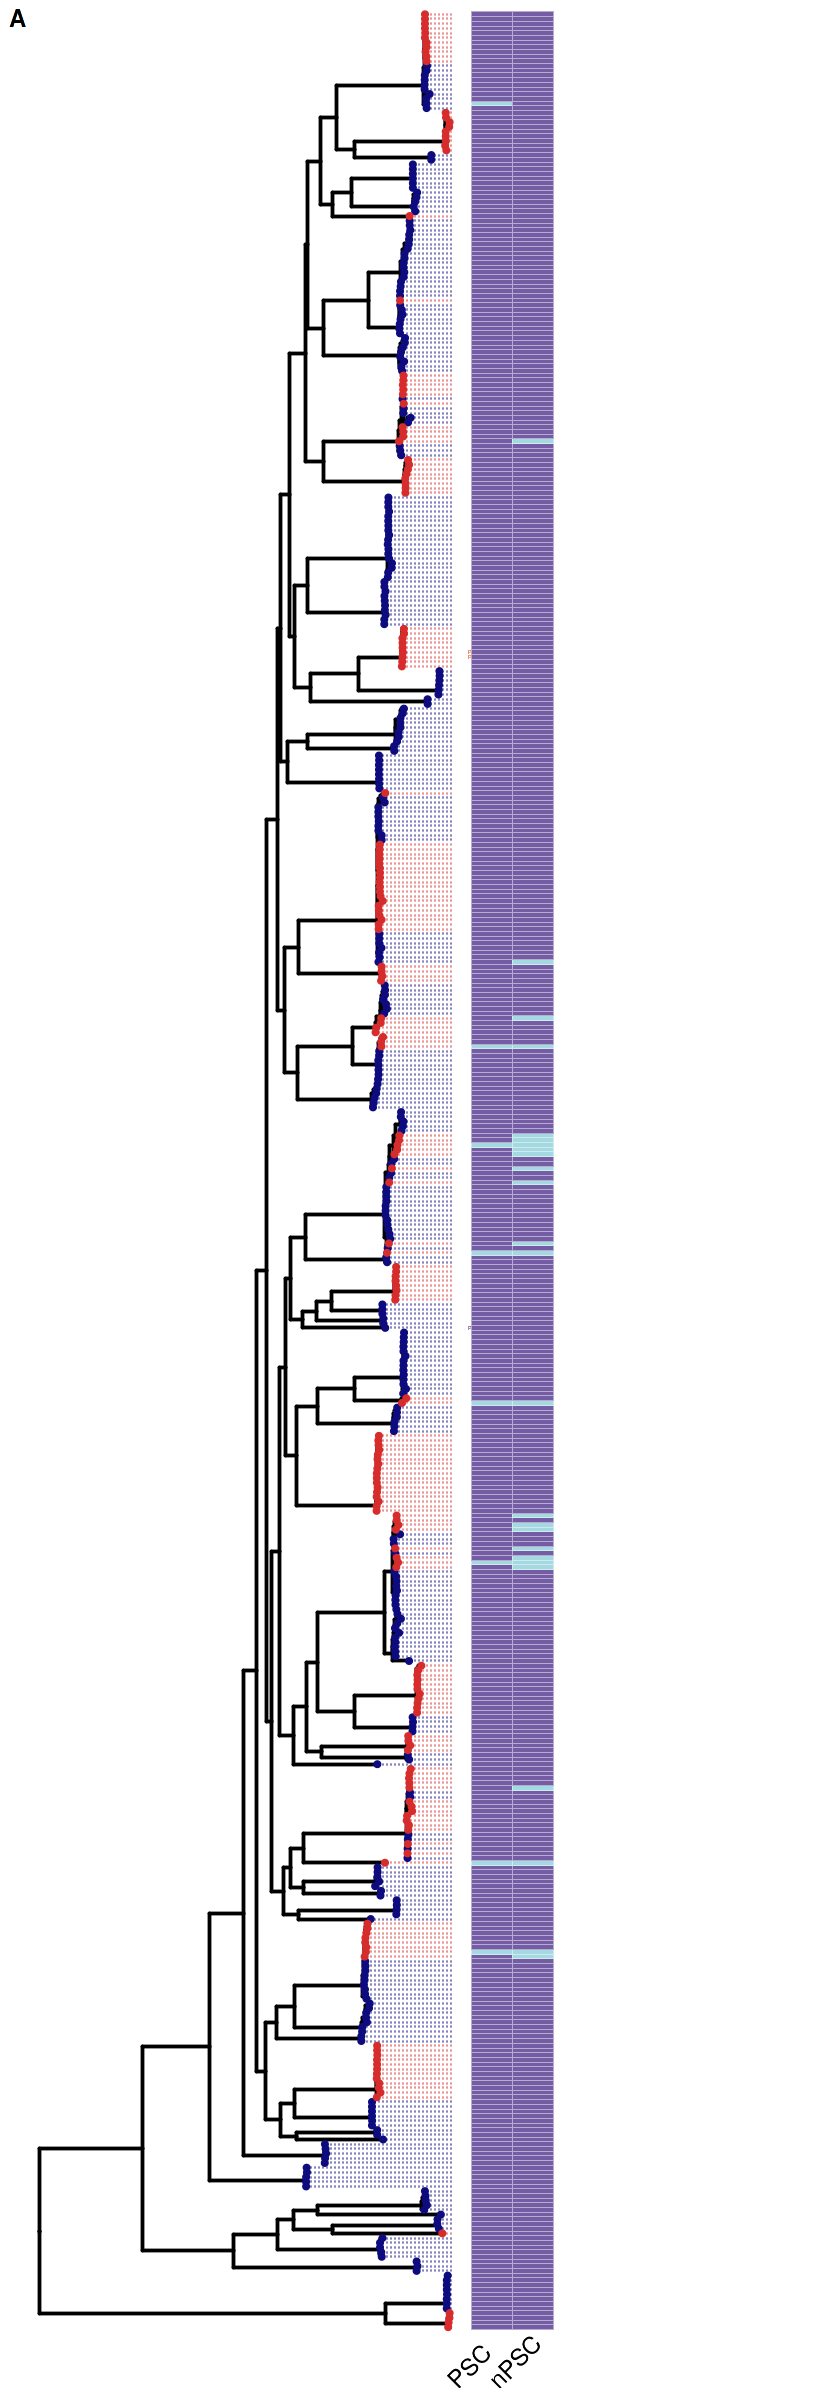

In [67]:
####Libraries

library(ggtree)
library(seqinr)
library(ape)
library(phytools)
library(tidytree)
library(treeio)
library(repr)
library(viridis)
library(RColorBrewer)
library(ggnewscale)
library(ggtreeExtra)

## Load metadata table
mdata <- read.csv("CompleteDatabase.csv")[,-1]

mdata <- mdata  %>% mutate(AETdiff=str_replace(AETdiff,'0','E')) %>% 
mutate(AETdiff=str_replace(AETdiff,'1','F')) %>% 
mutate(AETdiff=str_replace(AETdiff,'2','PF'))  

# load follow up tree
fup <- read.tree("RAxML_bestTree.follup")

library(ape)
fup <- drop.tip(fup,tip=c('573_3','1012'))

fupr <- midpoint.root(fup)


# Convert Tree with as_tibble
fupr.tb <- as_tibble(fupr)

fupr.tb <- fupr.tb  %>% mutate(label=gsub("^","PA", label))  


fupr.tb <-(fupr.tb)  %>%   mutate(label=gsub("PAPA","PA", label))

data_fupr.tr <- 
mdata  %>% 
# # full_join to our tree to ensure no data is lost although you could also carefully use a left_join
left_join(x=fupr.tb, y=., by=c("label" = "Isolate"))   %>% 

# # Convert to a tidytree format
as.treedata()


## Tree with AET outcome 

q <- ggtree(data_fupr.tr,size=0.8)# + layout_dendrogram()

q <- q + geom_tiplab(aes(color=factor(AET)), angle =0, size=1.05,align = TRUE, hjust=-1.5)
q <- q + geom_tippoint(aes(color=factor(AET)), size=1.2, hjust=1)

q <- q + scale_color_manual(values=c("#0E0B7F","#D72C2C","#FFA500"),name="AET",labels=c('E','F'),na.translate=FALSE)

## Load nPSC best performing model predictions

ugr_preds <- rbind(read.csv("/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/OuterGroupRFECV/RFE_CORR/nselect10/Fall2/TPredictions.csv"),
read.csv("/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/OuterGroupRFECV/RFE_CORR/nselect10/Fall2/tPredictions.csv"))
eq <- ugr_preds  %>% filter(AET==Predictions) %>% 
mutate(Correct="Yes")
dist <- ugr_preds  %>% filter(AET!=Predictions) %>% 
mutate(Correct="No")

ugr_error <- rbind(eq,dist)  %>% column_to_rownames("X") %>% 
select(Correct)

## Load PSC best performing model predictions
gr_preds <- rbind(read.csv("/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/OuterGroupRFECV/RFE_CORR/nselect30/Fall2.2/TPredictions.csv"),
read.csv("/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/OuterGroupRFECV/RFE_CORR/nselect30/Fall2.2/tPredictions.csv"))

eq <- gr_preds  %>% filter(AET==Predictions) %>% 
mutate(Correct="Yes")
dist <- gr_preds  %>% filter(AET!=Predictions) %>% 
mutate(Correct="No")

gr_error <- rbind(eq,dist)  %>% column_to_rownames("X") %>% 
select(Correct)

gr_pr <- gr_preds %>% column_to_rownames("X") %>% select(Predictions)
gr_pr$Predictions <- as.character(as.factor(gr_pr$Predictions))

## Samples location train or Val

train_val<- rbind(cbind(read.csv('/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/Train_and_Validation/dfyval.csv',header = FALSE),split='validation'),
      cbind(read.csv('/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/Train_and_Validation/dfy.csv',header = FALSE),split='training'))
train_val<-train_val  %>% column_to_rownames('V1')
train_val <-  train_val[,-1,drop=FALSE]
train_val <- train_val %>% mutate(split=str_replace(split,'validation','Validation')) %>% 
 mutate(split=str_replace(split,'training','Train'))

preds <- merge(gr_error,ugr_error,by='row.names') %>% 
column_to_rownames('Row.names')
colnames(preds) <- c('PSC','nPSC')

## TREE with Predictions

options(repr.plot.width=7, repr.plot.height=20)


q1 <- q + new_scale_fill() 

q3 <- q1+ new_scale_fill() 

q4 <- gheatmap(q3,preds,width=0.2, colnames=TRUE,
               colnames_angle=45,
               color = "white",
               font.size=5,,offset=0.0001,
               hjust=0,colnames_offset_x = -0.004,
               colnames_offset_y = -11)+
scale_fill_manual(values=c("#A4D9E1","#755DA5"),name="Correctly\nPredicted")+
theme(legend.direction = "horizontal",
      legend.key.size = unit(1, 'cm'),
                          legend.title = element_text(size=16), #change legend title font size
                        legend.text = element_text(size=14),
     legend.position=c(0.3,0.9))
l1<- get_legend(q4)
q5 <- q4 + new_scale_fill() 

q7 <- q5+theme(legend.position = 'none')



plot_grid(q7,NULL,labels = c('A',''), rel_widths = c(0.7,0.3))
ggsave('Figure8_a.png', device = 'png',dpi=400,width = 5,height = 15)

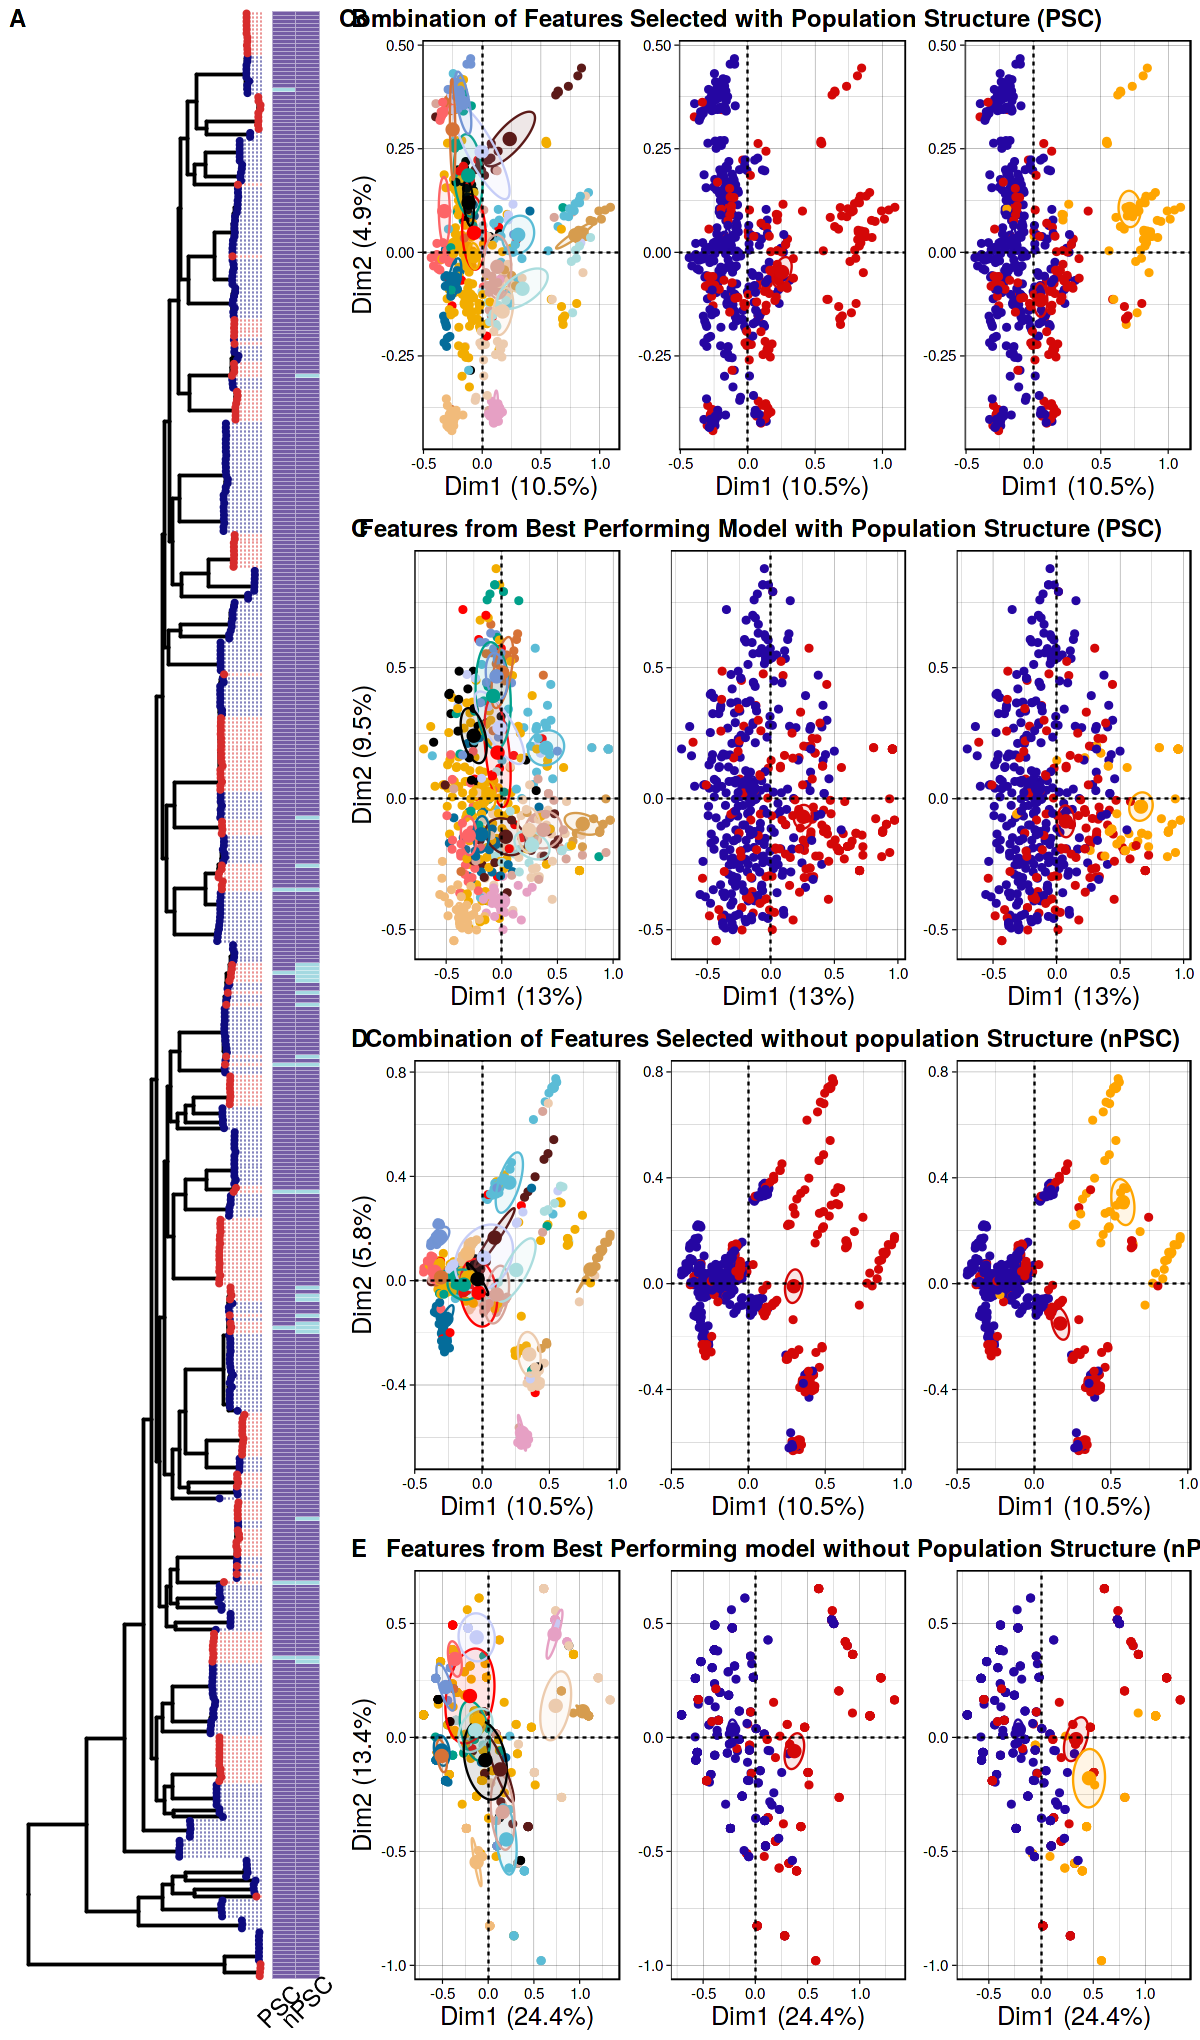

In [61]:
options(repr.plot.width=10, repr.plot.height=17)

plot_grid(q7,F8b,labels = c('A',''), rel_widths = c(2,5))